___
___
___
___
# Credit EDA Case Study
___
___
___
___
**Submitted by:** Kamal Thampi on <u>Jan 16, 2024<u>

## Problem Statement - I
___

### Introduction

This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

### Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

- **The client with payment difficulties:** he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

- **All other cases:** All other cases when the payment is paid on time.

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

- **Approved:** The Company has approved loan Application

- **Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

- **Refused:** The company had rejected the loan (because the client does not meet their requirements etc.).

- **Unused offer:**  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

### Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.



### Data Understanding

1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a **client has payment difficulties.**

 

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data on whether the previous application had been **Approved, Cancelled, Refused or Unused offer.**

 

3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

## Problem Statement - II
___

### Results Expected by Learners

Present the overall approach of the analysis in a presentation. Mention the problem statement and the analysis approach briefly.

Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

**Hint:** Note that in EDA, since it is not necessary to replace the missing value, but if you have to replace the missing value, what should be the approach. Clearly mention the approach.

Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.

Identify if there is data imbalance in the data. Find the ratio of data imbalance.

**Hint:** How will you analyse the data in case of data imbalance? You can plot more than one type of plot to analyse the different aspects due to data imbalance. For example, you can choose your own scale for the graphs, i.e. one can plot in terms of percentage or absolute value. Do this analysis for the **‘Target variable’** in the dataset ( **clients with payment difficulties** and **all other cases**). Use a mix of univariate and bivariate analysis etc.

 

**Hint:** Since there are a lot of columns, you can run your analysis in loops for the appropriate columns and find the insights.

Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

Find the top 10 correlation for the **Client with payment difficulties** and **all other cases** (Target variable). Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.  Say, there are 5+1(target) variables in a dataset: **Var1, Var2, Var3, Var4, Var5, Target**. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing.  

Include visualisations and summarise the most important results in the presentation. You are free to choose the graphs which explain the numerical/categorical variables. Insights should explain why the variable is important for differentiating the **clients with payment difficulties with all other cases.** 

 

You need to submit one/two Ipython notebook which clearly explains the thought process behind your analysis (either in comments of markdown text), code and relevant plots. The presentation file needs to be in PDF format and should contain the points discussed above with the necessary visualisations. Also, all the visualisations and plots must be done in Python(should be present in the Ipython notebook), though they may be recreated in Tableau for better aesthetics in the PPT file.

# 1. Initialization
___
___
___

## 1.1. Load Libraries

In [226]:
import pandas as pd                 # Pandas Library
import numpy as np                  # NumPy Library
import matplotlib.pyplot as plt     # Matplot Library        
import seaborn as sns               # Seaborn Library

from matplotlib.ticker import FuncFormatter #Function to format numeric ticklabels

## 1.2. Load Data

In [227]:
# Application Data
application_data = pd.read_csv('Dataset/application_data.csv')

In [228]:
# Previous Application Data
previous_application = pd.read_csv('Dataset/previous_application.csv')

# 2. Data Introspection
___
___
___

## 2.1. Application Data

In [229]:
# Display the top 5 rows to check
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [230]:
# Get the shape of the datset
application_data.shape

(307511, 122)

In [231]:
# Get the datatype
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

float64    53.278689
int64      33.606557
object     13.114754
Name: proportion, dtype: float64


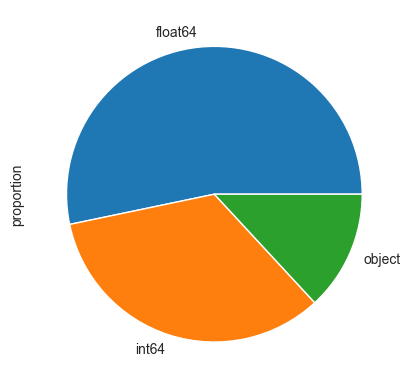

In [232]:
print(application_data.dtypes.value_counts(normalize=True) * 100)
application_data.dtypes.value_counts(normalize=True).plot(kind='pie')
plt.show()

In [233]:
# Identify columns with missing values only
application_data.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
                             ...  
EXT_SOURCE_2                   660
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
Length: 67, dtype: int64

In [234]:
# Identify columns with missing values (percentage wise)
application_data.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False) / application_data.shape[0] * 100

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
                              ...    
EXT_SOURCE_2                 0.214626
AMT_GOODS_PRICE              0.090403
AMT_ANNUITY                  0.003902
CNT_FAM_MEMBERS              0.000650
DAYS_LAST_PHONE_CHANGE       0.000325
Length: 67, dtype: float64

In [235]:
# Get count of columns with missing values
application_data.isnull().sum().loc[lambda x: x > 0].shape

(67,)

In [236]:
# Get the Descriptive values of integer/float columns
round(application_data.describe(), 2)

SK_ID_CURR     TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count   307511.00  307511.00     307511.00      3.075110e+05   307511.00   
mean    278180.52       0.08          0.42      1.687979e+05   599026.00   
std     102790.18       0.27          0.72      2.371231e+05   402490.78   
min     100002.00       0.00          0.00      2.565000e+04    45000.00   
25%     189145.50       0.00          0.00      1.125000e+05   270000.00   
50%     278202.00       0.00          0.00      1.471500e+05   513531.00   
75%     367142.50       0.00          1.00      2.025000e+05   808650.00   
max     456255.00       1.00         19.00      1.170000e+08  4050000.00   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count    307499.00        307233.00                   307511.00   307511.00   
mean      27108.57        538396.21                        0.02   -16037.00   
std       14493.74        369446.46                        0.01     4363.99   
min        1615.50         40500.00                        0.00   -25229.00   
25%       16524.00        238500.00                        0.01   -19682.00   
50%       24903.00        450000.00                        0.02   -15750.00   
75%       34596.00        679500.00                        0.03   -12413.00   
max      258025.50       4050000.00                        0.07    -7489.00   

       DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
count      307511.00  ...         307511.00         307511.00   
mean        63815.05  ...              0.01              0.00   
std        141275.77  ...              0.09              0.02   
min        -17912.00  ...              0.00              0.00   
25%         -2760.00  ...              0.00              0.00   
50%         -1213.00  ...              0.00              0.00   
75%          -289.00  ...              0.00              0.00   
max        365243.00  ...              1.00              1.00   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
count         307511.00         307511.00                   265992.00   
mean               0.00              0.00                        0.01   
std                0.02              0.02                        0.08   
min                0.00              0.00                        0.00   
25%                0.00              0.00                        0.00   
50%                0.00              0.00                        0.00   
75%                0.00              0.00                        0.00   
max                1.00              1.00                        4.00   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count                  265992.00                   265992.00   
mean                        0.01                        0.03   
std                         0.11                        0.20   
min                         0.00                        0.00   
25%                         0.00                        0.00   
50%                         0.00                        0.00   
75%                         0.00                        0.00   
max                         9.00                        8.00   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count                  265992.00                  265992.00   
mean                        0.27                       0.27   
std                         0.92                       0.79   
min                         0.00                       0.00   
25%                         0.00                       0.00   
50%                         0.00                       0.00   
75%                         0.00                       0.00   
max                        27.00                     261.00   

       AMT_REQ_CREDIT_BUREAU_YEAR  
count                   265992.00  
mean                         1.90  
std                          1.87  
min                          0.00  
25%                          0.00  
50%  

## 2.2. Previous Application Data

In [237]:
# Display the top 5 rows to check
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [238]:
# Get the shape of the datset
previous_application.shape

(1670214, 37)

In [239]:
# Get the datatype
previous_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

object     43.243243
float64    40.540541
int64      16.216216
Name: proportion, dtype: float64


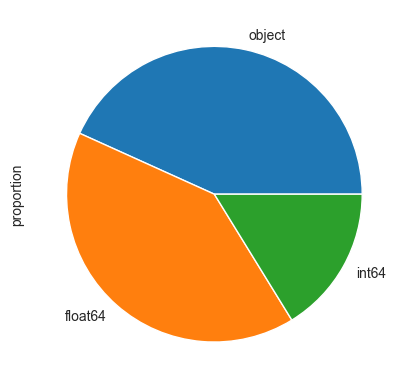

In [240]:
print(previous_application.dtypes.value_counts(normalize=True) * 100)
previous_application.dtypes.value_counts(normalize=True).plot(kind='pie')
plt.show()

In [241]:
# Identify columns with missing values only
previous_application.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False)

RATE_INTEREST_PRIMARY        1664263
RATE_INTEREST_PRIVILEGED     1664263
AMT_DOWN_PAYMENT              895844
RATE_DOWN_PAYMENT             895844
NAME_TYPE_SUITE               820405
DAYS_FIRST_DRAWING            673065
DAYS_FIRST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_LAST_DUE                 673065
DAYS_TERMINATION              673065
NFLAG_INSURED_ON_APPROVAL     673065
AMT_GOODS_PRICE               385515
AMT_ANNUITY                   372235
CNT_PAYMENT                   372230
PRODUCT_COMBINATION              346
AMT_CREDIT                         1
dtype: int64

In [242]:
# Identify columns with missing values (percentage wise)
previous_application.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False) / previous_application.shape[0] * 100

RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
dtype: float64

In [243]:
# Get count of columns with missing values
previous_application.isnull().sum().loc[lambda x: x > 0].shape

(16,)

In [244]:
# Get the Descriptive values of numeric columns
round(previous_application.describe(), 2) #Rounding off to the 2nd digit to display the values properly

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
count  1670214.00  1670214.00   1297979.00       1670214.00  1670213.00   
mean   1923089.14   278357.17     15955.12        175233.86   196114.02   
std     532597.96   102814.82     14782.14        292779.76   318574.62   
min    1000001.00   100001.00         0.00             0.00        0.00   
25%    1461857.25   189329.00      6321.78         18720.00    24160.50   
50%    1923110.50   278714.50     11250.00         71046.00    80541.00   
75%    2384279.75   367514.00     20658.42        180360.00   216418.50   
max    2845382.00   456255.00    418058.14       6905160.00  6905160.00   

       AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count          774370.0       1284699.00               1670214.00   
mean             6697.4        227847.28                    12.48   
std             20921.5        315396.56                     3.33   
min                -0.9             0.00                     0.00   
25%                 0.0         50841.00                    10.00   
50%              1638.0        112320.00                    12.00   
75%              7740.0        234000.00                    15.00   
max           3060045.0       6905160.00                    23.00   

       NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  ...  \
count              1670214.00          774370.00  ...   
mean                     1.00               0.08  ...   
std                      0.06               0.11  ...   
min                      0.00              -0.00  ...   
25%                      1.00               0.00  ...   
50%                      1.00               0.05  ...   
75%                      1.00               0.11  ...   
max                      1.00               1.00  ...   

       RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  \
count                   5951.00     1670214.00        1670214.00   1297984.00   
mean                       0.77        -880.68            313.95        16.05   
std                        0.10         779.10           7127.44        14.57   
min                        0.37       -2922.00             -1.00         0.00   
25%                        0.72       -1300.00             -1.00         6.00   
50%                        0.84        -581.00              3.00        12.00   
75%                        0.85        -280.00             82.00        24.00   
max                        1.00          -1.00        4000000.00        84.00   

       DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count           997149.00       997149.00                  997149.00   
mean            342209.86        13826.27                   33767.77   
std              88916.12        72444.87                  106857.03   
min              -2922.00        -2892.00                   -2801.00   
25%             365243.00        -1628.00                   -1242.00   
50%             365243.00         -831.00                    -361.00   
75%             365243.00         -411.00                     129.00   
max             365243.00       365243.00                  365243.00   

       DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count      997149.00         997149.00                  997149.00  
mean        76582.40          81992.34                       0.33  
std        149647.42         153303.52                       0.47  
min         -2889.00          -2874.00                       0.00  
25%         -1314.00          -1270.00                       0.00  
50%          -537.00           -499.00                       0.00  
75%           -74.00            -44.00                       1.00  
max        365243.00         365243.00                       1.00  

[8 rows x 21 columns]

## 2.3. Summary
- The 'Application Data' has 3,07,511 rows and 122 columns
- Of these about 87% of the columns are of numeric type
- However, about 67 columns (55%) have null values with most columns having nulls more than 30% 
- Some columns with 'DAYS_' prefix have negative values which needs to be checked later
- On the other hand, the 'Previous Application' data has 16,70,214 rows and 37 columns
- In these, about 43% columns are of object type and the rest is numeric. May have to check the object type columns whether they are in fact categorical or can be converted to numeric
- About 16 columns (43%) have null values with some columns having nulls as high as 99%
- Few columns with 'DAYS_' prefix and '_DOWN_PAYMENT' suffix and others have negative values

# 3. Data Cleaning
___
___
___

### Defining Functions

In [245]:
def remove_nulls(df, per):
    """
    Remove rows with missing values from a dataframe based on percentage
    :param df: Dataframe to remove values from
    :param per: Percentage of values to remove
    :return: df without missing values
    """
    
    columns_to_drop = (
        (df.isnull().sum() / df.shape[0] * 100).loc[lambda x: x >= per]
    ).index.to_list()
    
    df.drop(columns=columns_to_drop, inplace=True)
    
    print(f'No. of columns before deletion: {df.shape[1] + len(columns_to_drop)}')
    print(f'No. of columns after deletion: {df.shape[1]}')
    print(f'No. of columns dropped: {len(columns_to_drop)}')
    
    return df

In [246]:
def get_missing_values(df):
    """
    Return the list of colums with its corresponding percentage of missing values from a dataframe
    :param df: dataframe to check for missing values
    :return: New dataframe with missing values and its percentage
    """
    return (df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False).loc[lambda x: x > 0].reset_index()

In [247]:
def get_similar_columns(df, col_name_to_filter, *args):
    """
    Return a subset of dataframe based on similar column names
    :param df: dataframe to check for similar columns
    :param col_name_to_filter: column name to check for similar columns
    :param *args: additional columns to filter
    :return: subset of dataframe based on similar columns
    """
    
    col_list = [x for x in df.columns.tolist() if col_name_to_filter in x]
    
    if args:
        col_list.append(args[0])
    
    return df[col_list]

In [248]:
# Function to format number according to Indian numbering system
def indian_number_format(x, pos):
    """
    Converts a numerical value to a string representation using the Indian numbering system.
    
    Parameters:
    x (float or int): The number to be formatted.
    pos (int): The position of the tick label on the axis (not used).
    
    Returns:
    str: The formatted string with the appropriate suffix (Cr, L, K) or the original number.
    """
    
    if x >= 1e7:
       return '{:.1f}Cr'.format(x*1e-7) if x*1e-7 % 1 else '{:.0f}Cr'.format(x*1e-7)
    elif x >= 1e5:
       return '{:.1f}L'.format(x*1e-5) if x*1e-5 % 1 else '{:.0f}L'.format(x*1e-5)
    elif x >= 1e3:
       return '{:.1f}K'.format(x*1e-3) if x*1e-3 % 1 else '{:.0f}K'.format(x*1e-3)
    else:
       return str(x)

In [249]:
def prepare_count_plot(df, col, label_rotation=0, rotate_plot=False):
    """
    Prepare a count plot for a dataframe based on a column
    :param rotate_plot: Boolean value to set horizontal bar countplot
    :param label_rotation: Boolean value to set rotation of axis ticke labels. Default 0 degree
    :param df: Dataframe to prepare a count plot for
    :param col: column name to prepare a count plot for
    :return: plot of counts
    """
    
    if rotate_plot:
        plt.figure(figsize=(20, 20)) # Increase the height for a vertical plot
        ax = sns.countplot(data=df, y=col, hue=col, palette='husl', saturation=1, dodge=False, order=df[col].value_counts().index)
    else:
        plt.figure(figsize=(20, 7))
        ax = sns.countplot(data=df, x=col, hue=col, palette='husl', saturation=1, dodge=False, order=df[col].value_counts().index)

        # Format y-axis labels to include commas
        formatter = FuncFormatter(indian_number_format)
        plt.gca().yaxis.set_major_formatter(formatter)

    # Show the X-axis title and hide the Y-axis title
    plt.xlabel(f'\n{col}', fontsize=14, fontweight='bold')
    plt.ylabel('')

    # Increase the size of the ticks
    plt.tick_params(labelsize=14)

    # Rotate only the x ticks
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=label_rotation)

    # Get the total count of the column
    total = df[col].count()

    # Annotate the bars with fmt from matplotlib v3.7.0
    for container in ax.containers:
        ax.bar_label(container, fmt=lambda x: f'{(x/total)*100:0.1f}%', label_type='edge', fontsize=14, color='black')

    # Add space at the end of the bar for the labels
    ax.margins(x=0.1)

    return plt.show()

In [250]:
def prepare_count_plot_dodged(df, cols, hue, label_rotation=0, rotate_plot=False, dodge=False):
    """
    Prepare a count plot for a dataframe based on a column with dodge parameter=False
    :param dodge: Set the dodge parameter in countplot
    :param rotate_plot: Boolean value to set horizontal bar countplot
    :param label_rotation: Boolean value to set rotation of axis ticke labels. Default 0 degree
    :param df: Dataframe to prepare a count plot for
    :param cols: column name to prepare a count plot for
    :return: plot of counts
    """

    if rotate_plot:
        plt.figure(figsize=(20, 20)) # Increase the height for a vertical plot
        ax = sns.countplot(data=df, y=cols, hue=hue, palette='husl', saturation=1, dodge=dodge, order=df[cols].value_counts().index)
    else:
        plt.figure(figsize=(20, 7))
        ax = sns.countplot(data=df, x=cols, hue=hue, palette='husl', saturation=1, dodge=dodge, order=df[cols].value_counts().index)

        # Format y-axis labels to include commas
        formatter = FuncFormatter(indian_number_format)
        plt.gca().yaxis.set_major_formatter(formatter)

    # Show the X-axis title and hide the Y-axis title
    plt.xlabel(f'\n{cols}', fontsize=14, fontweight='bold')
    plt.ylabel('')

    # Increase the size of the ticks
    plt.tick_params(labelsize=14)

    # Rotate only the x ticks
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=label_rotation)

    # Get the total count of the column
    total = df[cols].count()

    # Annotate the bars with fmt from matplotlib v3.7.0
    for container in ax.containers:
        ax.bar_label(container, fmt=lambda x: f'{(x/total)*100:0.1f}%', label_type='edge', fontsize=14, color='black')

    # Add space at the end of the bar for the labels
    ax.margins(x=0.1)

    return plt.show()

In [251]:
def create_pie_plot(df, cols):
    """
    Create a pie plot of pre-configured parameters
    :param df: dataframe name
    :param cols: column name in the dataframe to prepare pie-plot for
    :return: pie-plot object
    """

    plt.figure(figsize = [6, 6])

    plt.pie(
        df[cols].value_counts(), 
        labels=list(pd.unique(df[cols])), 
        autopct='%1.1f%%',
        textprops={
            'fontsize': 15,
            'fontweight': 'bold',
            'color': 'White'
        }, 
        startangle=90, 
        labeldistance=1.05,
        colors=sns.color_palette('flare')
    )

    plt.legend(bbox_to_anchor=(1, 0, 0.5, 1), loc='center left', fontsize=12, bbox_transform=plt.gcf().transFigure)

    title = cols + ' Distribution'
    plt.title(title, fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'Black'})

    return plt.show()

In [252]:
def univariate_categorical(feature ,ylog=False, label_rotation=False, horizontal_layout=True):
    """
    Function for plotting repetitive countplots in univariate categorical analysis on application_data
    This function will create two subplots: 
    1. Count plot of categorical column w.r.t TARGET; 
    2. Percentage of defaulters within column
    :param feature: column name in application_data w.r.t. Target
    :param ylog: Boolean value to use Logscale
    :param label_rotation: Boolean parameter to rotate the ticks labels
    :param horizontal_layout: Boolean parameter to create plots side-by-side or one below the other
    :return: Two count plots
    """

    # Calculate the percentage of target=1 per category value
    cat_perc = application_data[[feature, 'TARGET']].groupby([feature], as_index=False, observed=False).mean()
    cat_perc['TARGET'] = cat_perc['TARGET']*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if horizontal_layout:
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,20))
        plt.subplots_adjust(hspace = 0.5)  # adjust vertical spacing here

    # 1. Subplot 1: Count plot of categorical column
    s = sns.countplot(ax=ax1,
                      x = feature,
                      data=application_data,
                      hue ='TARGET',
                      order=cat_perc[feature],
                      palette='husl',
                      saturation=1)

    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'Black'})
    ax1.legend(['Payer', 'Defaulter'])
    s.set_xlabel('')

    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel('Count (log)',fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'Black'})
        ax1.set_xlabel('')
        ax1.tick_params(axis='both', which='major', labelsize=15)
    else:
        ax1.set_ylabel('Count',fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'Black'})
        ax1.set_xlabel('')
        ax1.tick_params(axis='both', which='major', labelsize=15)

    if label_rotation:
        s.set_xticks(s.get_xticks())
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
        s.set_xlabel('')
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2,
                    x=feature,
                    y='TARGET',
                    order=cat_perc[feature],
                    data=cat_perc,
                    palette='flare',
                    hue=feature,
                    saturation=1)

    if label_rotation:
        s.set_xticks(s.get_xticks())
        s.set_xticklabels(s.get_xticklabels(), rotation=90)
        s.set_xlabel('')
    
    plt.ylabel('Percent of Defaulters [%]', fontsize=15, fontweight='bold', color='Black')
    plt.tick_params(axis='both', which='major', labelsize=15)
    ax2.set_title(feature + ' Defaulter %', fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'Black'})
    ax2.set_xlabel('')
    
    return plt.show()

In [253]:
def bivariate_bar(x, y, df, hue, figsize):
    """
    Function for plotting repetitive countplots in bivariate categorical analysis
    :param x: x column name in df
    :param y: y column name in df
    :param df: dataframe
    :param hue: hue parameter for barplot
    :param figsize: plot size in tuples or list
    :return: Bar plot object
    """

    plt.figure(figsize=figsize)

    # Define a mapping dictionary
    map_dict = {0: 'Payer', 1: 'Defaulter'}
    
    sns.barplot(x=x,
                y=y,
                data=df,
                hue=df[hue].map(map_dict),
                palette='husl',
                saturation=1
                )

    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel('\n' + x, fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'Black'})
    plt.ylabel(y + '\n', fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'Black'})
    plt.title(y + ' v/s ' + x + ' Analysis' + '\n', fontdict={'fontsize': 16, 'fontweight': 'bold', 'color': 'Black'})

    # Increase the size of the ticks
    plt.tick_params(labelsize=12)
    
    # plt.xticks(rotation=90, ha='right')
    plt.legend(prop={'size': 12})
    
    return plt.show()

In [254]:
def bivariate_rel(x, y, data, hue, kind, palette='husl', figsize=(20, 7)):
    """
    Function for plotting repetitive rel plots in bivaritae numerical analysis on application_data
    :param x: x column in data
    :param y: y column in data
    :param data: dataframe
    :param hue: TARGET column
    :param kind: kind of plot (line, hist, kde etc.)
    :param palette: color palette
    :param figsize: plot size
    :return: replot object
    """

    # Map the values in the 'TARGET' column
    df = application_data.copy()
    df['TARGET'] = df['TARGET'].map({0: 'Payer', 1: 'Defaulter'})

    # Calculate the aspect ratio
    aspect_ratio = figsize[0] / figsize[1]

    g = sns.relplot(x=x,
                    y=y,
                    data=df,
                    hue='TARGET',
                    kind=kind,
                    palette=palette,
                    legend=True,  # Set legend to True
                    height=figsize[1],  # Set the height
                    aspect=aspect_ratio)  # Set the aspect ratio

    # Increase the size of axis ticks
    g.ax.tick_params(axis='both', which='major', labelsize=12)

    plt.xticks(rotation=90, ha='right', fontsize=16, fontweight='bold')
    plt.yticks(fontsize=16)

    # Increase the size of axis names
    plt.xlabel('\n'+ x, fontsize=20, fontweight='bold')  # Increase the size of x-axis name
    plt.ylabel(y + '\n', fontsize=20, fontweight='bold')  # Increase the size of y-axis name

    # Modify the legend
    g._legend.set_title('TARGET')
    for t, l in zip(g._legend.texts, ['Payer', 'Defaulter']): t.set_text(l)
    for t in g._legend.texts: t.set_size('20')  # Set legend label size
    g._legend.get_title().set_fontsize('26')  # Set legend title size
    g._legend.get_title().set_fontweight('bold')

    return plt.show()


In [255]:
def univariate_merged(col, df, hue, palette='husl', ylog=True, figsize=(20,7)):
    """
    Function for plotting repetitive countplots in univariate categorical analysis on the merged df
    :param col: column name in df
    :param df: dataframe
    :param hue: hue parameter for countplot
    :param palette: color palette
    :param ylog: boolean value to use ylog scale
    :param figsize: plot size
    :return: count plot object
    """
    
    plt.figure(figsize=figsize)
    
    sns.countplot(
        x=col,
        data=df,
        hue= hue,
        palette=palette,
        order=df[col].value_counts().index,
        saturation=1
    )

    if ylog:
        plt.yscale('log')
        plt.ylabel('Count (log)', fontdict={'fontsize': 10, 'fontweight': 'bold', 'color': 'Black'})
    else:
        plt.ylabel('Count', fontdict={'fontsize': 10, 'fontweight': 'bold', 'color': 'Black'})

    plt.title(col + '\n', fontdict={'fontsize': 15, 'fontweight': 'bold', 'color': 'Black'})
    plt.legend(loc='upper right')
    plt.xticks(rotation=90, ha='right')

    return plt.show()

In [256]:
def prepare_lineplot(df, x, y, hue):
    """
    Prepare a Line plot 
    :param df: dtaframe
    :param x: column in dataframe
    :param y: column in dataframe
    :param hue: hue parameter for lineplot
    :return: line plot object
    """
    plt.figure(figsize=(20, 7))

    sns.lineplot(data=df, x=x, y=y, hue=hue)

    # Increase the size of axis names
    plt.xlabel('\n'+ x, fontsize=14, fontweight='bold')  # Increase the size of x-axis name
    plt.ylabel(y + '\n', fontsize=14, fontweight='bold')  # Increase the size of y-axis name

    # Increase the font size of ticks
    plt.tick_params(axis='both', which='major', labelsize=14)

    # # Modify the legend
    # legend_labels = ['Payer', 'Defaulter']
    # handles, _ = plt.gca().get_legend_handles_labels()
    # for handle in handles:
    #     handle.set_color('black')
    # plt.legend(handles=handles, title=hue, labels=legend_labels, fontsize=14)

    return plt.show()

In [257]:
def check_relation(x, y):
    """
    Display a correlation value between two variables/features for Payers and Defaulters
    :param x: Feature #1
    :param y: Feature #2
    :return: comparative correlation value report 
    """
    dfs = [corr_payer, corr_defaulter]

    i = 0

    for df in dfs:
        df_ = df[
            ((df['VAR1'] == x) | (df['VAR2'] == x)) &
            ((df['VAR1'] == y) | (df['VAR2'] == y))
            ]

        if i == 0:
            p = df_
            i = 1

    print(
        f'\tCorrelation between {x} and {y} for Payers \n'
        f'\t\t\t\t\t\t\t {round(p['correlation'].values[0], 3)} \n'
        '################################################################# \n'
        f'Correlation between {x} and {y} for Defaulters \n'
        f'\t\t\t\t\t\t\t {round(df_['correlation'].values[0], 3)} \n'
    )

## 3.1. Missing Values
___
___

### 3.1.1. Application Data
___

In [258]:
# Get Data with missing values
get_missing_values(application_data)

index          0
0            COMMONAREA_MEDI  69.872297
1             COMMONAREA_AVG  69.872297
2            COMMONAREA_MODE  69.872297
3   NONLIVINGAPARTMENTS_MODE  69.432963
4    NONLIVINGAPARTMENTS_AVG  69.432963
..                       ...        ...
62              EXT_SOURCE_2   0.214626
63           AMT_GOODS_PRICE   0.090403
64               AMT_ANNUITY   0.003902
65           CNT_FAM_MEMBERS   0.000650
66    DAYS_LAST_PHONE_CHANGE   0.000325

[67 rows x 2 columns]

In [259]:
# Get the count of columns with missing values
get_missing_values(application_data).shape[0]

67

**<u>Observation #1</u>**

There are 67 columns with missing values in Application Data.

#### A. Deleting columns with nulls

In [260]:
# Deleting columns with nulls >= 40%
application_data = remove_nulls(application_data, 40)

No. of columns before deletion: 122
No. of columns after deletion: 73
No. of columns dropped: 49


#### B. Imputing missing values

Checking the dataframe after removing missing values

In [261]:
get_missing_values(application_data)

index          0
0              OCCUPATION_TYPE  31.345545
1                 EXT_SOURCE_3  19.825307
2   AMT_REQ_CREDIT_BUREAU_YEAR  13.501631
3    AMT_REQ_CREDIT_BUREAU_QRT  13.501631
4    AMT_REQ_CREDIT_BUREAU_MON  13.501631
5   AMT_REQ_CREDIT_BUREAU_WEEK  13.501631
6    AMT_REQ_CREDIT_BUREAU_DAY  13.501631
7   AMT_REQ_CREDIT_BUREAU_HOUR  13.501631
8              NAME_TYPE_SUITE   0.420148
9     OBS_30_CNT_SOCIAL_CIRCLE   0.332021
10    DEF_30_CNT_SOCIAL_CIRCLE   0.332021
11    OBS_60_CNT_SOCIAL_CIRCLE   0.332021
12    DEF_60_CNT_SOCIAL_CIRCLE   0.332021
13                EXT_SOURCE_2   0.214626
14             AMT_GOODS_PRICE   0.090403
15                 AMT_ANNUITY   0.003902
16             CNT_FAM_MEMBERS   0.000650
17      DAYS_LAST_PHONE_CHANGE   0.000325

In [262]:
# Get descriptive analytics of numerical columns
application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

Checking correlation of columns EXT_SOURCE_* with the TARGET column

In [263]:
get_similar_columns(application_data, 'EXT_SOURCE_', 'TARGET')

EXT_SOURCE_2  EXT_SOURCE_3  TARGET
0           0.262949      0.139376       1
1           0.622246           NaN       0
2           0.555912      0.729567       0
3           0.650442           NaN       0
4           0.322738           NaN       0
...              ...           ...     ...
307506      0.681632           NaN       0
307507      0.115992           NaN       0
307508      0.535722      0.218859       0
307509      0.514163      0.661024       1
307510      0.708569      0.113922       0

[307511 rows x 3 columns]

Plotting Heatmap of columns EXT_SOURCE_* with the TARGET column

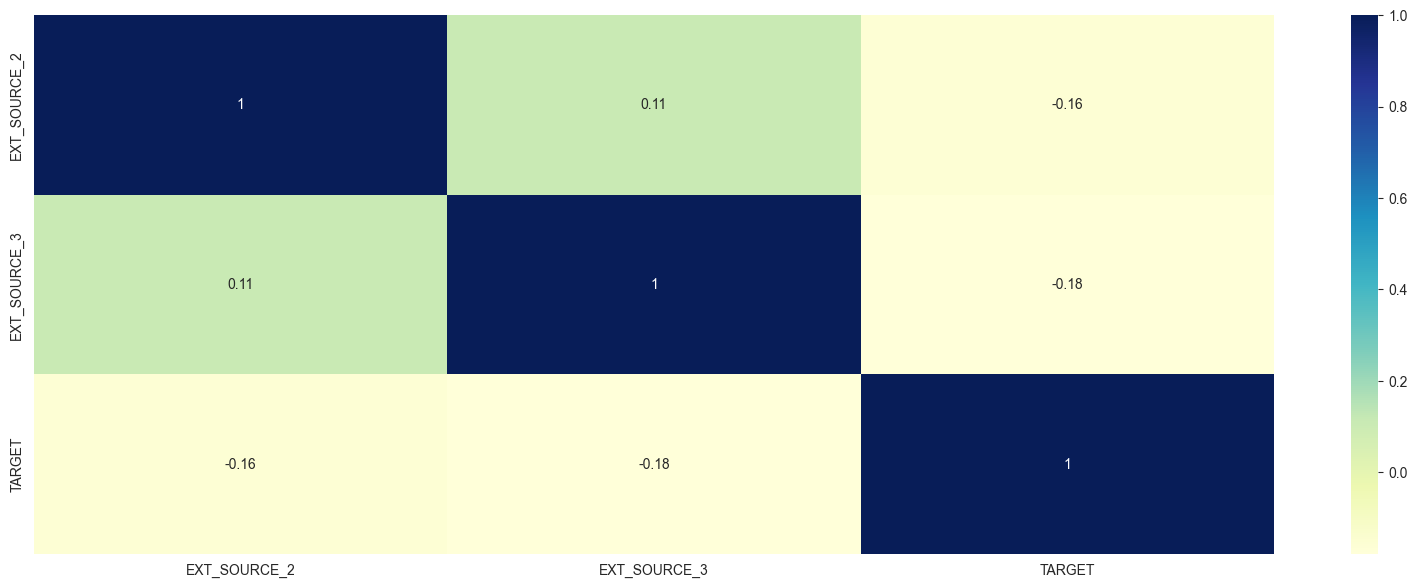

In [264]:
plt.figure(figsize=(20, 7))
sns.heatmap(get_similar_columns(application_data, 'EXT_SOURCE_', 'TARGET').corr(), annot=True, cmap='YlGnBu')
plt.show()

**<u>Observation #2<u>**
There is no linear correlation between EXT_SOURCES columns with the TARGET column.

Checking correlation of columns AMT_REQ_CREDIT_* with Target Columns

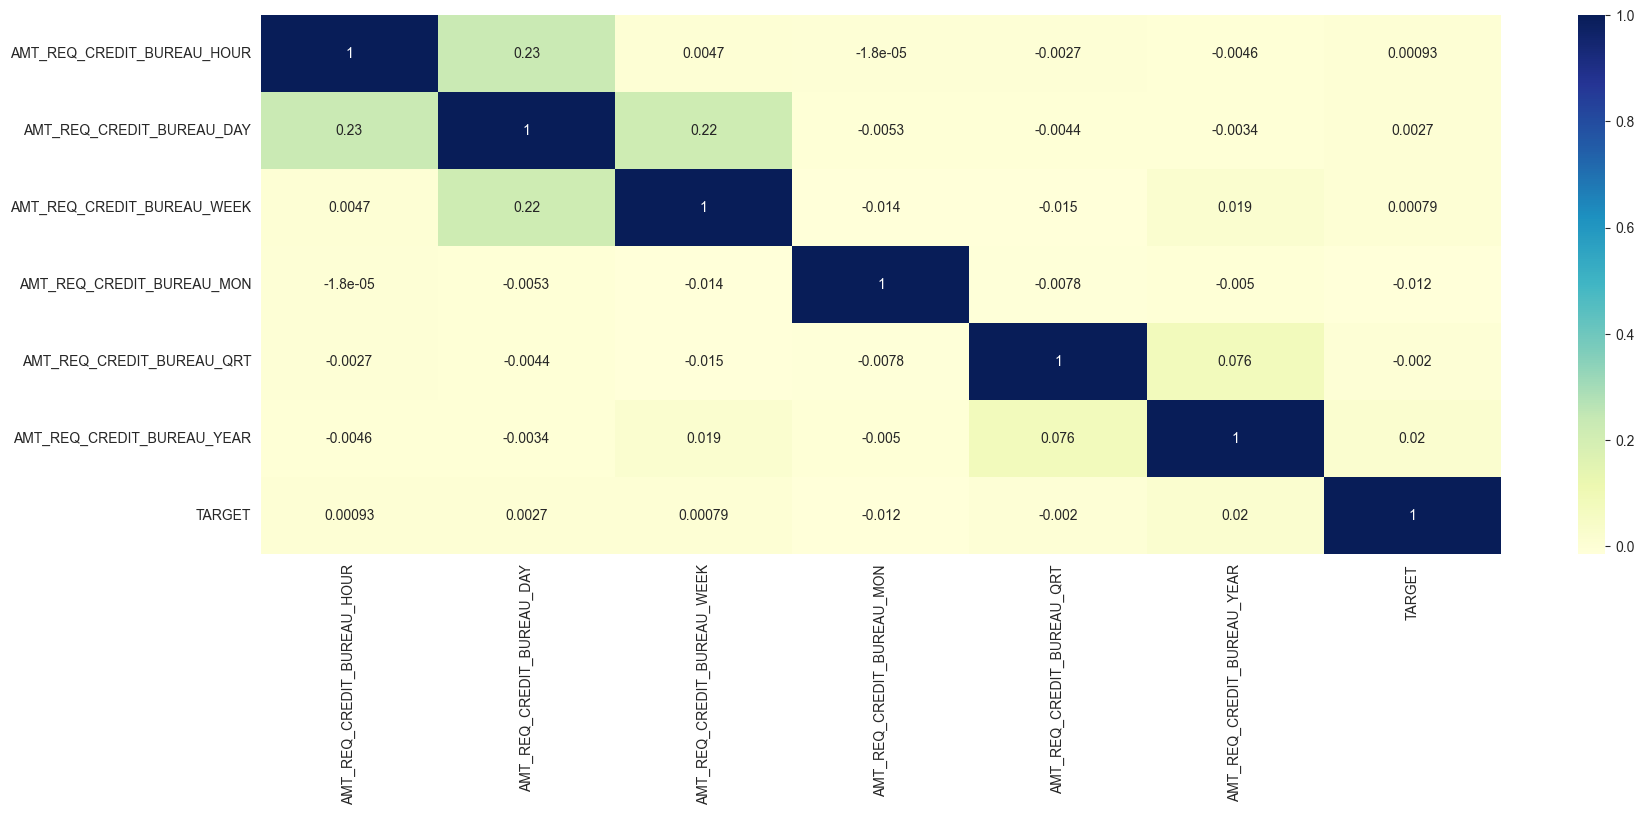

In [265]:
plt.figure(figsize=(20, 7))
sns.heatmap(get_similar_columns(application_data, 'AMT_REQ_CREDIT_', 'TARGET').corr(), annot=True, cmap='YlGnBu')
plt.show()

**<u> Observation #3<u>**

There seem to be no co-relation between columns AMT_REQ_CREDIT_ and TARGET column as well.

**'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'**
       
**Since they all are number of credit inquiries, replacing missing values with the most frequent value using MODE**

In [266]:
# Running a for loop to fill the missing values with MODE value
for col in get_similar_columns(application_data, 'AMT_REQ_CREDIT_').columns:
    application_data[col].fillna(application_data[col].mode()[0], inplace=True)

Analysing CODE_GENDER column

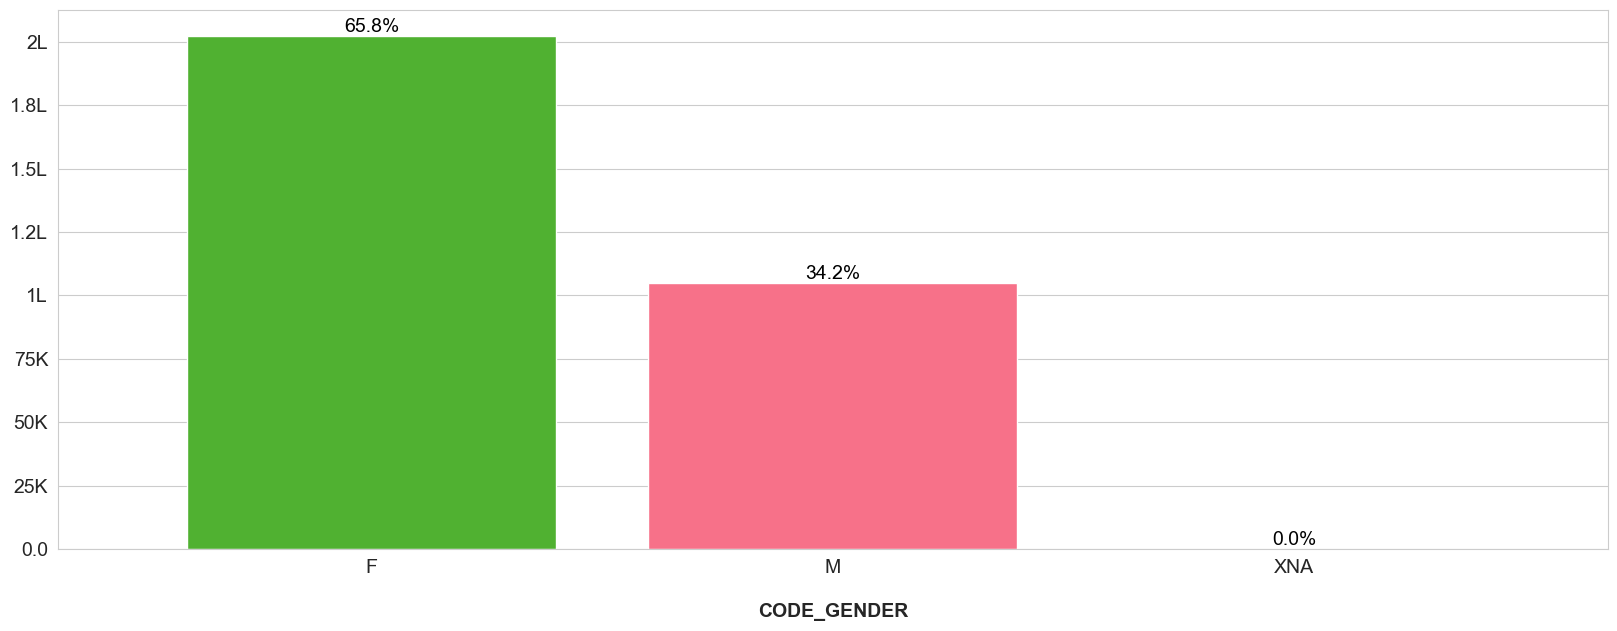

In [267]:
# Prepare a countplot
prepare_count_plot(application_data, 'CODE_GENDER')

In [268]:
# Get the value count
application_data['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [269]:
# Get the percentage value count
application_data['CODE_GENDER'].value_counts(normalize=True) * 100

CODE_GENDER
F      65.834393
M      34.164306
XNA     0.001301
Name: proportion, dtype: float64

**<u>Observation #4<u>**

**<u>CODE_GENDER<u>**

**There are 4 records with Gender as XNA. These will be changed to 'Female' as ~66% of the data are of females and adding 4 records to it won't affect the analysis.**

In [270]:
# Replacing XNA with F in CODE_GENDER
application_data['CODE_GENDER'].replace('XNA', 'F', inplace=True)

**<u>OCCUPATION_TYPE<u>**

**Since the percentage of missing values is high, and occupation type is an important parameter while lending money, also since it's an unordered categorical columns, we will replace the missing values with 'Unknown'**

In [271]:
# Filling NaN (missing values) with Unknown in OCCUPATION_TYPE
application_data['OCCUPATION_TYPE'].fillna(value='Unknown', inplace=True)

In [272]:
# Get descriptive analytic of EXT_SOURCE_3
application_data['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

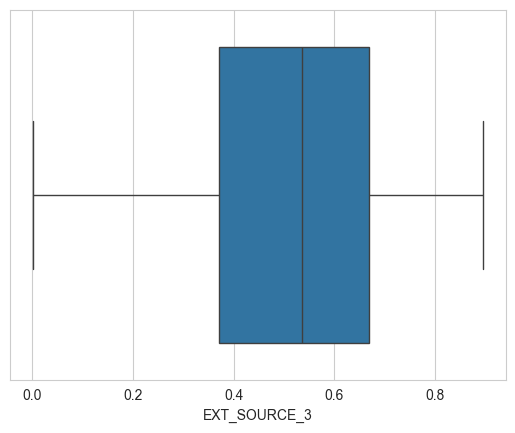

In [273]:
# Plotting a box plot for EXT_SOURCE_3
sns.boxplot(data=application_data, x='EXT_SOURCE_3')
plt.show()

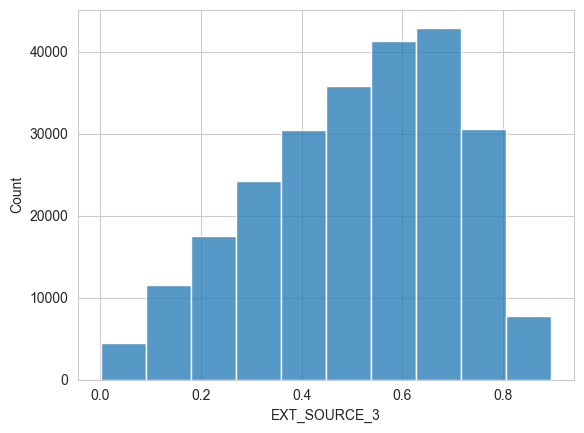

In [274]:
# Plotting a histogram for EXT_SOURCE_3
sns.histplot(data=application_data, x='EXT_SOURCE_3', bins=10)
plt.show()

In [275]:
# Getting the MODE value for EXT_SOURCE_3
application_data['EXT_SOURCE_3'].mode()

0    0.7463
Name: EXT_SOURCE_3, dtype: float64

**<u>EXT_SOURCE_3<u>**

**Since, this is a score from external source, hence these are finite numbers. As such, we will mode to impute the missing data instead of mean/median.**

In [276]:
# Replacing missing values with MODE value
application_data['EXT_SOURCE_3'].fillna(application_data['EXT_SOURCE_3'].mode()[0], inplace=True)

In [277]:
# Get the missing values left in the application_data
get_missing_values(application_data)

index         0
0           NAME_TYPE_SUITE  0.420148
1  DEF_60_CNT_SOCIAL_CIRCLE  0.332021
2  OBS_30_CNT_SOCIAL_CIRCLE  0.332021
3  DEF_30_CNT_SOCIAL_CIRCLE  0.332021
4  OBS_60_CNT_SOCIAL_CIRCLE  0.332021
5              EXT_SOURCE_2  0.214626
6           AMT_GOODS_PRICE  0.090403
7               AMT_ANNUITY  0.003902
8           CNT_FAM_MEMBERS  0.000650
9    DAYS_LAST_PHONE_CHANGE  0.000325

In [278]:
# Get the shape of the application_data
application_data.shape

(307511, 73)

#### C. Summary
- After dropping and imputing, the shape of Application Data dataframe have reduced from 3,07,511 rows and 122 columns to 3,07,511 rows and 73 columns.
- The remaining columns with missing values are lower than 1%. We could drop these columns or impute them, however, we will leave them as it is.

### 3.1.2. Previous Application Data
___

In [279]:
# Get Data with missing values
get_missing_values(previous_application)

index          0
0    RATE_INTEREST_PRIVILEGED  99.643698
1       RATE_INTEREST_PRIMARY  99.643698
2            AMT_DOWN_PAYMENT  53.636480
3           RATE_DOWN_PAYMENT  53.636480
4             NAME_TYPE_SUITE  49.119754
5   NFLAG_INSURED_ON_APPROVAL  40.298129
6            DAYS_TERMINATION  40.298129
7               DAYS_LAST_DUE  40.298129
8   DAYS_LAST_DUE_1ST_VERSION  40.298129
9              DAYS_FIRST_DUE  40.298129
10         DAYS_FIRST_DRAWING  40.298129
11            AMT_GOODS_PRICE  23.081773
12                AMT_ANNUITY  22.286665
13                CNT_PAYMENT  22.286366
14        PRODUCT_COMBINATION   0.020716
15                 AMT_CREDIT   0.000060

In [280]:
# Get the count of columns with missing values
get_missing_values(previous_application).shape[0]

16

**<u>Observation #1</u>**

There are 67 columns with missing values in Application Data.

#### A. Deleting columns with nulls

In [281]:
# Deleting columns with nulls >= 40%
previous_application = remove_nulls(previous_application, 40)

No. of columns before deletion: 37
No. of columns after deletion: 26
No. of columns dropped: 11


#### B. Imputing missing values

Checking the dataframe after removing missing values

In [282]:
# Get the columns with missing values left in previous_application
get_missing_values(previous_application)

index          0
0      AMT_GOODS_PRICE  23.081773
1          AMT_ANNUITY  22.286665
2          CNT_PAYMENT  22.286366
3  PRODUCT_COMBINATION   0.020716
4           AMT_CREDIT   0.000060

##### a. AMT_ANNUITY

In [283]:
# Getting descriptive statistics of AMT_ANNUITY and rounding decimals to the 2nd digit
round(previous_application['AMT_ANNUITY'].describe(percentiles=[0.9, 0.95, 0.99]), 2)

count    1297979.00
mean       15955.12
std        14782.14
min            0.00
50%        11250.00
90%        34703.82
95%        45336.78
99%        69685.79
max       418058.14
Name: AMT_ANNUITY, dtype: float64

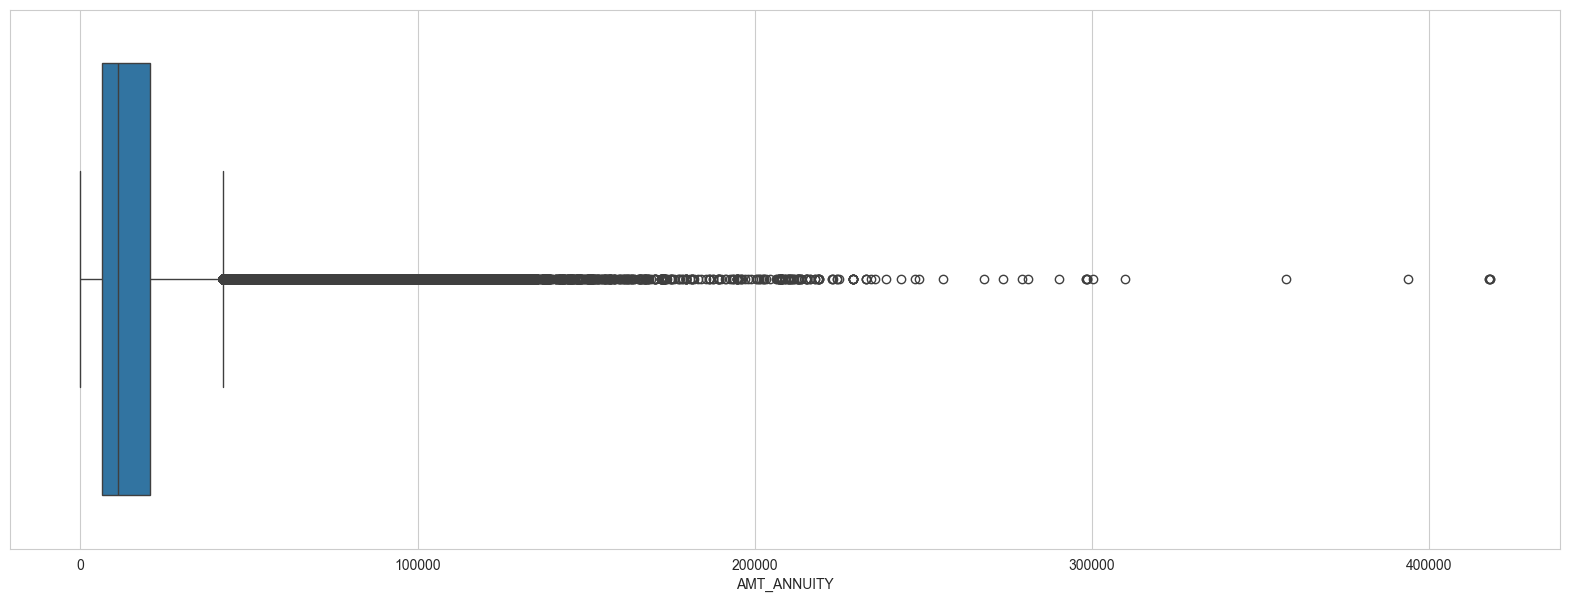

In [284]:
# Plotting a boxplot for AMT_ANNUITY
plt.figure(figsize=(20, 7))
sns.boxplot(data=previous_application, x='AMT_ANNUITY')
plt.show()

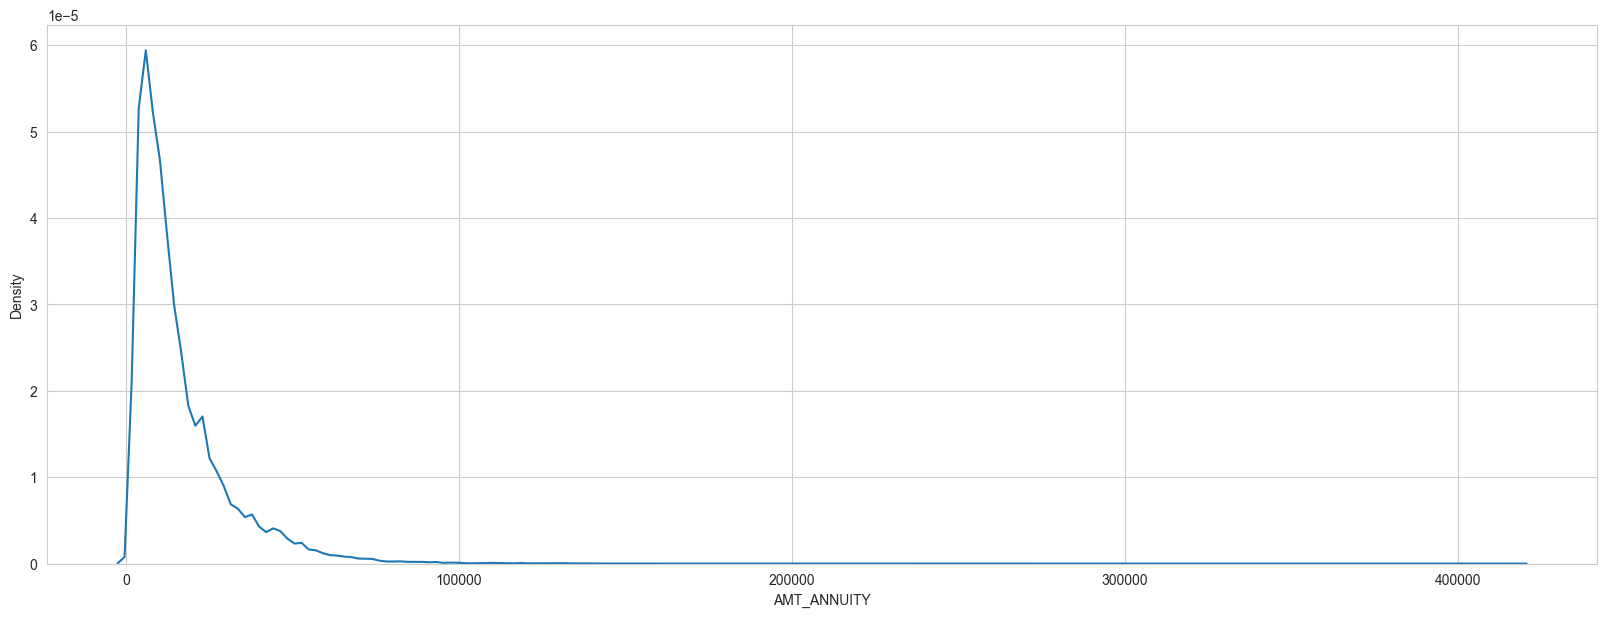

In [285]:
# Plotting a KDEPlot for AMT_ANNUITY
plt.figure(figsize=(20, 7))
sns.kdeplot(data=previous_application, x='AMT_ANNUITY')
plt.show()

**<u>Observation #2</u>**

The AMT_ANNUITY is skewed to the left (lower range) and has outliers. Also, there's only a single peak on the left side of the distribution. Hence, it's median will be used for imputing and not mean.

In [286]:
# Replacing missing values in AMT_ANNUITY with its MEDIAN value
previous_application['AMT_ANNUITY'].fillna(previous_application['AMT_ANNUITY'].median(), inplace=True)

##### b. AMT_GOODS_PRICE

In [287]:
# Getting descriptive statistics of AMT_GOODS_PRICE and rounding decimals to the 2nd digit
round(previous_application['AMT_GOODS_PRICE'].describe(percentiles=[0.9, 0.95, 0.99]), 2)

count    1284699.00
mean      227847.28
std       315396.56
min            0.00
50%       112320.00
90%       585000.00
95%       900000.00
99%      1395000.00
max      6905160.00
Name: AMT_GOODS_PRICE, dtype: float64

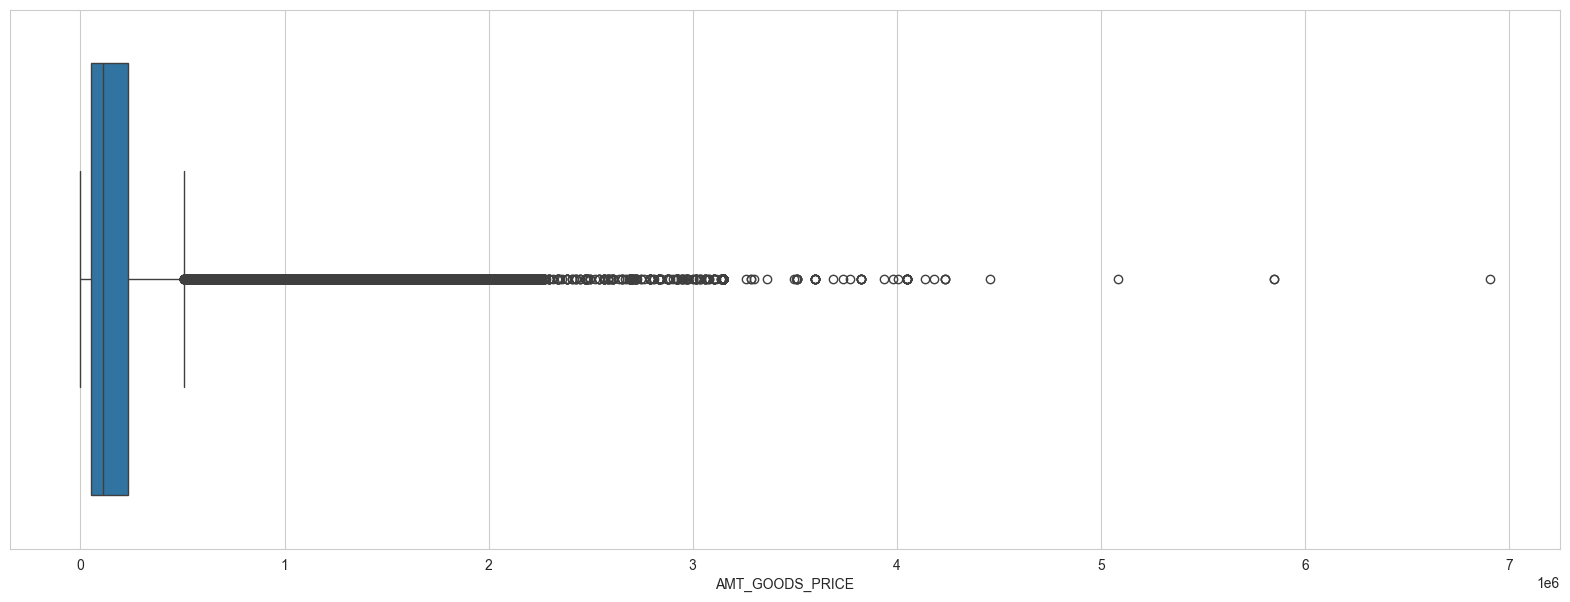

In [288]:
# Plotting a box plot of AMT_GOODS_PRICE
plt.figure(figsize=(20, 7))
sns.boxplot(data=previous_application, x='AMT_GOODS_PRICE')
plt.show()

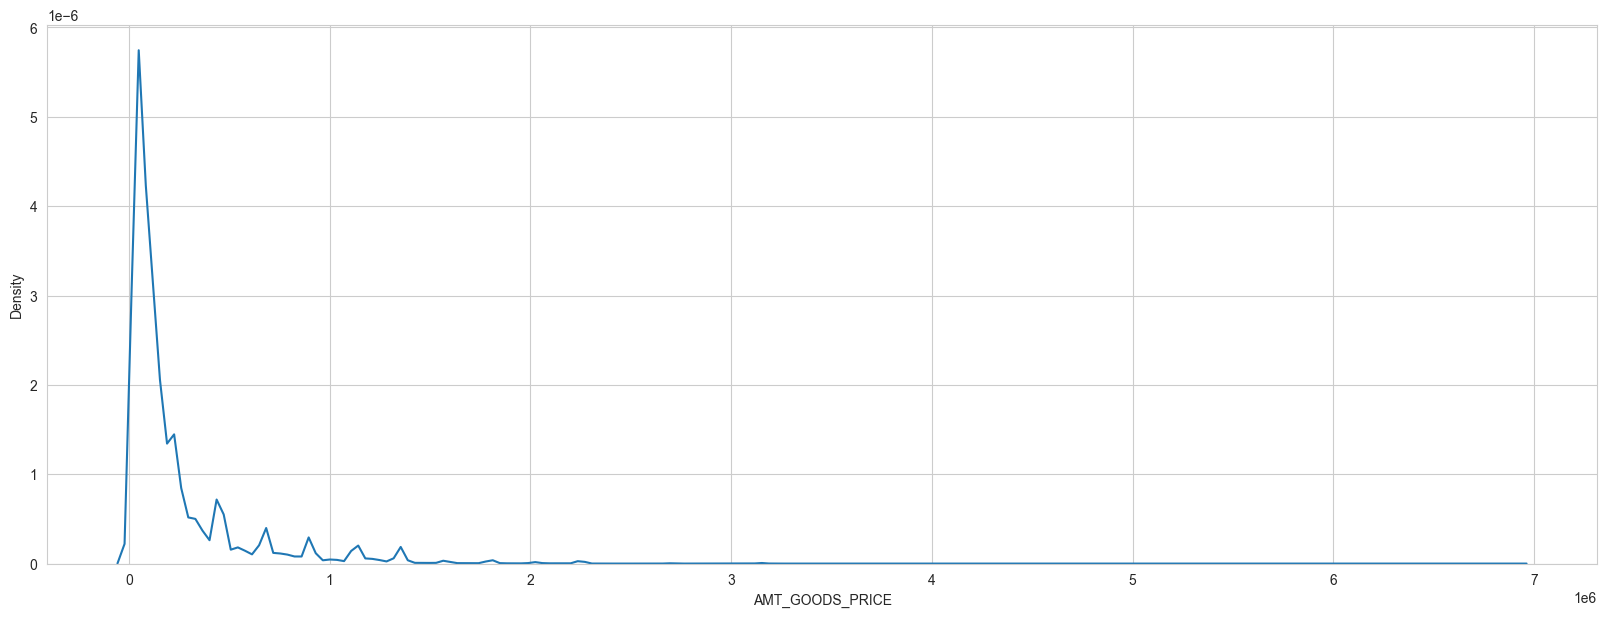

In [289]:
# Plotting a KDEPlot for AMT_GOODS_PRICE
plt.figure(figsize=(20, 7))
sns.kdeplot(data=previous_application, x='AMT_GOODS_PRICE')
plt.show()

**<u>Observation #3</u>**

The AMT_GOODS_PRICE is skewed to the left (lower range) and has outliers. However, there are several peaks along the distribution.

In [290]:
# Creating a DataFrame with AMT_GOODS_PRICE's Mean, Median and Mode value
df_AMT_GOODS_PRICE = pd.DataFrame(data={
    'Mean': previous_application['AMT_GOODS_PRICE'].fillna(previous_application['AMT_GOODS_PRICE'].mean()),
    'Median': previous_application['AMT_GOODS_PRICE'].fillna(previous_application['AMT_GOODS_PRICE'].median()),
    'Mode': previous_application['AMT_GOODS_PRICE'].fillna(previous_application['AMT_GOODS_PRICE'].mode()[0])
})

In [291]:
# Display the dataframe
df_AMT_GOODS_PRICE

Mean    Median      Mode
0         17145.0   17145.0   17145.0
1        607500.0  607500.0  607500.0
2        112500.0  112500.0  112500.0
3        450000.0  450000.0  450000.0
4        337500.0  337500.0  337500.0
...           ...       ...       ...
1670209  267295.5  267295.5  267295.5
1670210   87750.0   87750.0   87750.0
1670211  105237.0  105237.0  105237.0
1670212  180000.0  180000.0  180000.0
1670213  360000.0  360000.0  360000.0

[1670214 rows x 3 columns]

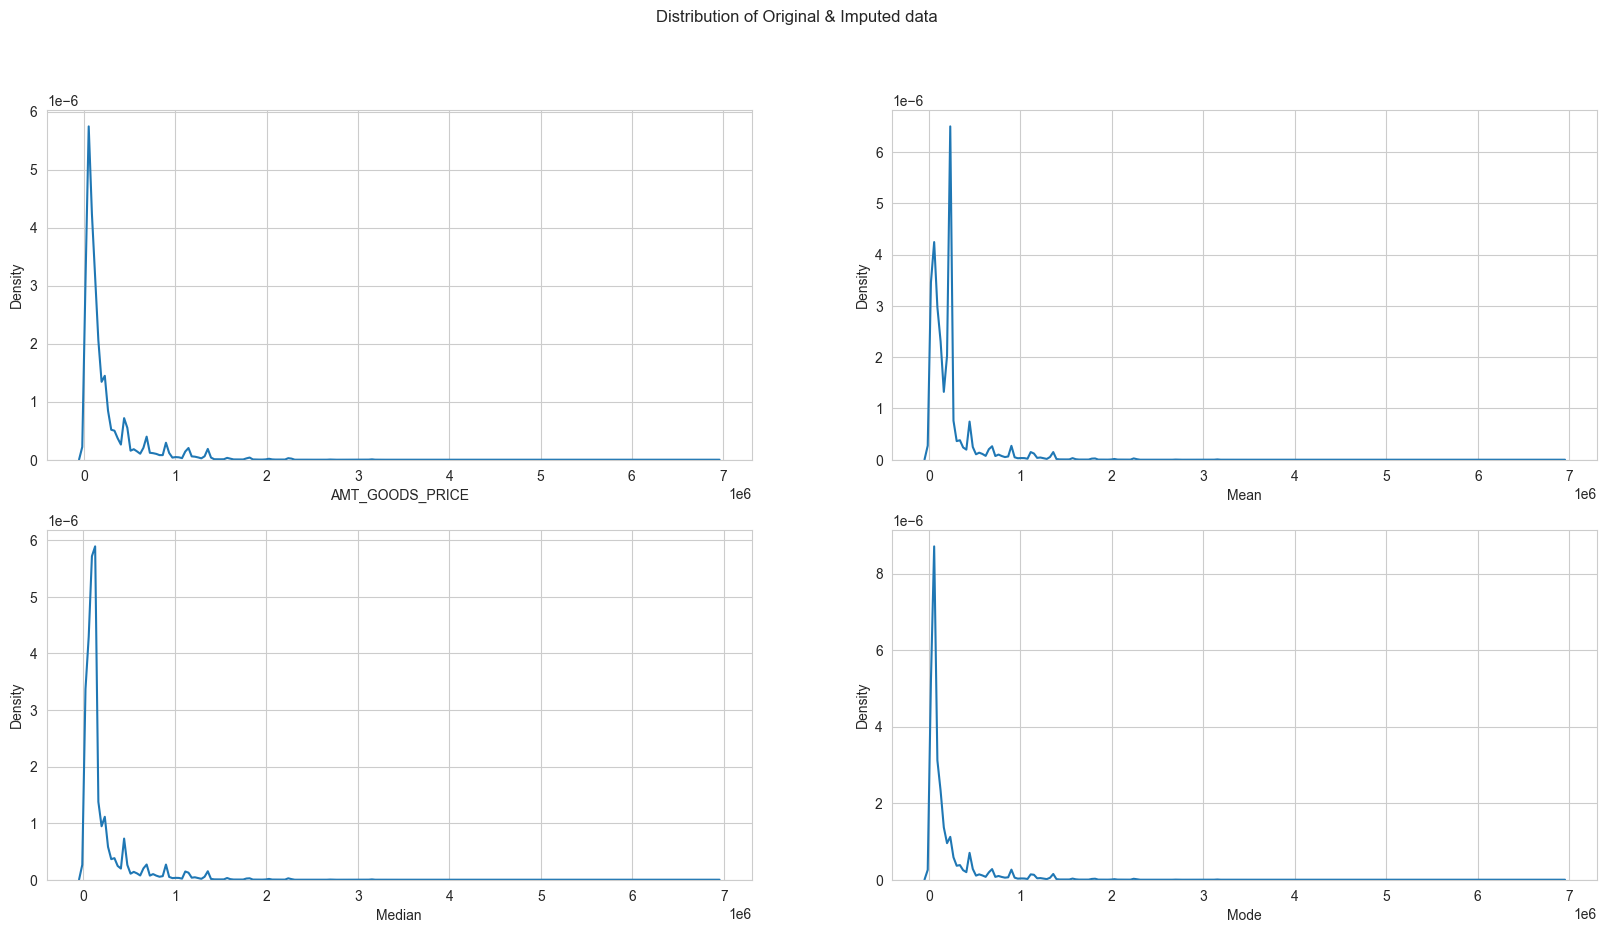

In [292]:
# Create KDEPlot with subplots to identify the closest match
plt.figure(figsize=(20, 10))

plt.suptitle('Distribution of Original & Imputed data')

plt.subplot(2, 2, 1)
sns.kdeplot(data=previous_application, x='AMT_GOODS_PRICE')

for i in enumerate(df_AMT_GOODS_PRICE.columns):
    plt.subplot(2, 2, i[0] + 2)
    sns.kdeplot(data=df_AMT_GOODS_PRICE, x=i[1])

plt.show()

**<u>Observation #4</u>**

The distribution in original data is closest with the imputed data using mode.  

**Imputing AMT_GOODS_PRICE with the mode as its distribution is closest to the original distribution**

In [293]:
# Replacing missing values in AMT_GOODS_PRICE with its MODE value
previous_application['AMT_GOODS_PRICE'].fillna(previous_application['AMT_GOODS_PRICE'].mode()[0], inplace=True)

##### c. CNT_PAYMENT

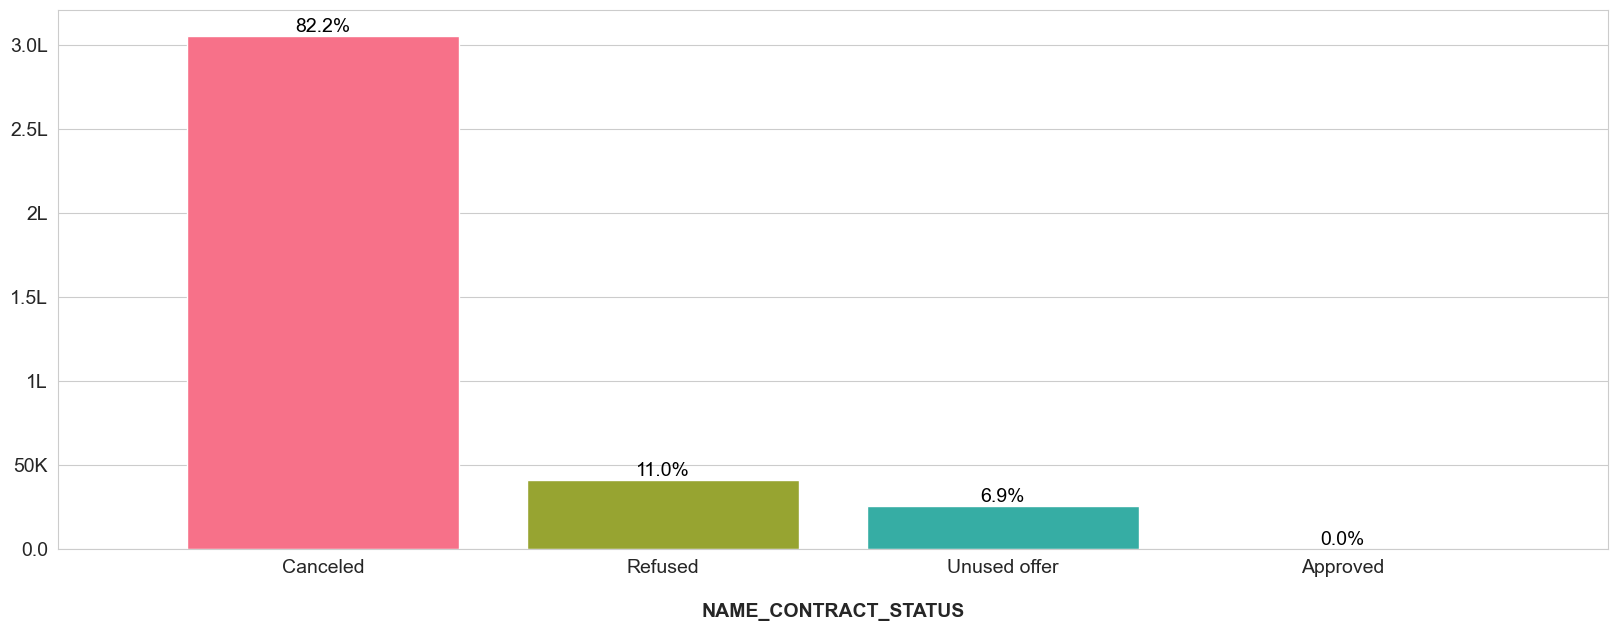

In [294]:
# Preparing Count Plot for CNT_PAYMENT
prepare_count_plot(
    previous_application[previous_application['CNT_PAYMENT'].isnull()],
    'NAME_CONTRACT_STATUS',
)

In [295]:
# Getting percentage value count in a tabular format
previous_application[previous_application['CNT_PAYMENT'].isnull()]['NAME_CONTRACT_STATUS'].value_counts(normalize=True) * 100

NAME_CONTRACT_STATUS
Canceled        82.154850
Refused         10.987024
Unused offer     6.857051
Approved         0.001075
Name: proportion, dtype: float64

**<u>Observation #5</u>**

Looking at the relation between NAME_CONTRACT_STATUS and with missing values in CNT_PAYMENT, it is clear that almost 100% of them have either Canceled, Refused or have Unused offer. Hence, the term of previous credit will be 0 in such case.

**Impute CNT_PAYMENT with 0 as their previous loan didn't begin. They were either cancelled, refused or unused.**

In [296]:
# Replacing missing values in CNT_PAYMENT with 0
previous_application['CNT_PAYMENT'].fillna(0,inplace = True)

Checking the missing values left

In [297]:
get_missing_values(previous_application)

index         0
0  PRODUCT_COMBINATION  0.020716
1           AMT_CREDIT  0.000060

Checking the shape of the data

In [298]:
previous_application.shape

(1670214, 26)

#### C. Summary
- After dropping and imputing, the shape of Previous Application Data dataframe have reduced from 16,70,214 rows and 37 columns to 16,70,214 rows and 26 columns.
- The remaining columns with missing values are lower than 1%. We could drop these columns or impute them, however, we will leave them as it is.

## 3.2. Data Standardization
___
___

### 3.2.1. Application Data
___

Checking columns with dtype = object

In [299]:
application_data.select_dtypes('object')

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
307506         Cash loans           M            N               N   
307507         Cash loans           F            N               Y   
307508         Cash loans           F            N               Y   
307509         Cash loans           F            N               Y   
307510         Cash loans           F            N               N   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0        Unaccompanied               Working  Secondary / secondary special   
1               Family         State servant               Higher education   
2        Unaccompanied               Working  Secondary / secondary special   
3        Unaccompanied               Working  Secondary / secondary special   
4        Unaccompanied               Working  Secondary / secondary special   
...                ...                   ...                            ...   
307506   Unaccompanied               Working  Secondary / secondary special   
307507   Unaccompanied             Pensioner  Secondary / secondary special   
307508   Unaccompanied               Working               Higher education   
307509   Unaccompanied  Commercial associate  Secondary / secondary special   
307510   Unaccompanied  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
0       Single / not married  House / apartment        Laborers   
1                    Married  House / apartment      Core staff   
2       Single / not married  House / apartment        Laborers   
3             Civil marriage  House / apartment        Laborers   
4       Single / not married  House / apartment      Core staff   
...                      ...                ...             ...   
307506             Separated       With parents     Sales staff   
307507                 Widow  House / apartment         Unknown   
307508             Separated  House / apartment        Managers   
307509               Married  House / apartment        Laborers   
307510               Married  House / apartment        Laborers   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  
0                       WEDNESDAY  Business Entity Type 3  
1                          MONDAY                  School  
2                          MONDAY              Government  
3                       WEDNESDAY  Business Entity Type 3  
4                        THURSDAY                Religion  
...                           ...                     ...  
307506                   THURSDAY                Services  
307507                     MONDAY                     XNA  
307508                   THURSDAY                  School  
307509                  WEDNESDAY  Business Entity Type 1  
307510                   THURSDAY  Business Entity Type 3  

[307511 rows x 12 columns]

In [300]:
# Melting the application_data
melted_df = application_data.select_dtypes('object').melt(var_name='column', value_name='value')

In [301]:
# Creating a Pivot table of the melted dataframe to get the count
pd.pivot_table(
    data=melted_df,
    index=['column', 'value'],
    aggfunc='size',
    sort='column'
)

column                      value    
CODE_GENDER                 F            202452
                            M            105059
FLAG_OWN_CAR                N            202924
                            Y            104587
FLAG_OWN_REALTY             N             94199
                                          ...  
WEEKDAY_APPR_PROCESS_START  SATURDAY      33852
                            SUNDAY        16181
                            THURSDAY      50591
                            TUESDAY       53901
                            WEDNESDAY     51934
Length: 124, dtype: int64

Checking numerical columns

In [302]:
# Getting analytics of numerical columns in application_data and rounding decimals to 2 digits
round(application_data.describe(), 2)

SK_ID_CURR     TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count   307511.00  307511.00     307511.00      3.075110e+05   307511.00   
mean    278180.52       0.08          0.42      1.687979e+05   599026.00   
std     102790.18       0.27          0.72      2.371231e+05   402490.78   
min     100002.00       0.00          0.00      2.565000e+04    45000.00   
25%     189145.50       0.00          0.00      1.125000e+05   270000.00   
50%     278202.00       0.00          0.00      1.471500e+05   513531.00   
75%     367142.50       0.00          1.00      2.025000e+05   808650.00   
max     456255.00       1.00         19.00      1.170000e+08  4050000.00   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count    307499.00        307233.00                   307511.00   307511.00   
mean      27108.57        538396.21                        0.02   -16037.00   
std       14493.74        369446.46                        0.01     4363.99   
min        1615.50         40500.00                        0.00   -25229.00   
25%       16524.00        238500.00                        0.01   -19682.00   
50%       24903.00        450000.00                        0.02   -15750.00   
75%       34596.00        679500.00                        0.03   -12413.00   
max      258025.50       4050000.00                        0.07    -7489.00   

       DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
count      307511.00  ...         307511.00         307511.00   
mean        63815.05  ...              0.01              0.00   
std        141275.77  ...              0.09              0.02   
min        -17912.00  ...              0.00              0.00   
25%         -2760.00  ...              0.00              0.00   
50%         -1213.00  ...              0.00              0.00   
75%          -289.00  ...              0.00              0.00   
max        365243.00  ...              1.00              1.00   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
count         307511.00         307511.00                   307511.00   
mean               0.00              0.00                        0.01   
std                0.02              0.02                        0.08   
min                0.00              0.00                        0.00   
25%                0.00              0.00                        0.00   
50%                0.00              0.00                        0.00   
75%                0.00              0.00                        0.00   
max                1.00              1.00                        4.00   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count                  307511.00                   307511.00   
mean                        0.01                        0.03   
std                         0.10                        0.19   
min                         0.00                        0.00   
25%                         0.00                        0.00   
50%                         0.00                        0.00   
75%                         0.00                        0.00   
max                         9.00                        8.00   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count                  307511.00                  307511.00   
mean                        0.23                       0.23   
std                         0.86                       0.74   
min                         0.00                       0.00   
25%                         0.00                       0.00   
50%                         0.00                       0.00   
75%                         0.00                       0.00   
max                        27.00                     261.00   

       AMT_REQ_CREDIT_BUREAU_YEAR  
count                   307511.00  
mean                         1.64  
std                          1.86  
min                          0.00  
25%                          0.00  
50%  

**<u>Observation #1</u>**

Here we notice that the DAYS_* columns have values in negative. Days can't be negative. Hence, we will convert them to positive days.

#### A. DAYS_*

Getting subset of application_data dataframe with column names prefixed as 'DAYS_'

In [303]:
get_similar_columns(application_data, 'DAYS_')

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0            -9461           -637            -3648.0            -2120   
1           -16765          -1188            -1186.0             -291   
2           -19046           -225            -4260.0            -2531   
3           -19005          -3039            -9833.0            -2437   
4           -19932          -3038            -4311.0            -3458   
...            ...            ...                ...              ...   
307506       -9327           -236            -8456.0            -1982   
307507      -20775         365243            -4388.0            -4090   
307508      -14966          -7921            -6737.0            -5150   
307509      -11961          -4786            -2562.0             -931   
307510      -16856          -1262            -5128.0             -410   

        DAYS_LAST_PHONE_CHANGE  
0                      -1134.0  
1                       -828.0  
2                       -815.0  
3                       -617.0  
4                      -1106.0  
...                        ...  
307506                  -273.0  
307507                     0.0  
307508                 -1909.0  
307509                  -322.0  
307510                  -787.0  

[307511 rows x 5 columns]

Converting the negative values to positive

In [304]:
for column in get_similar_columns(application_data, 'DAYS_').columns:
    application_data[column] = abs(application_data[column])

#### B. AMT_INCOME_TOTAL

In [305]:
# Getting analytics of numerical columns in application_data
application_data['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

**Creating Bins for Income**

In the descriptive analytics, AMT_INCOME_TOTAL has e+5, hence dividing it by ^5 i.e. 100000

In [306]:
# Dividing the AMT_INCOME_TOTAL with 100000
application_data['AMT_INCOME_TOTAL'] = application_data['AMT_INCOME_TOTAL'] / 100000

In [307]:
# Getting analytics of numerical columns in application_data
application_data['AMT_INCOME_TOTAL'].describe()

count    307511.000000
mean          1.687979
std           2.371231
min           0.256500
25%           1.125000
50%           1.471500
75%           2.025000
max        1170.000000
Name: AMT_INCOME_TOTAL, dtype: float64

Binning AMT_INCOME_TOTAL column

In [308]:
# Creating Income range
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1200]
labels = ['0-100k', '100-200k', '200-300k', '300-400k', '400-500k', '500-600k', '600-700k', '700-800k', '800-900k', '900k-1M', 'Above 1M']

application_data['AMT_INCOME_RANGE'] = pd.cut(application_data['AMT_INCOME_TOTAL'], bins=bins, labels=labels)

In [309]:
# Getting percentage value count
application_data['AMT_INCOME_RANGE'].value_counts(normalize=True) * 100

AMT_INCOME_RANGE
100-200k    50.696723
200-300k    21.194689
0-100k      20.714056
300-400k     4.772512
400-500k     1.743352
500-600k     0.356085
600-700k     0.282592
800-900k     0.096907
Above 1M     0.081298
700-800k     0.052681
900k-1M      0.009105
Name: proportion, dtype: float64

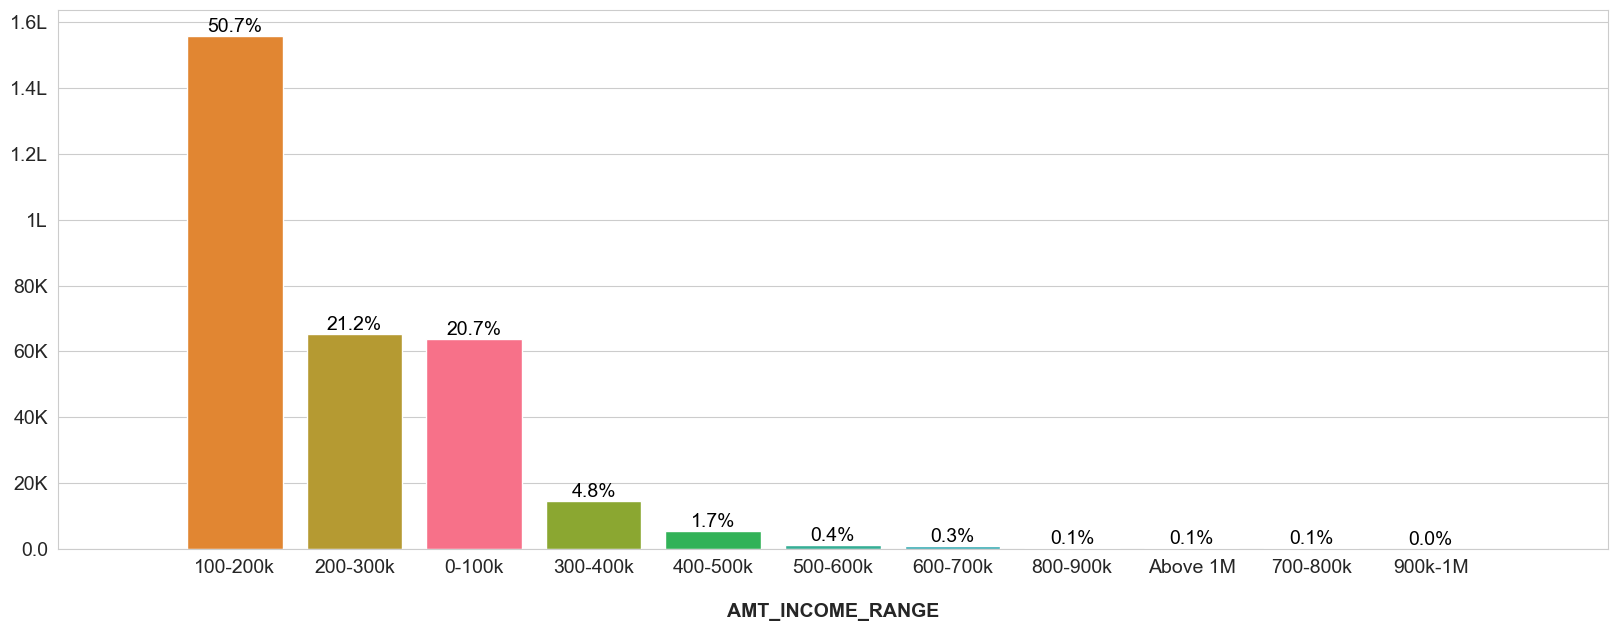

In [310]:
# Preparing Count Plot
prepare_count_plot(application_data, 'AMT_INCOME_RANGE')

**<u>Observation #2</u>**

About 50% of loan applicants income is in the range of 100 to 200K. About 92% applicants' income is less than 300k. 

#### C. AMT_CREDIT

In [311]:
# Getting analytics of numerical columns in application_data
application_data['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

**Creating Bins for Credit**

In the descriptive analytics, AMT_CREDIT has e+5, hence dividing it by ^5 i.e. 100000

In [312]:
# Dividing AMT_CREDIT to 100000
application_data['AMT_CREDIT'] = application_data['AMT_CREDIT'] / 100000

In [313]:
# Getting analytics of numerical columns in application_data
application_data['AMT_CREDIT'].describe()

count    307511.000000
mean          5.990260
std           4.024908
min           0.450000
25%           2.700000
50%           5.135310
75%           8.086500
max          40.500000
Name: AMT_CREDIT, dtype: float64

Binning AMT_CREDIT column

In [314]:
# Creating bins/groups for Credit Ranges
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50]
labels = ['0-100k', '100-200k', '200-300k', '300-400k', '400-500k', '500-600k', '600-700k', '700-800k', '800-900k', '900k-1M', '1M Above']

application_data['AMT_CREDIT_RANGE'] = pd.cut(application_data['AMT_CREDIT'], bins=bins, labels=labels)

In [315]:
# Getting percentage wise value counts 
application_data['AMT_CREDIT_RANGE'].value_counts(normalize=True) * 100

AMT_CREDIT_RANGE
200-300k    17.824728
1M Above    16.254703
500-600k    11.131960
400-500k    10.418489
100-200k     9.801275
300-400k     8.564897
600-700k     7.820533
800-900k     7.086576
700-800k     6.241403
900k-1M      2.902986
0-100k       1.952450
Name: proportion, dtype: float64

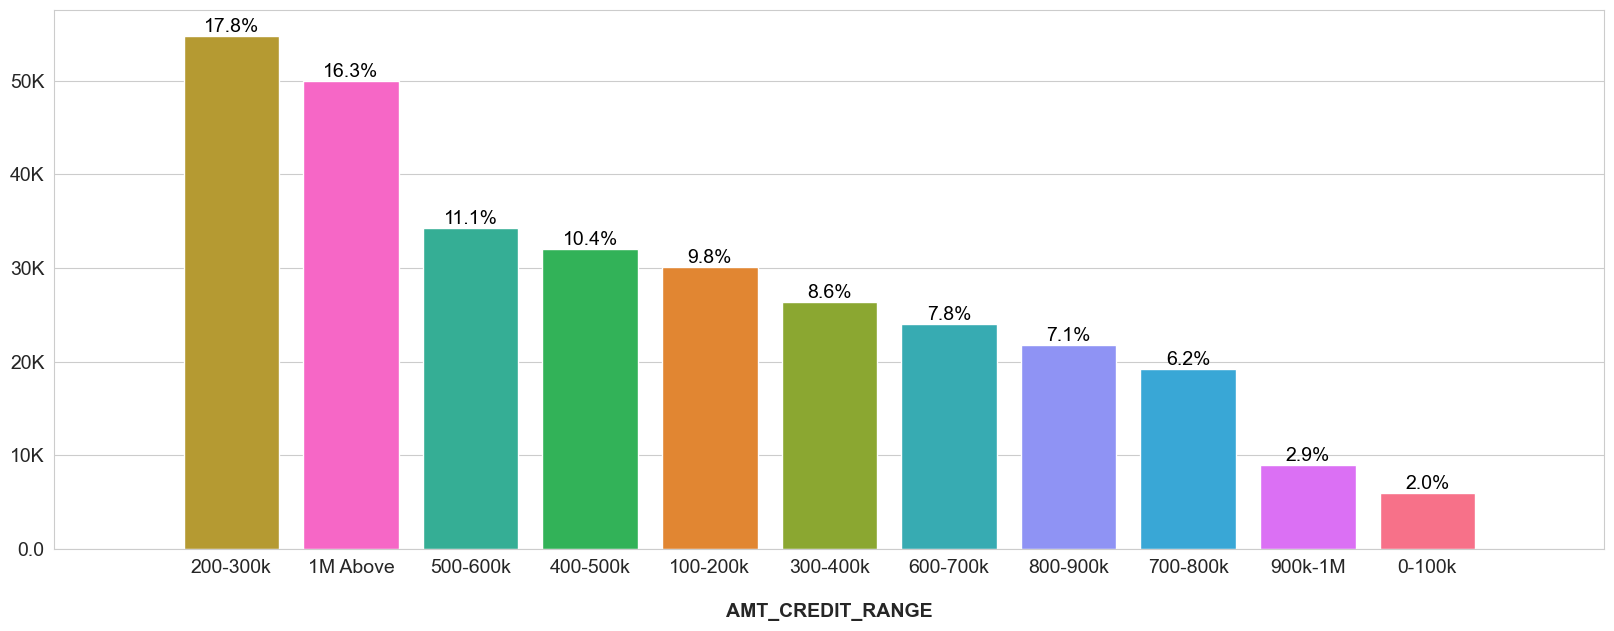

In [316]:
# Preparing Count Plot
prepare_count_plot(application_data, 'AMT_CREDIT_RANGE')

**<u>Observation #3</u>**

About 16% of applicants have taken loan above 1M.

#### D. DAYS_BIRTH

In [317]:
# Getting analytics of numerical columns in application_data
application_data['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

Converting Days since birth to Age

In [318]:
application_data['AGE'] = application_data['DAYS_BIRTH'] // 365

In [319]:
# Getting analytics of numerical columns in application_data and rounding decimals to 2 digits
application_data['AGE'].describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

Creating Age bins

In [320]:
bins = [0, 20, 30, 40, 50, 100]
labels = ['less than 20', '20-30', '30-40', '40-50', 'Above 50']

application_data['AGE_GROUP'] = pd.cut(application_data['AGE'], bins=bins, labels=labels)

In [321]:
# Getting percentage wise value counts
application_data['AGE_GROUP'].value_counts(normalize=True) * 100

AGE_GROUP
Above 50        31.604398
30-40           27.028952
40-50           24.194582
20-30           17.171743
less than 20     0.000325
Name: proportion, dtype: float64

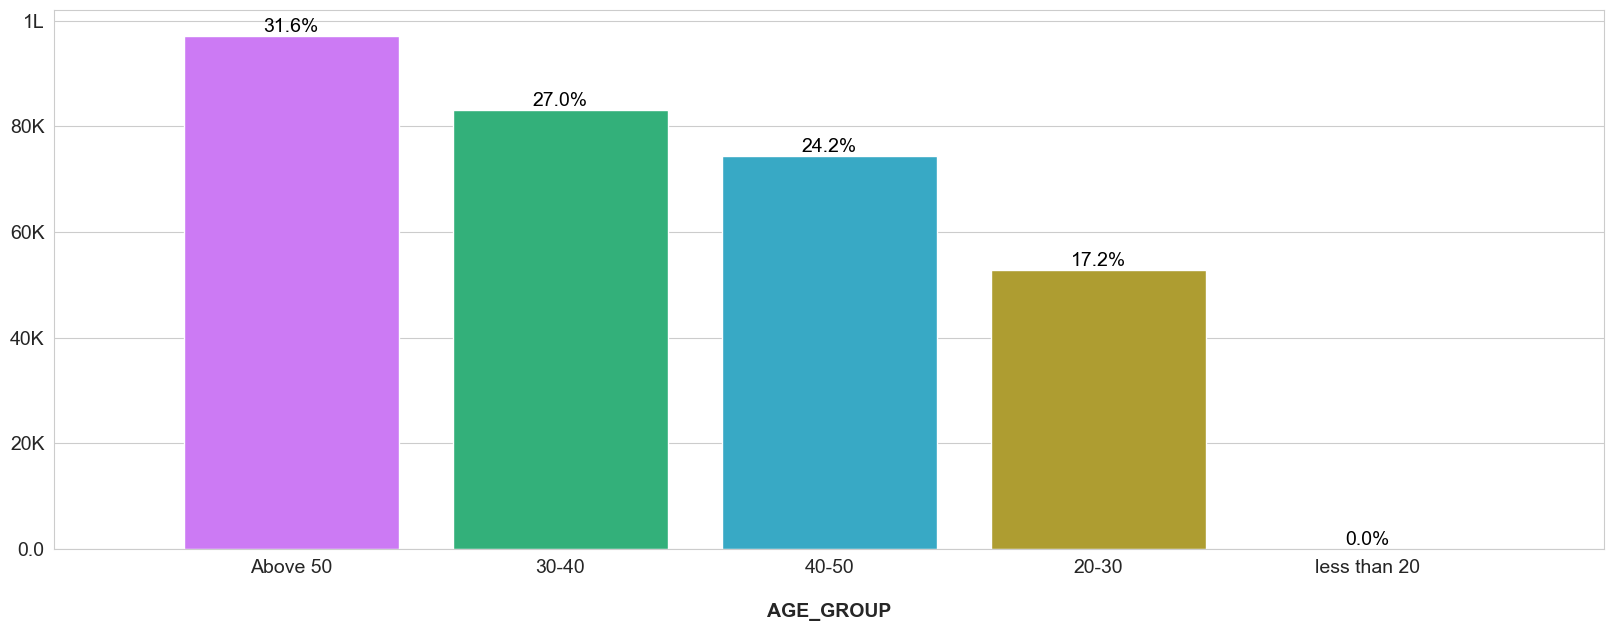

In [322]:
# Preparing Count Plot
prepare_count_plot(application_data, 'AGE_GROUP')

**<u>Observation #4</u>**

About 55% of applicants are aged above 40.

#### E. DAYS_EMPLOYED

In [323]:
# Getting analytics of numerical columns in application_data
application_data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Converting Days to Years employed

In [324]:
application_data['YEARS_EMPLOYED'] = application_data['DAYS_EMPLOYED'] // 365

In [325]:
# Getting analytics of numerical columns in application_data
application_data['YEARS_EMPLOYED'].describe()

count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YEARS_EMPLOYED, dtype: float64

Creating bins for Years of Employment

In [326]:
bins = [-1, 5, 10, 20, 30, 40, 50, 60, 1000]
labels = ['0-5', '5-10', '10-20', '20-30', '30-40', '40-50', '50-60', 'Above 60']

application_data['YEARS_EMPLOYED_RANGE'] = pd.cut(application_data['YEARS_EMPLOYED'], bins=bins, labels=labels)

In [327]:
# Getting percentage wise value counts
application_data['YEARS_EMPLOYED_RANGE'].value_counts(normalize=True) * 100

YEARS_EMPLOYED_RANGE
0-5         49.604079
5-10        18.205202
Above 60    18.007161
10-20       10.620108
20-30        2.734536
30-40        0.772005
40-50        0.056909
50-60        0.000000
Name: proportion, dtype: float64

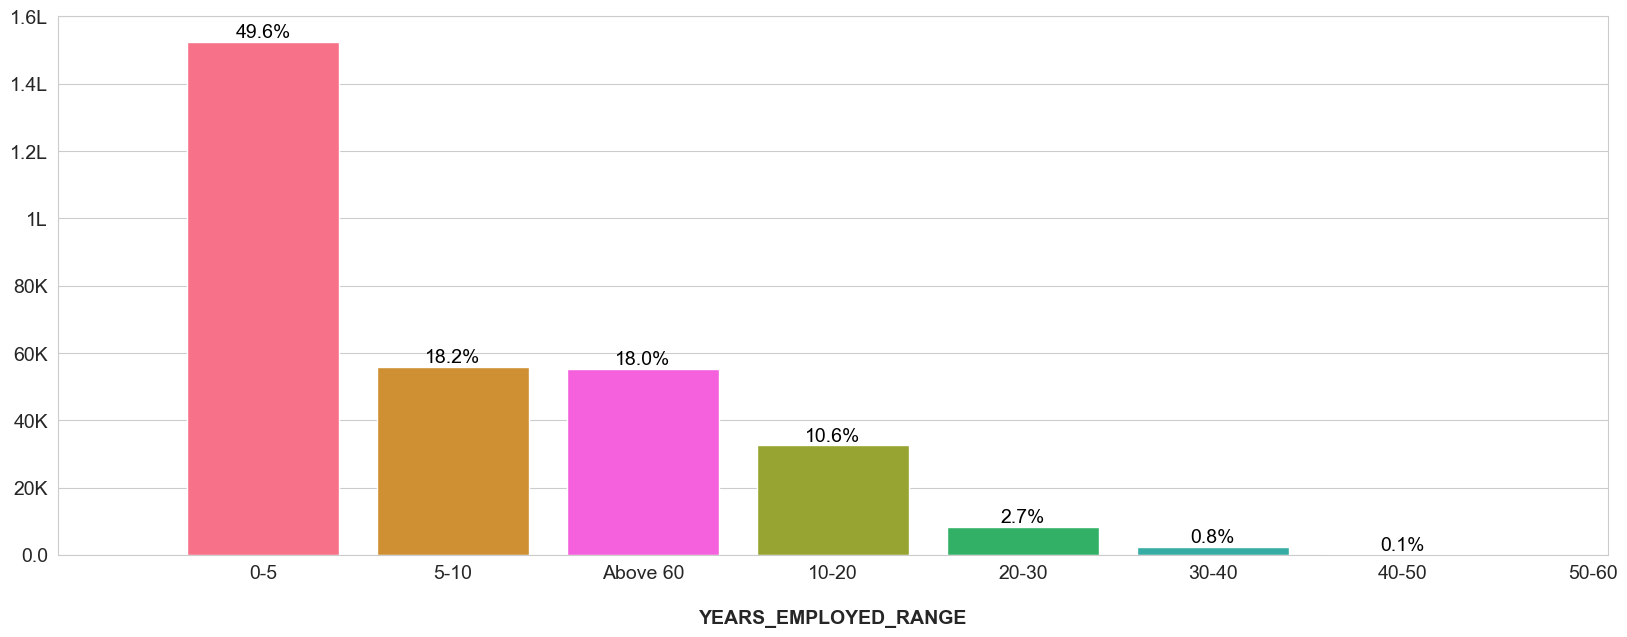

In [328]:
# Preparing Count Plot
prepare_count_plot(application_data, 'YEARS_EMPLOYED_RANGE')

**<u>Observation #5</u>**

About 50% of applicants have an experience of 0-5 years.

### 3.2.2. Previous Application Data
___

Checking columns with dtype = object

In [329]:
previous_application.select_dtypes('object')

NAME_CONTRACT_TYPE WEEKDAY_APPR_PROCESS_START  \
0           Consumer loans                   SATURDAY   
1               Cash loans                   THURSDAY   
2               Cash loans                    TUESDAY   
3               Cash loans                     MONDAY   
4               Cash loans                   THURSDAY   
...                    ...                        ...   
1670209     Consumer loans                  WEDNESDAY   
1670210     Consumer loans                    TUESDAY   
1670211     Consumer loans                     MONDAY   
1670212         Cash loans                  WEDNESDAY   
1670213         Cash loans                     SUNDAY   

        FLAG_LAST_APPL_PER_CONTRACT NAME_CASH_LOAN_PURPOSE  \
0                                 Y                    XAP   
1                                 Y                    XNA   
2                                 Y                    XNA   
3                                 Y                    XNA   
4                                 Y                Repairs   
...                             ...                    ...   
1670209                           Y                    XAP   
1670210                           Y                    XAP   
1670211                           Y                    XAP   
1670212                           Y                    XNA   
1670213                           Y                    XNA   

        NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE CODE_REJECT_REASON  \
0                   Approved  Cash through the bank                XAP   
1                   Approved                    XNA                XAP   
2                   Approved  Cash through the bank                XAP   
3                   Approved  Cash through the bank                XAP   
4                    Refused  Cash through the bank                 HC   
...                      ...                    ...                ...   
1670209             Approved  Cash through the bank                XAP   
1670210             Approved  Cash through the bank                XAP   
1670211             Approved  Cash through the bank                XAP   
1670212             Approved  Cash through the bank                XAP   
1670213             Approved  Cash through the bank                XAP   

        NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0               Repeater                Mobile            POS   
1               Repeater                   XNA           Cash   
2               Repeater                   XNA           Cash   
3               Repeater                   XNA           Cash   
4               Repeater                   XNA           Cash   
...                  ...                   ...            ...   
1670209        Refreshed             Furniture            POS   
1670210              New             Furniture            POS   
1670211         Repeater  Consumer Electronics            POS   
1670212         Repeater                   XNA           Cash   
1670213         Repeater                   XNA           Cash   

        NAME_PRODUCT_TYPE             CHANNEL_TYPE  NAME_SELLER_INDUSTRY  \
0                     XNA             Country-wide          Connectivity   
1                  x-sell           Contact center                   XNA   
2                  x-sell  Credit and cash offices                   XNA   
3                  x-sell  Credit and cash offices                   XNA   
4                 walk-in  Credit and cash offices                   XNA   
...                   ...                      ...                   ...   
1670209               XNA                    Stone             Furniture   
1670210               XNA                    Stone             Furniture   
1670211               XNA             Country-wide  Consumer electronics   
1670212            x-sell          AP+ (Cash loan)                   XNA   
1670213            x-sell          AP+ (Cash loan)                   XNA

In [330]:
# Creating a melted dataframe from previous_application
melted_df = previous_application.select_dtypes('object').melt(var_name='column', value_name='value')

In [331]:
# Creating a pivot table report
pd.pivot_table(
    data=melted_df,
    index=['column', 'value'],
    aggfunc='size'
)

column                      value                     
CHANNEL_TYPE                AP+ (Cash loan)                57046
                            Car dealer                       452
                            Channel of corporate sales      6150
                            Contact center                 71297
                            Country-wide                  494690
                                                           ...  
WEEKDAY_APPR_PROCESS_START  SATURDAY                      240631
                            SUNDAY                        164751
                            THURSDAY                      249099
                            TUESDAY                       255118
                            WEDNESDAY                     255010
Length: 136, dtype: int64

Checking numerical columns

In [332]:
# Getting analytics of numerical columns in previous_application and rounding decimals to 2 digits
round(previous_application.describe(), 2)

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
count  1670214.00  1670214.00   1670214.00       1670214.00  1670213.00   
mean   1923089.14   278357.17     14906.51        175233.86   196114.02   
std     532597.96   102814.82     13177.51        292779.76   318574.62   
min    1000001.00   100001.00         0.00             0.00        0.00   
25%    1461857.25   189329.00      7547.10         18720.00    24160.50   
50%    1923110.50   278714.50     11250.00         71046.00    80541.00   
75%    2384279.75   367514.00     16824.03        180360.00   216418.50   
max    2845382.00   456255.00    418058.14       6905160.00  6905160.00   

       AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  \
count       1670214.00               1670214.00              1670214.00   
mean         185642.89                    12.48                    1.00   
std          287141.32                     3.33                    0.06   
min               0.00                     0.00                    0.00   
25%           45000.00                    10.00                    1.00   
50%           71050.50                    12.00                    1.00   
75%          180405.00                    15.00                    1.00   
max         6905160.00                    23.00                    1.00   

       DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  
count     1670214.00        1670214.00   1670214.00  
mean         -880.68            313.95        12.48  
std           779.10           7127.44        14.48  
min         -2922.00             -1.00         0.00  
25%         -1300.00             -1.00         0.00  
50%          -581.00              3.00        10.00  
75%          -280.00             82.00        16.00  
max            -1.00        4000000.00        84.00

**<u>Observation #1</u>**

We identified some negative values in DAYS_DECISION, SELLERPLACE_AREA

#### A. DAYS_DECISION

Converting negative days to positive

In [333]:
previous_application['DAYS_DECISION'] = abs(previous_application['DAYS_DECISION'])

In [334]:
# Getting analytics of numerical columns for various percentiles in previous_application and rounding decimals to 2 digits
round(previous_application['DAYS_DECISION'].describe(percentiles=[0.1, 0.25, 0.4, 0.5, 0.75, 0.9, 0.95, 0.99, 1]), 2)

count    1670214.00
mean         880.68
std          779.10
min            1.00
10%          152.00
25%          280.00
40%          430.00
50%          581.00
75%         1300.00
90%         2250.00
95%         2559.00
99%         2835.00
100%        2922.00
max         2922.00
Name: DAYS_DECISION, dtype: float64

**<u>Observation #2</u>**

The difference in days between current application and when was the decision about previous application made ranges between 1 and 2,922 (~3,000) days. Hence, binning them for each year i.e. 365 days.

In [335]:
# Creating bins for each year
bins = range(0, 3650, 365)
labels = ['0-1 Yr.', '1-2 Yrs.', '2-3 Yrs.', '3-4 Yrs.', '4-5 Yrs.', '5-6 Yrs.', '6-7 Yrs.', '7-8 Yrs.', 'Above 8 Yrs.']

previous_application['DAYS_DECISION_YEAR'] = pd.cut(previous_application['DAYS_DECISION'], bins=bins, labels=labels)

In [336]:
# Getting percentage wise value counts
previous_application['DAYS_DECISION_YEAR'].value_counts(normalize=True) * 100

DAYS_DECISION_YEAR
0-1 Yr.         34.351287
1-2 Yrs.        23.056806
2-3 Yrs.        12.855598
3-4 Yrs.         7.883181
4-5 Yrs.         6.128556
6-7 Yrs.         5.813806
7-8 Yrs.         5.041570
5-6 Yrs.         4.850037
Above 8 Yrs.     0.019159
Name: proportion, dtype: float64

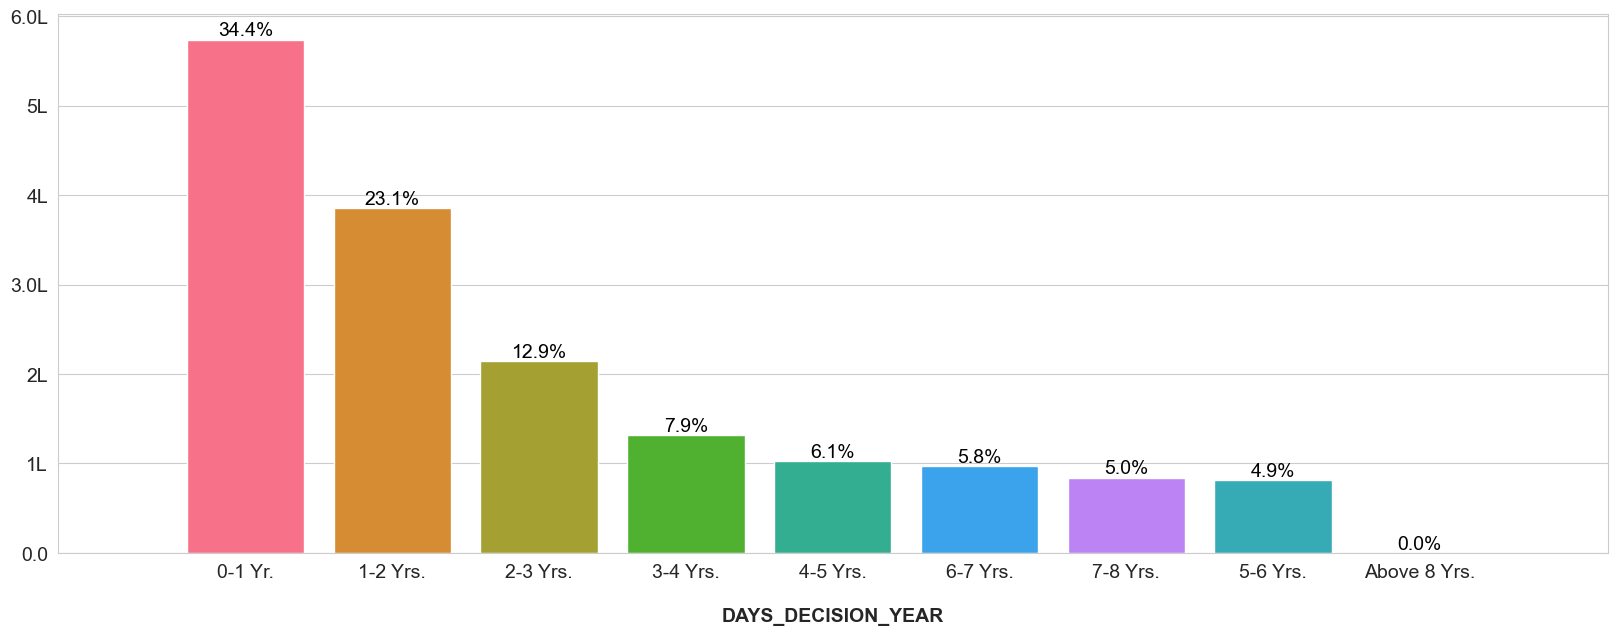

In [337]:
# Preparing Count Plot
prepare_count_plot(previous_application, 'DAYS_DECISION_YEAR')

**<u>Observation #3</u>**

Almost 34% of loan applicants have applied for a new loan in less than a year. In fact, almost 70% of loan applicants have applied for a new loan in less than 3 years of their previous application.

## 3.3. Data Type conversion
___
___

### 3.3.1. Application Data
___

Checking the column types

In [338]:
# Getting application_data column types and value details
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

**<u>Observation #1</u>**

Numeric columns are in correct format i.e. int64/float64. Will need to check non-numerical columns

#### A. Converting Objects to Categorical columns

In [339]:
# Selecting columns of object dtype
application_data.select_dtypes('object')

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
307506         Cash loans           M            N               N   
307507         Cash loans           F            N               Y   
307508         Cash loans           F            N               Y   
307509         Cash loans           F            N               Y   
307510         Cash loans           F            N               N   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0        Unaccompanied               Working  Secondary / secondary special   
1               Family         State servant               Higher education   
2        Unaccompanied               Working  Secondary / secondary special   
3        Unaccompanied               Working  Secondary / secondary special   
4        Unaccompanied               Working  Secondary / secondary special   
...                ...                   ...                            ...   
307506   Unaccompanied               Working  Secondary / secondary special   
307507   Unaccompanied             Pensioner  Secondary / secondary special   
307508   Unaccompanied               Working               Higher education   
307509   Unaccompanied  Commercial associate  Secondary / secondary special   
307510   Unaccompanied  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
0       Single / not married  House / apartment        Laborers   
1                    Married  House / apartment      Core staff   
2       Single / not married  House / apartment        Laborers   
3             Civil marriage  House / apartment        Laborers   
4       Single / not married  House / apartment      Core staff   
...                      ...                ...             ...   
307506             Separated       With parents     Sales staff   
307507                 Widow  House / apartment         Unknown   
307508             Separated  House / apartment        Managers   
307509               Married  House / apartment        Laborers   
307510               Married  House / apartment        Laborers   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  
0                       WEDNESDAY  Business Entity Type 3  
1                          MONDAY                  School  
2                          MONDAY              Government  
3                       WEDNESDAY  Business Entity Type 3  
4                        THURSDAY                Religion  
...                           ...                     ...  
307506                   THURSDAY                Services  
307507                     MONDAY                     XNA  
307508                   THURSDAY                  School  
307509                  WEDNESDAY  Business Entity Type 1  
307510                   THURSDAY  Business Entity Type 3  

[307511 rows x 12 columns]

In [340]:
# Getting the object type columns to a list
object_type_columns = application_data.select_dtypes('object').columns
object_type_columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

Converting object to categorical

In [341]:
for col in object_type_columns:
    application_data[col] = pd.Categorical(application_data[col])

#### B. Converting Numerical to Categorical columns

In [342]:
numeric_columns = ['WEEKDAY_APPR_PROCESS_START', 'LIVE_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
                     'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']

Converting few numerical columns to categorical

In [343]:
for col in numeric_columns:
    application_data[col] = pd.Categorical(application_data[col])

Re-checking the column types

In [344]:
# Getting the dataframe column type and value details
application_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 79 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

### 3.3.2. Previous Application Data
___

#### A. Converting Objects to Categorical columns

In [345]:
# Getting columns with dtype=object
previous_application.select_dtypes('object')

NAME_CONTRACT_TYPE WEEKDAY_APPR_PROCESS_START  \
0           Consumer loans                   SATURDAY   
1               Cash loans                   THURSDAY   
2               Cash loans                    TUESDAY   
3               Cash loans                     MONDAY   
4               Cash loans                   THURSDAY   
...                    ...                        ...   
1670209     Consumer loans                  WEDNESDAY   
1670210     Consumer loans                    TUESDAY   
1670211     Consumer loans                     MONDAY   
1670212         Cash loans                  WEDNESDAY   
1670213         Cash loans                     SUNDAY   

        FLAG_LAST_APPL_PER_CONTRACT NAME_CASH_LOAN_PURPOSE  \
0                                 Y                    XAP   
1                                 Y                    XNA   
2                                 Y                    XNA   
3                                 Y                    XNA   
4                                 Y                Repairs   
...                             ...                    ...   
1670209                           Y                    XAP   
1670210                           Y                    XAP   
1670211                           Y                    XAP   
1670212                           Y                    XNA   
1670213                           Y                    XNA   

        NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE CODE_REJECT_REASON  \
0                   Approved  Cash through the bank                XAP   
1                   Approved                    XNA                XAP   
2                   Approved  Cash through the bank                XAP   
3                   Approved  Cash through the bank                XAP   
4                    Refused  Cash through the bank                 HC   
...                      ...                    ...                ...   
1670209             Approved  Cash through the bank                XAP   
1670210             Approved  Cash through the bank                XAP   
1670211             Approved  Cash through the bank                XAP   
1670212             Approved  Cash through the bank                XAP   
1670213             Approved  Cash through the bank                XAP   

        NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0               Repeater                Mobile            POS   
1               Repeater                   XNA           Cash   
2               Repeater                   XNA           Cash   
3               Repeater                   XNA           Cash   
4               Repeater                   XNA           Cash   
...                  ...                   ...            ...   
1670209        Refreshed             Furniture            POS   
1670210              New             Furniture            POS   
1670211         Repeater  Consumer Electronics            POS   
1670212         Repeater                   XNA           Cash   
1670213         Repeater                   XNA           Cash   

        NAME_PRODUCT_TYPE             CHANNEL_TYPE  NAME_SELLER_INDUSTRY  \
0                     XNA             Country-wide          Connectivity   
1                  x-sell           Contact center                   XNA   
2                  x-sell  Credit and cash offices                   XNA   
3                  x-sell  Credit and cash offices                   XNA   
4                 walk-in  Credit and cash offices                   XNA   
...                   ...                      ...                   ...   
1670209               XNA                    Stone             Furniture   
1670210               XNA                    Stone             Furniture   
1670211               XNA             Country-wide  Consumer electronics   
1670212            x-sell          AP+ (Cash loan)                   XNA   
1670213            x-sell          AP+ (Cash loan)                   XNA

In [346]:
# Getting the columns of object dtype
object_type_columns = previous_application.select_dtypes('object').columns
object_type_columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

Converting object to categorical

In [347]:
for col in object_type_columns:
    previous_application[col] = pd.Categorical(previous_application[col])

Checking the datatypes of remaining columns

In [348]:
# Getting the dataframe column type and value details
previous_application.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 27 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_PREV                   1670214 non-null  int64   
 1   SK_ID_CURR                   1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE           1670214 non-null  category
 3   AMT_ANNUITY                  1670214 non-null  float64 
 4   AMT_APPLICATION              1670214 non-null  float64 
 5   AMT_CREDIT                   1670213 non-null  float64 
 6   AMT_GOODS_PRICE              1670214 non-null  float64 
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  category
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64   
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  category
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64   
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  category
 12  NAME_CONTRACT_STATUS        

## 3.4. Outlier correction
___
___

### 3.4.1. Application Data
___

Identifying outliers

In [349]:
# Getting analytics (only mean and median) of numerical columns in application_data and rounding decimals to 2 digits
round(application_data.describe().loc[['mean', '50%']], 2)

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
mean   278180.52    0.08          0.42              1.69        5.99   
50%    278202.00    0.00          0.00              1.47        5.14   

      AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
mean     27108.57        538396.21                        0.02     16037.0   
50%      24903.00        450000.00                        0.02     15750.0   

      DAYS_EMPLOYED  ...  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
mean       67724.74  ...               0.0               0.0   
50%         2219.00  ...               0.0               0.0   

      AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
mean                        0.01                       0.01   
50%                         0.00                       0.00   

      AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
mean                        0.03                       0.23   
50%                         0.00                       0.00   

      AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR    AGE  \
mean                       0.23                        1.64  43.44   
50%                        0.00                        1.00  43.00   

      YEARS_EMPLOYED  
mean          185.02  
50%             6.00  

[2 rows x 56 columns]

Since, there are 56 numerical columns. As such it would be cumbersome to plot boxplot for each column. With that said, usually, when there's a considerable difference between the mean and median values, then there are good chances that it contains outliers. However, we will ignore columns which are of the least importance to us.

In [350]:
columns_to_check = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'YEARS_EMPLOYED']

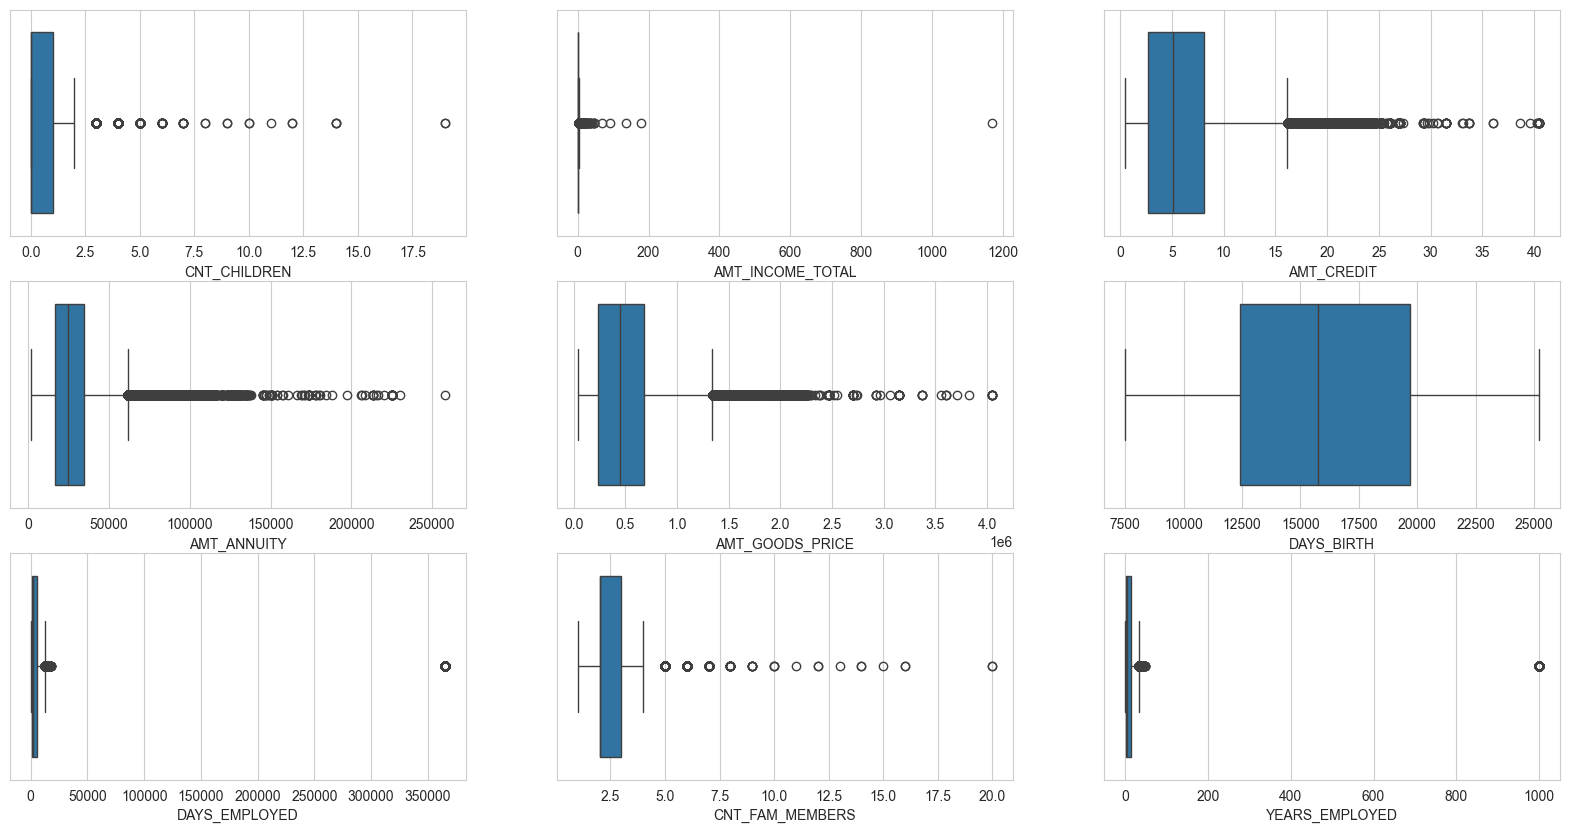

In [351]:
# Creating a box plot for each column name in columns_to_check
plt.figure(figsize=(20, 10))

for i in enumerate(application_data[columns_to_check].columns):
    plt.subplot(3, 3, i[0]+1)
    sns.boxplot(data=application_data, x=i[1])

plt.show()

**<u>Observation #1</u>**

- The data has some incorrect entries in DAYS_EMPLOYED and YEARS_EMPLOYED, which show outlier values of around 350000 days (1000 years).
- AMT_INCOME_TOTAL has a large number of outliers, indicating that some loan applicants have much higher income than others.
- AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE, CNT_CHILDREN and CNT_FAM_MEMBERS also have some outliers, but they are less extreme.
- DAYS_BIRTH has no outliers, suggesting that the data is reliable for this variable.

In [352]:
# Getting analytics of numerical columns in application_data and rounding decimals to 2 digits
round(application_data[columns_to_check].describe(), 2)

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
count     307511.00         307511.00   307511.00    307499.00   
mean           0.42              1.69        5.99     27108.57   
std            0.72              2.37        4.02     14493.74   
min            0.00              0.26        0.45      1615.50   
25%            0.00              1.12        2.70     16524.00   
50%            0.00              1.47        5.14     24903.00   
75%            1.00              2.02        8.09     34596.00   
max           19.00           1170.00       40.50    258025.50   

       AMT_GOODS_PRICE  DAYS_BIRTH  DAYS_EMPLOYED  CNT_FAM_MEMBERS  \
count        307233.00   307511.00      307511.00        307509.00   
mean         538396.21    16037.00       67724.74             2.15   
std          369446.46     4363.99      139443.75             0.91   
min           40500.00     7489.00           0.00             1.00   
25%          238500.00    12413.00         933.00             2.00   
50%          450000.00    15750.00        2219.00             2.00   
75%          679500.00    19682.00        5707.00             3.00   
max         4050000.00    25229.00      365243.00            20.00   

       YEARS_EMPLOYED  
count       307511.00  
mean           185.02  
std            381.97  
min              0.00  
25%              2.00  
50%              6.00  
75%             15.00  
max           1000.00

### 3.4.2. Previous Application Data

Identifying outliers

In [353]:
# Getting analytics of numerical columns (only mean and median) in previous_application and rounding decimals to 2 digits
round(previous_application.describe().loc[['mean', '50%']], 2)

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
mean  1923089.14   278357.17     14906.51        175233.86   196114.02   
50%   1923110.50   278714.50     11250.00         71046.00    80541.00   

      AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  \
mean        185642.89                    12.48                     1.0   
50%          71050.50                    12.00                     1.0   

      DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  
mean         880.68            313.95        12.48  
50%          581.00              3.00        10.00

Similar to Application data we will pick relevant columns to check for outliers.

In [354]:
columns_to_check = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT']

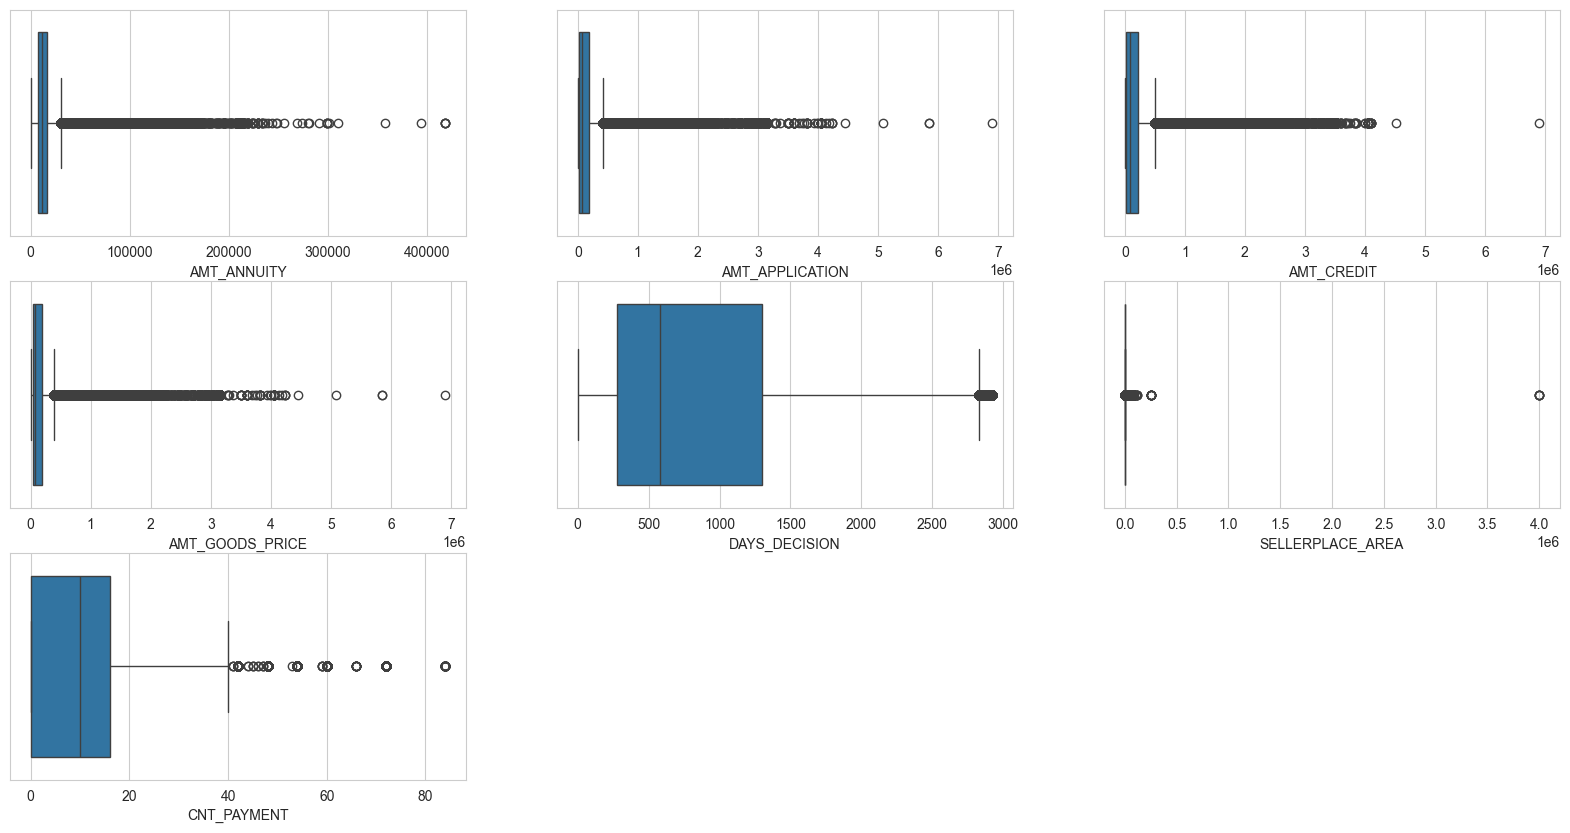

In [355]:
# Creating a box plot for each column name in columns_to_check
plt.figure(figsize=(20, 10))

for i in enumerate(previous_application[columns_to_check].columns):
    plt.subplot(3, 3, i[0]+1)
    sns.boxplot(data=previous_application, x=i[1])

plt.show()

**<u>Observation #1</u>**

- AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE and SELLERPLACE_AREA have many outliers.
- CNT_PAYMENT and DAYS_DECISION have comparatively lesser outliers.

In [356]:
# Getting analytics of numerical columns in previous_application and rounding decimals to 2 digits
round(previous_application[columns_to_check].describe(), 2)

AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
count   1670214.00       1670214.00  1670213.00       1670214.00   
mean      14906.51        175233.86   196114.02        185642.89   
std       13177.51        292779.76   318574.62        287141.32   
min           0.00             0.00        0.00             0.00   
25%        7547.10         18720.00    24160.50         45000.00   
50%       11250.00         71046.00    80541.00         71050.50   
75%       16824.03        180360.00   216418.50        180405.00   
max      418058.14       6905160.00  6905160.00       6905160.00   

       DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  
count     1670214.00        1670214.00   1670214.00  
mean          880.68            313.95        12.48  
std           779.10           7127.44        14.48  
min             1.00             -1.00         0.00  
25%           280.00             -1.00         0.00  
50%           581.00              3.00        10.00  
75%          1300.00             82.00        16.00  
max          2922.00        4000000.00        84.00

# 4. Analysis
___
___
___

## 4.1. Imbalance Analysis
___
___

### 4.1.1. TARGET
___

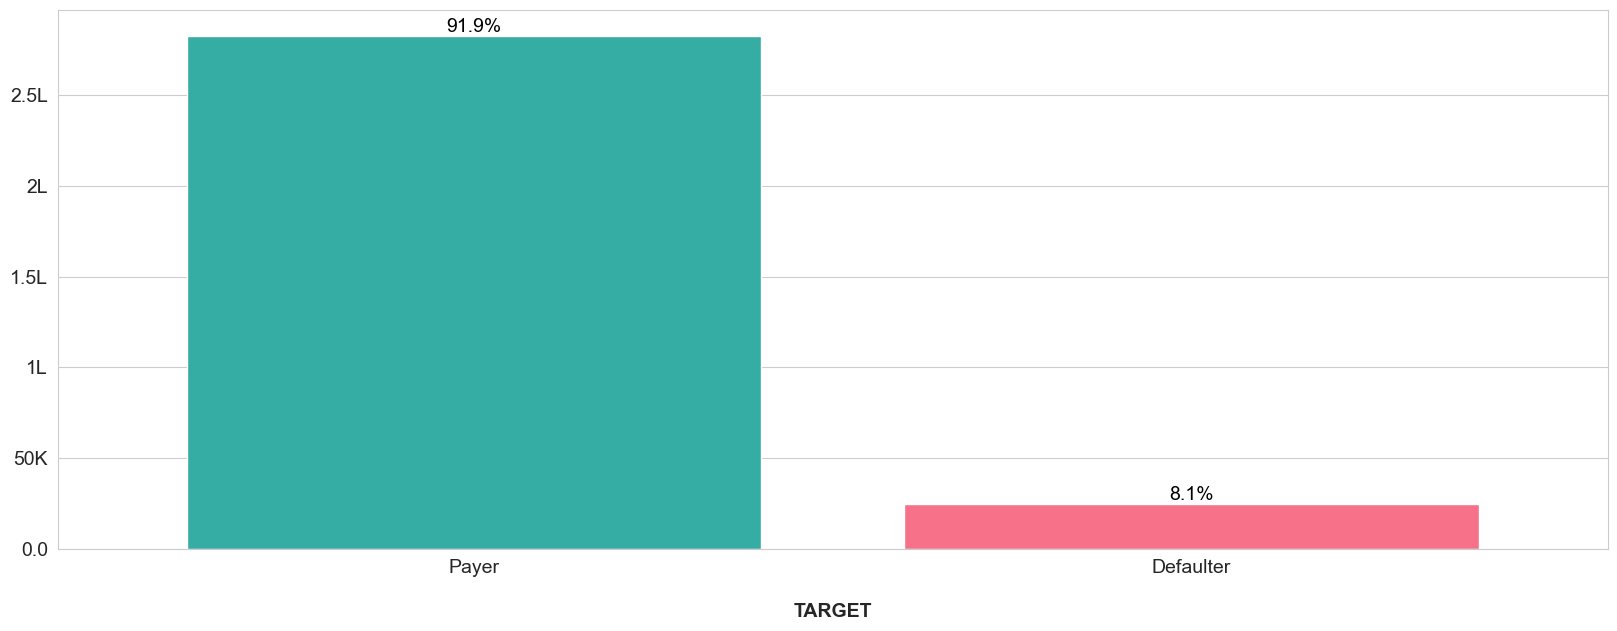

In [357]:
# Preparing Count Plot
prepare_count_plot(application_data[['TARGET']].replace(0, 'Payer').replace(1, 'Defaulter'), 'TARGET')

Dividing the original dataset into two different datasets depending upon the target value

In [358]:
target_0 = application_data[application_data.TARGET == 0]
target_1 = application_data[application_data.TARGET == 1]

Get shape of each target dataframe

In [359]:
# Dataframe for Records with Target Variable as 0
target_0.shape

(282686, 79)

In [360]:
# Dataframe for Records with Target Variable as 1
target_1.shape

(24825, 79)

#### A. Imbalance Ratios

In [361]:
target_0_per = round(target_0.shape[0]/(target_0.shape[0]+target_1.shape[0])*100,2)
target_0_per

91.93

In [362]:
target_1_per = round(target_1.shape[0]/(target_0.shape[0]+target_1.shape[0])*100,2)
target_1_per

8.07

In [363]:
print(f'Ratio of imbalance between Payer and Defaulter is approx. {round(target_0_per/target_1_per, 2)}:1')

Ratio of imbalance between Payer and Defaulter is approx. 11.39:1


Ratio of imbalance between Payer and Defaulter is approx. **11.39:1**

## 4.2. Categorical Variable Analysis
___
___

### 4.2.1. Segmented Univariate Analysis
___

#### A. NAME_CONTRACT_TYPE

Distribution between Contract Type of Loan - Revolving or Cash Loans

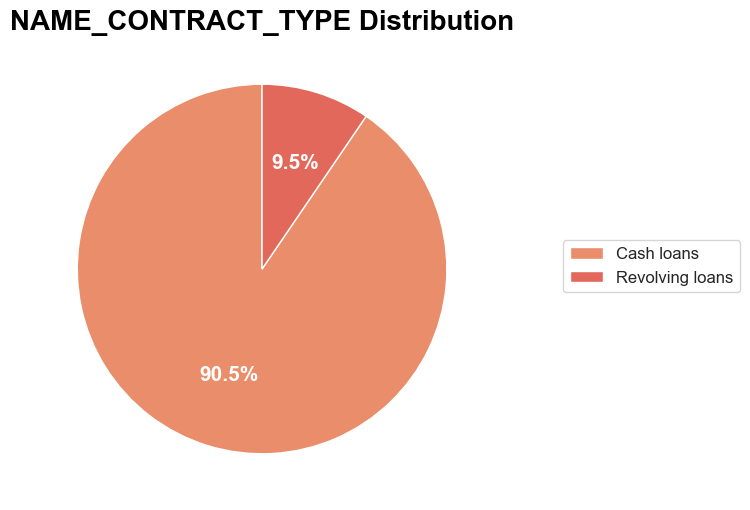

In [364]:
# Create Pie Plot
create_pie_plot(application_data, 'NAME_CONTRACT_TYPE')

Checking the contract type based on loan repayment status


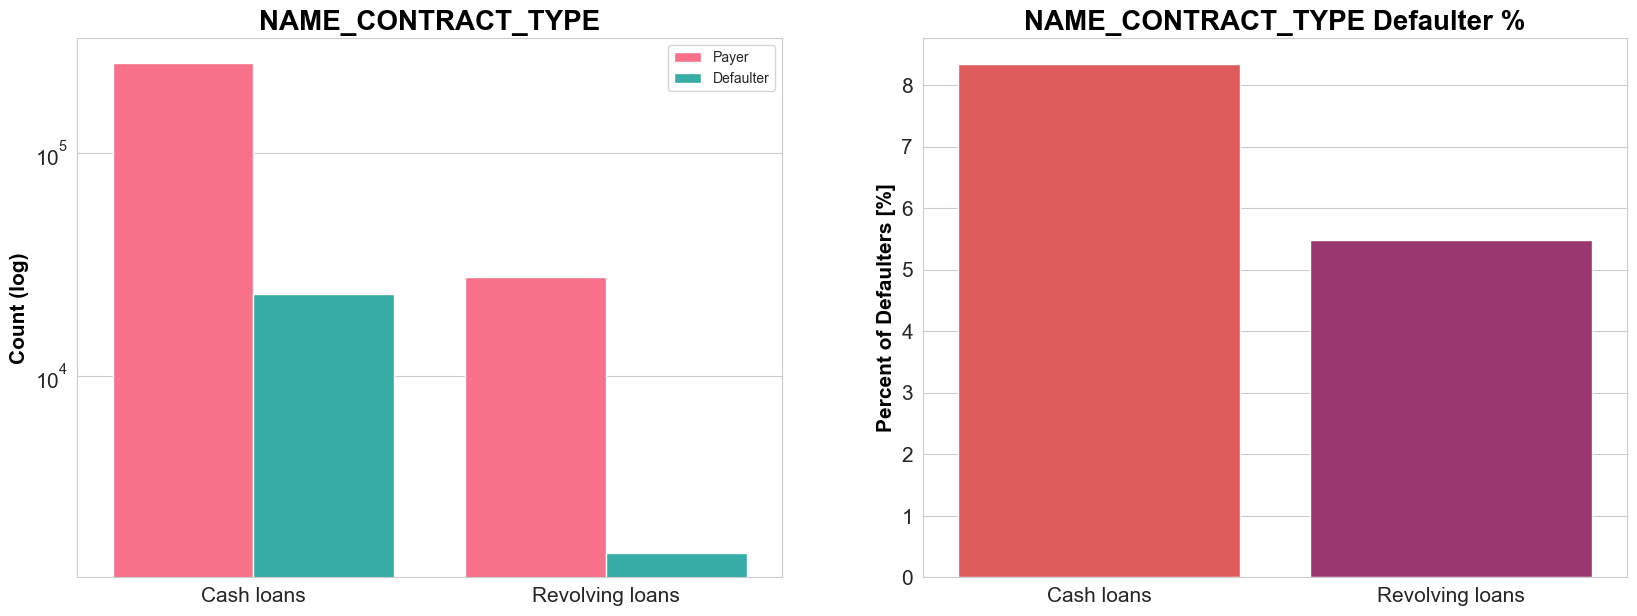

In [365]:
# Create countpplots
univariate_categorical('NAME_CONTRACT_TYPE', True)

**<u>Observation #1</u>**

Despite Revolving Loans constituting only 10% of the total number of loans, the majority of revolving loans have been defaulted.

#### B. CODE_GENDER

Distribution of the basis of Gender

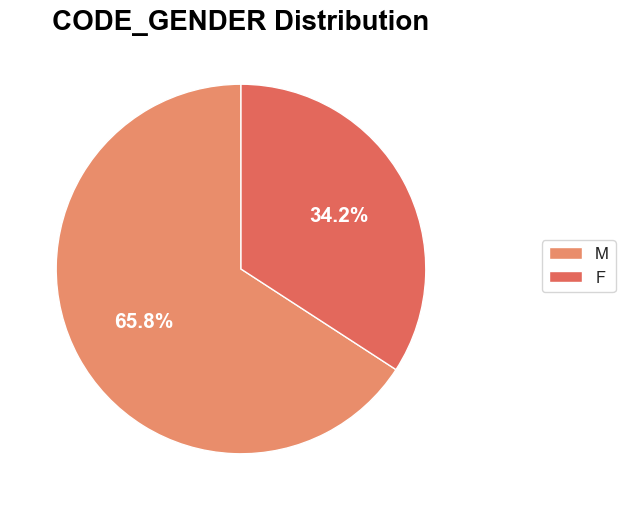

In [366]:
# Create Pie plots
create_pie_plot(application_data, 'CODE_GENDER')

Checking the distribution of Loan repayment status with respect to Gender

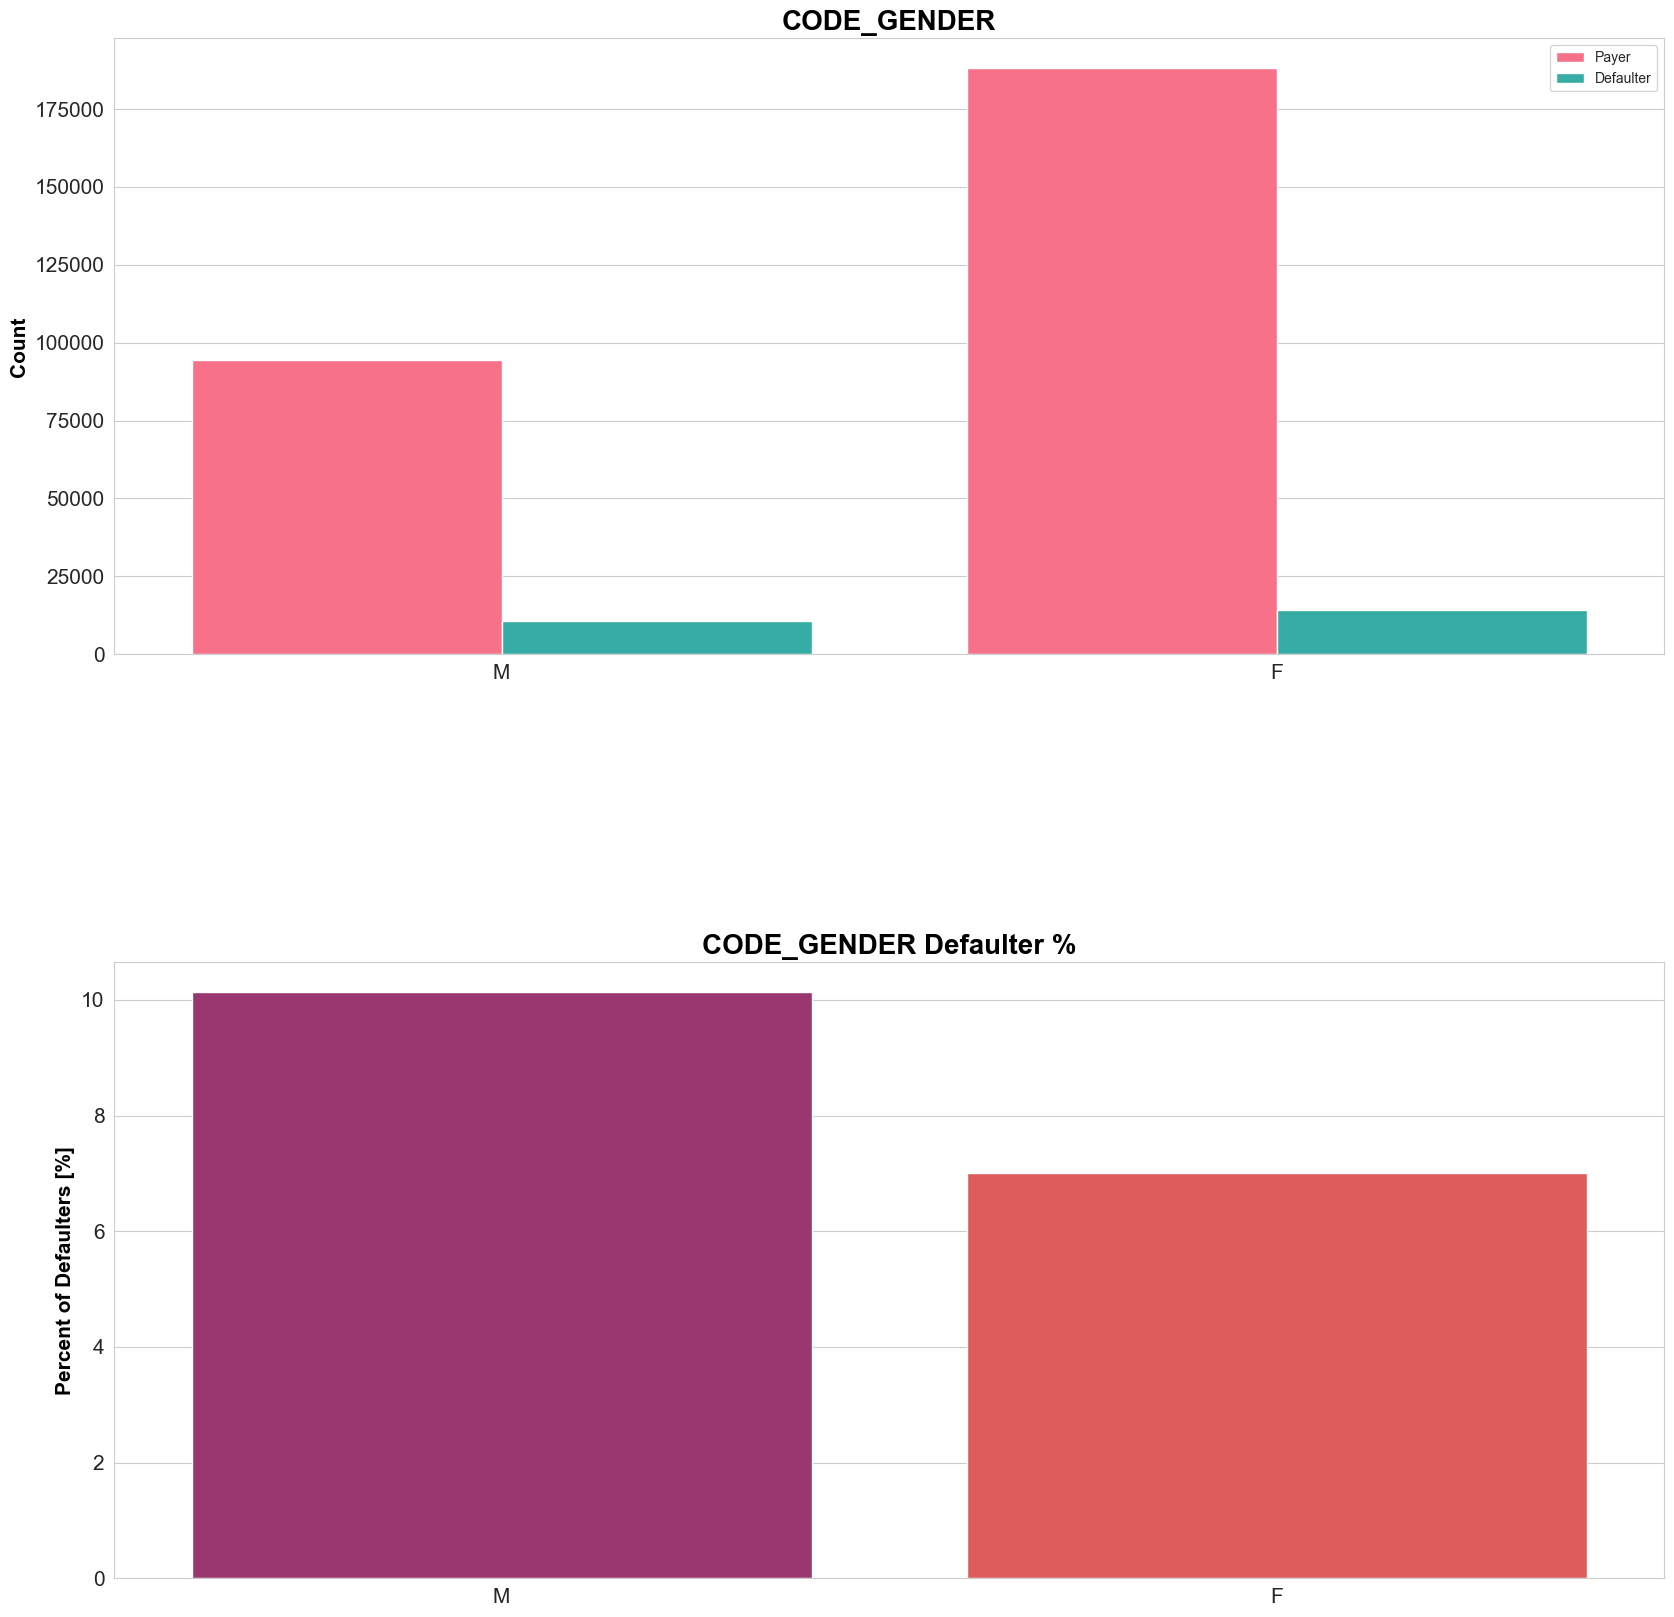

In [367]:
# Create count plots
univariate_categorical('CODE_GENDER', horizontal_layout=False)

**<u>Observation #2</u>**

Female clients are almost twice than that of Males. Further, the proportion of Male defaulters are higher as compared to Females i.e. Males have a higher chance of not returning their loans as compared to Females. Females and Males have a defaulter rate of approximately 7% and 10% respectively.

#### C. FLAG_OWN_CAR

Distribution of People owning a car v/s Not

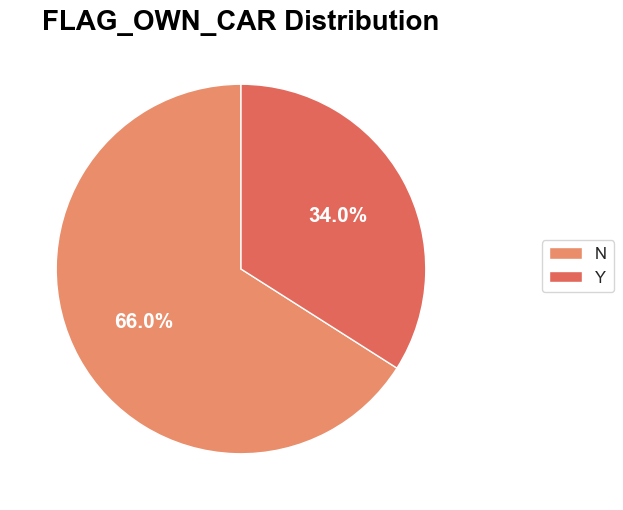

In [368]:
# Create Pie plot
create_pie_plot(application_data, 'FLAG_OWN_CAR')

Identifying relation between owning a car and loan repayment status

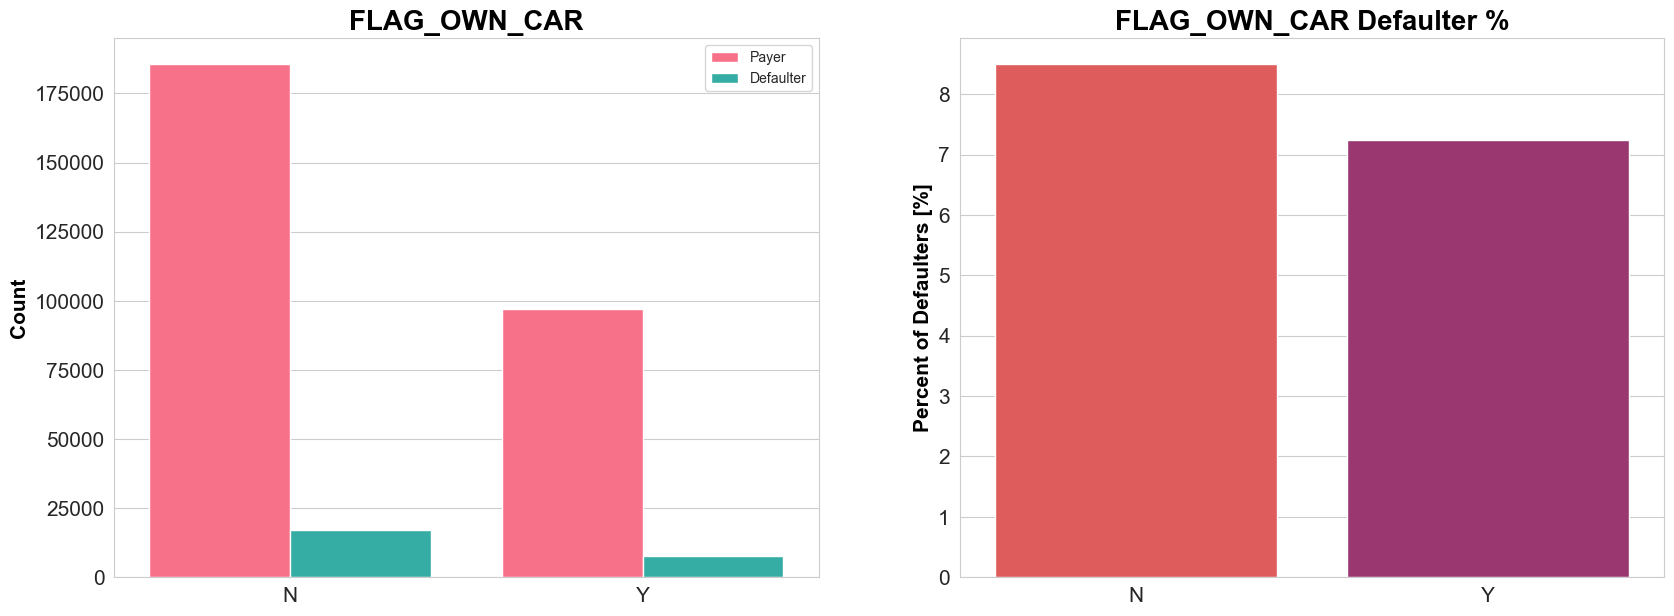

In [369]:
# Create count plots
univariate_categorical('FLAG_OWN_CAR')

**<u>Observation #3</u>**

Clients who don't own a car (66%) are almost twice than those who own a car (34%). There seem to be no relation in the ownership of a car with defaulting a loan as in both the case the difference is not considerable.

#### D. FLAG_OWN_REALTY

Distribution of People owning real-estate v/s not owning

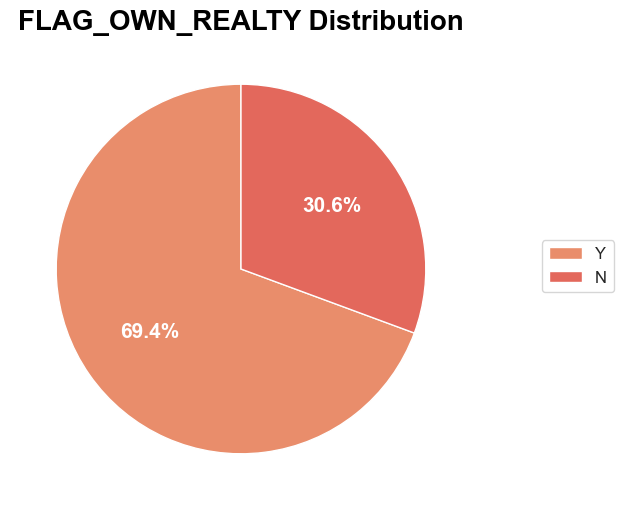

In [370]:
# Create Pie plot
create_pie_plot(application_data, 'FLAG_OWN_REALTY')

Identifying relation between owning a real estate and loan repayment status

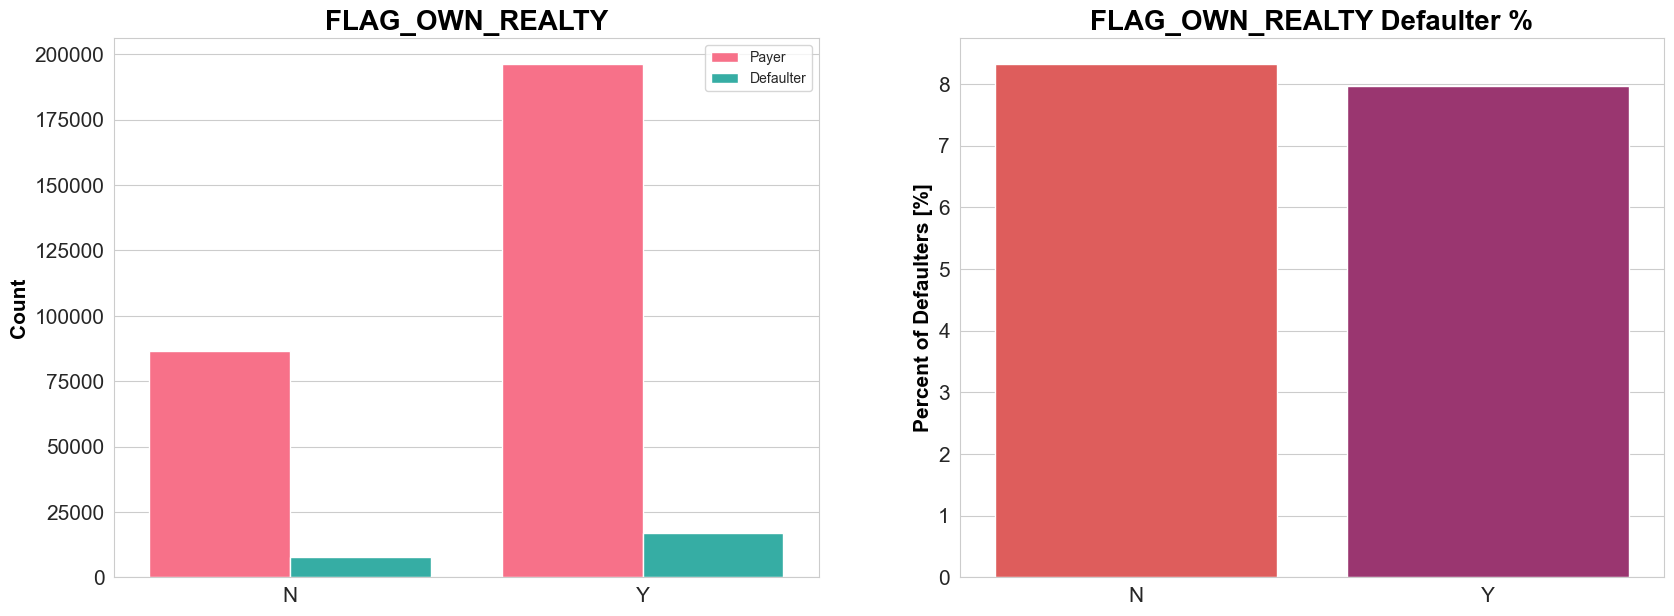

In [371]:
# Create sub plots
univariate_categorical('FLAG_OWN_REALTY')

**<u>Observation #4</u>**

Clients who own a real estate (69%) are more than twice than those who don't own a real estate (31%). With that said, there seem to be no relation in the ownership of a real estate with defaulting a loan as in both the case the difference is not considerable.

#### D. NAME_HOUSING_TYPE

Distribution of various housing types

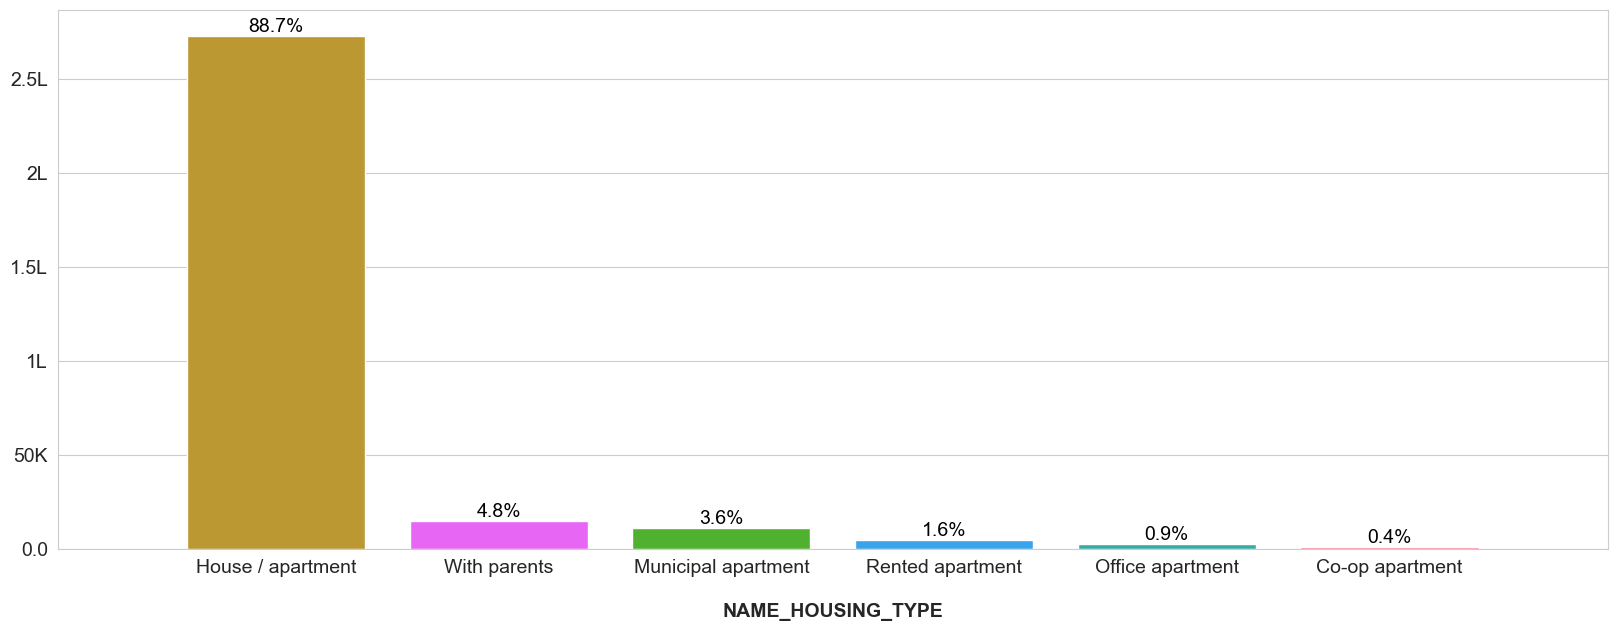

In [372]:
# Create count plot
prepare_count_plot(application_data, 'NAME_HOUSING_TYPE')

Identifying relation between various housing types and loan repayment status

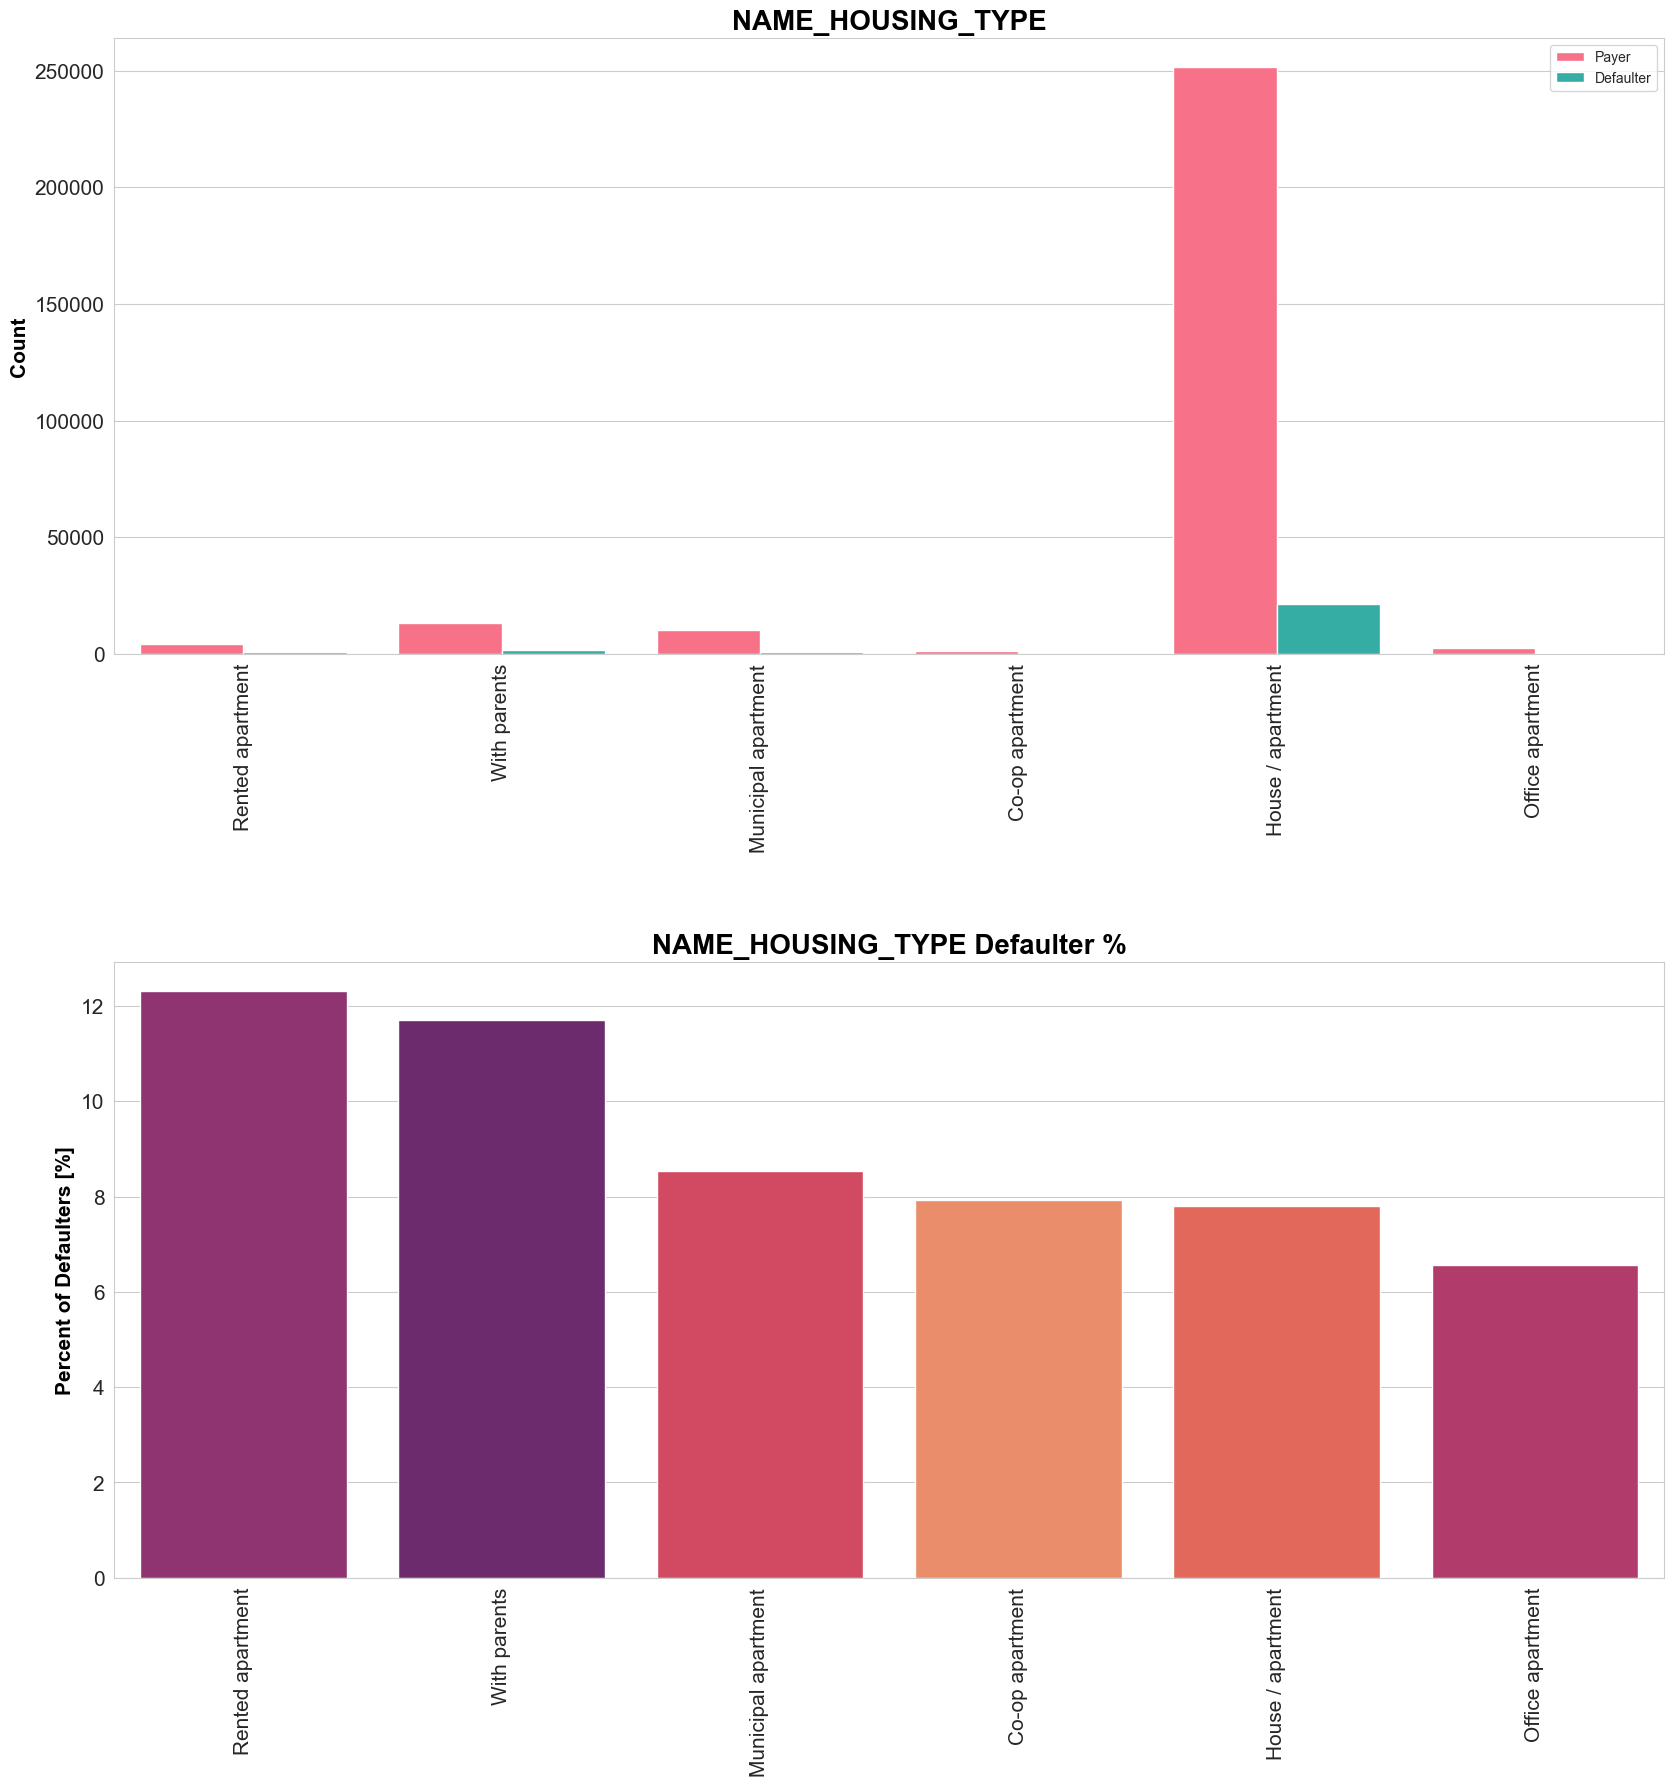

In [373]:
# Create count plots
univariate_categorical('NAME_HOUSING_TYPE', label_rotation=True, horizontal_layout=False)

**<u>Observation #5</u>**

- The most prevalent living arrangement is House/Apartment (88% of the borrowers).
- The living arrangement with the lowest default rate is Office Apartment (0.6%), followed by House/Apartment (7.9%).
- The living arrangement with the highest default rate is Rent or with Parents (12%).

#### E. NAME_FAMILY_STATUS

Distribution of various Family statuses

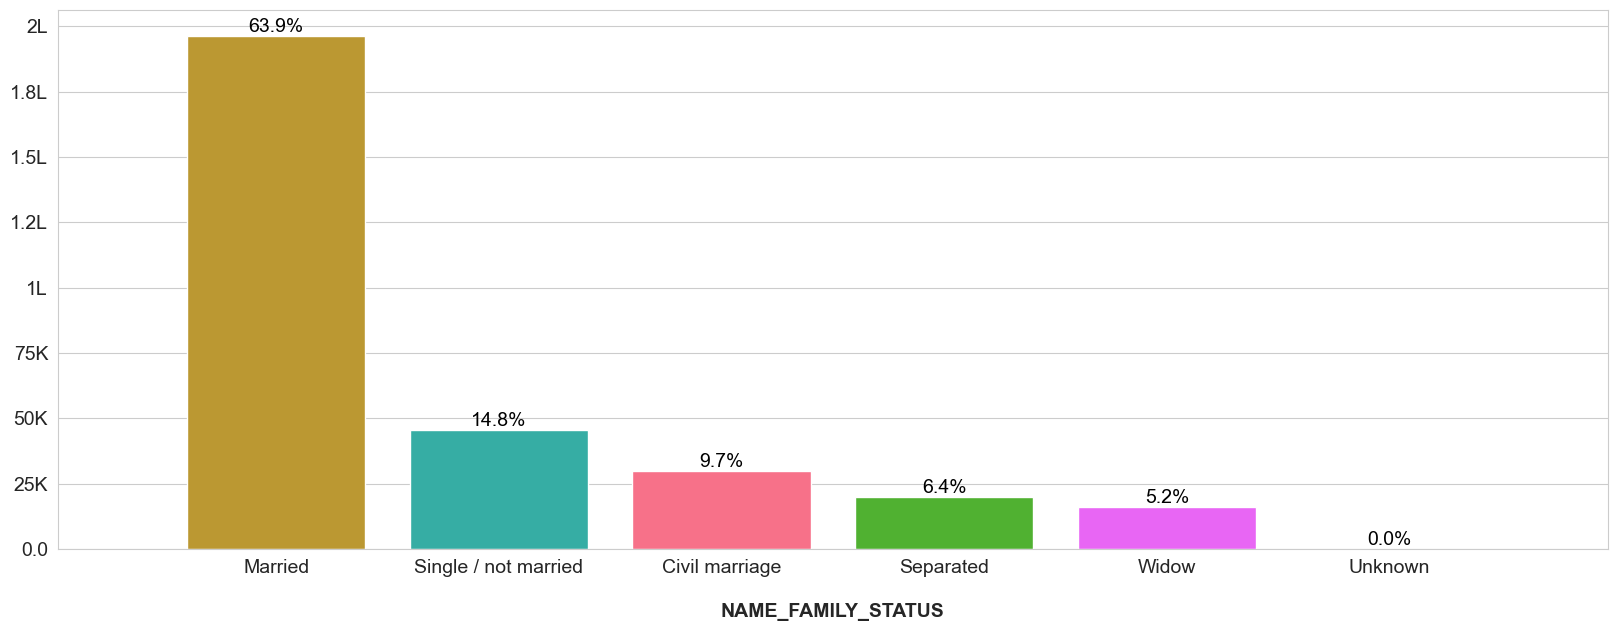

In [374]:
# Create count plot
prepare_count_plot(application_data, 'NAME_FAMILY_STATUS')

Identifying relation between various family statuses and loan repayment status

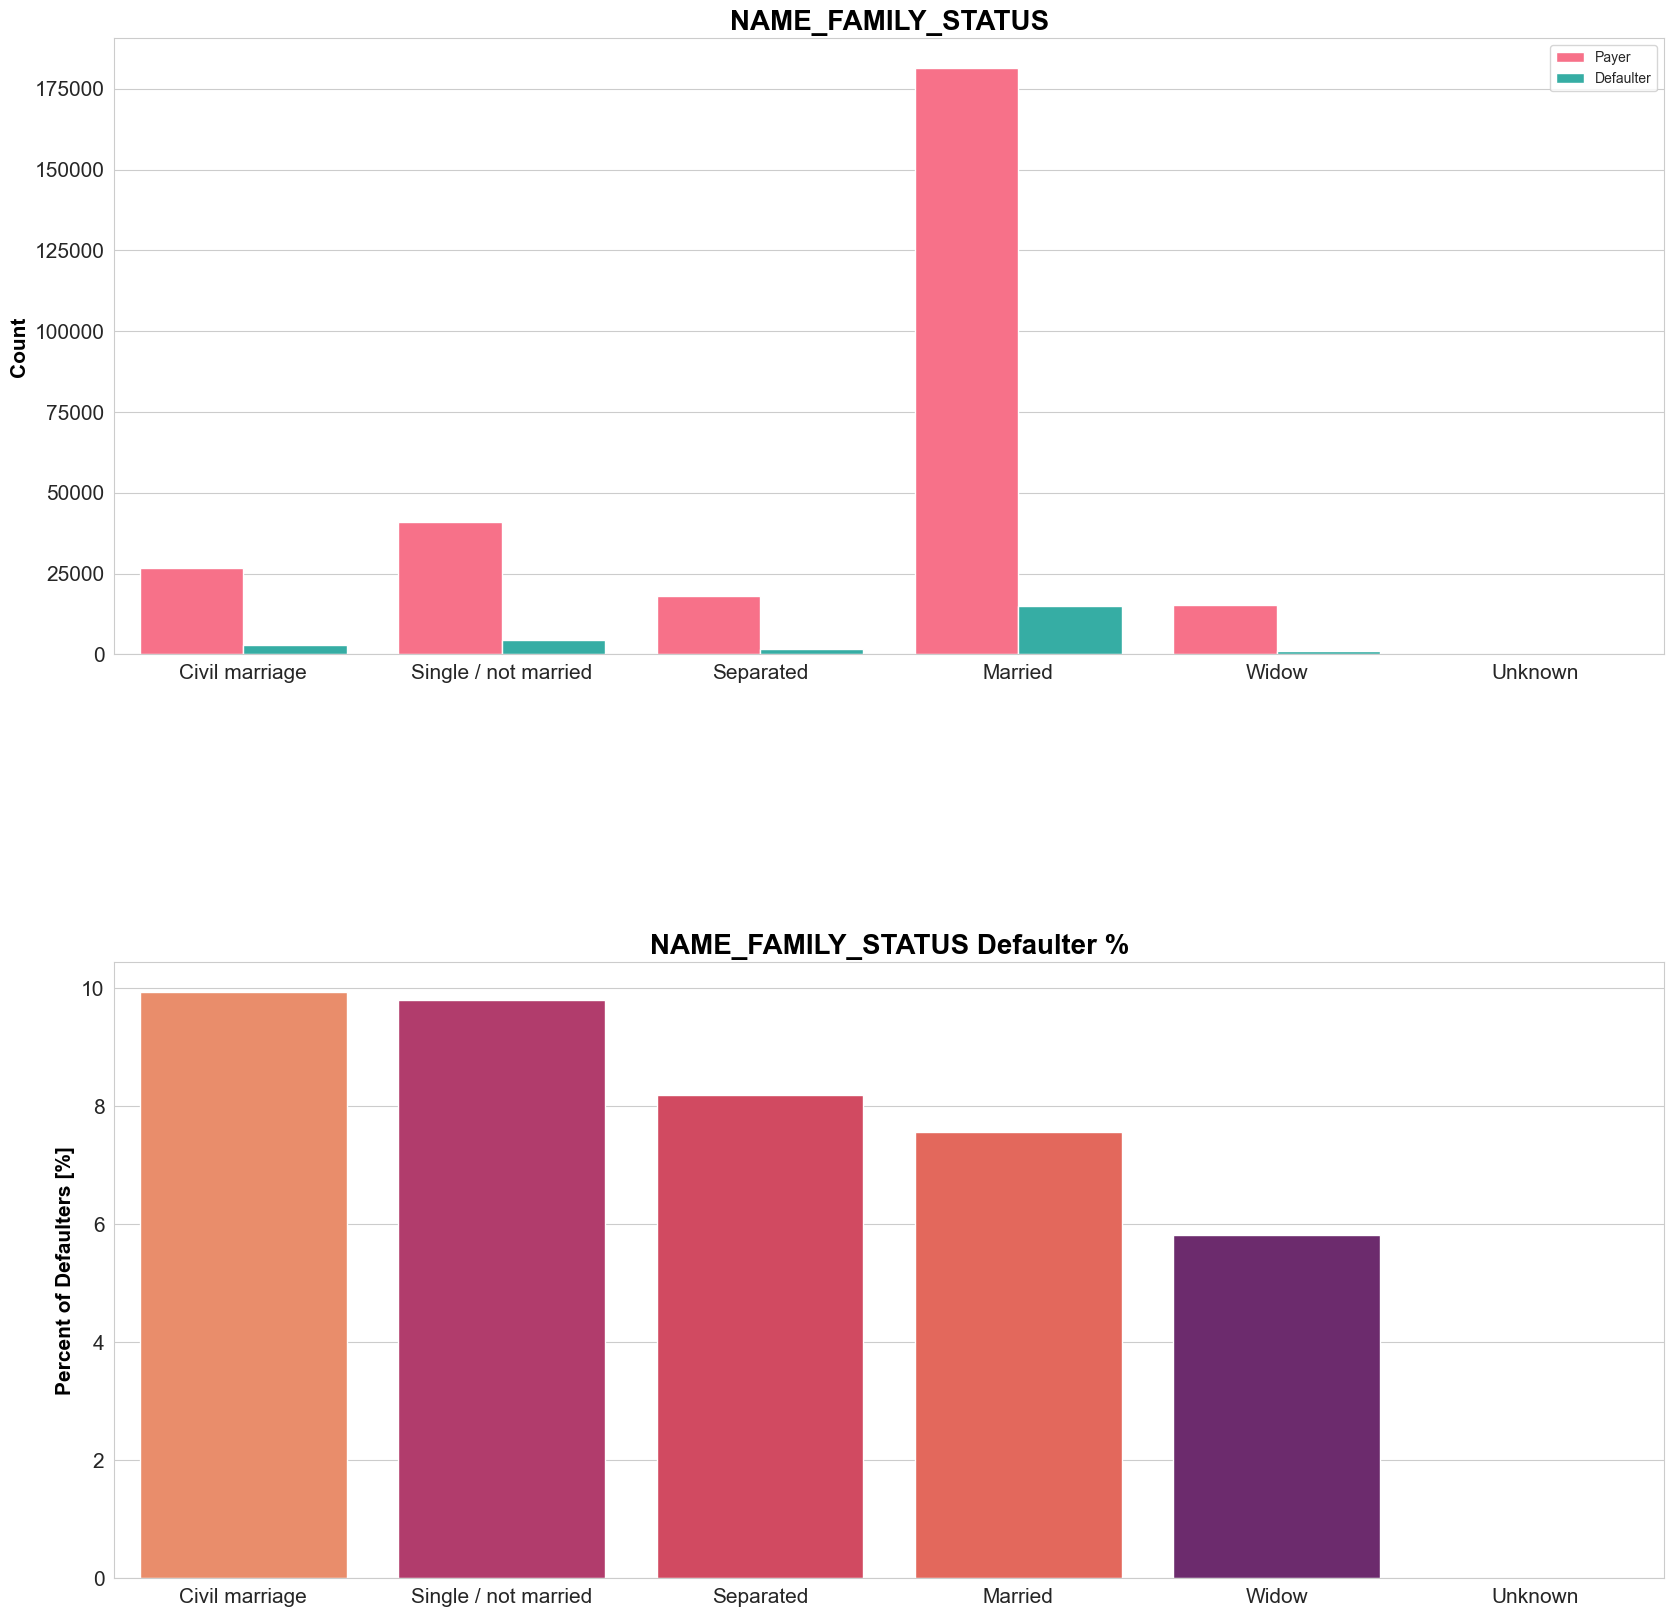

In [375]:
# Create count plot
univariate_categorical('NAME_FAMILY_STATUS', label_rotation=False, horizontal_layout=False)

**<u>Observation #6</u>**

- The majority of loan applicants are married (64%), followed by single (15%) and civil marriage (10%).
- Civil marriage applicants have the highest loan default rate (10%), followed by single applicants.
- Widowers have the lowest loan default rate, except for those with unknown family status.

#### F. NAME_EDUCATION_TYPE

Distribution of Highest Level of education achieved

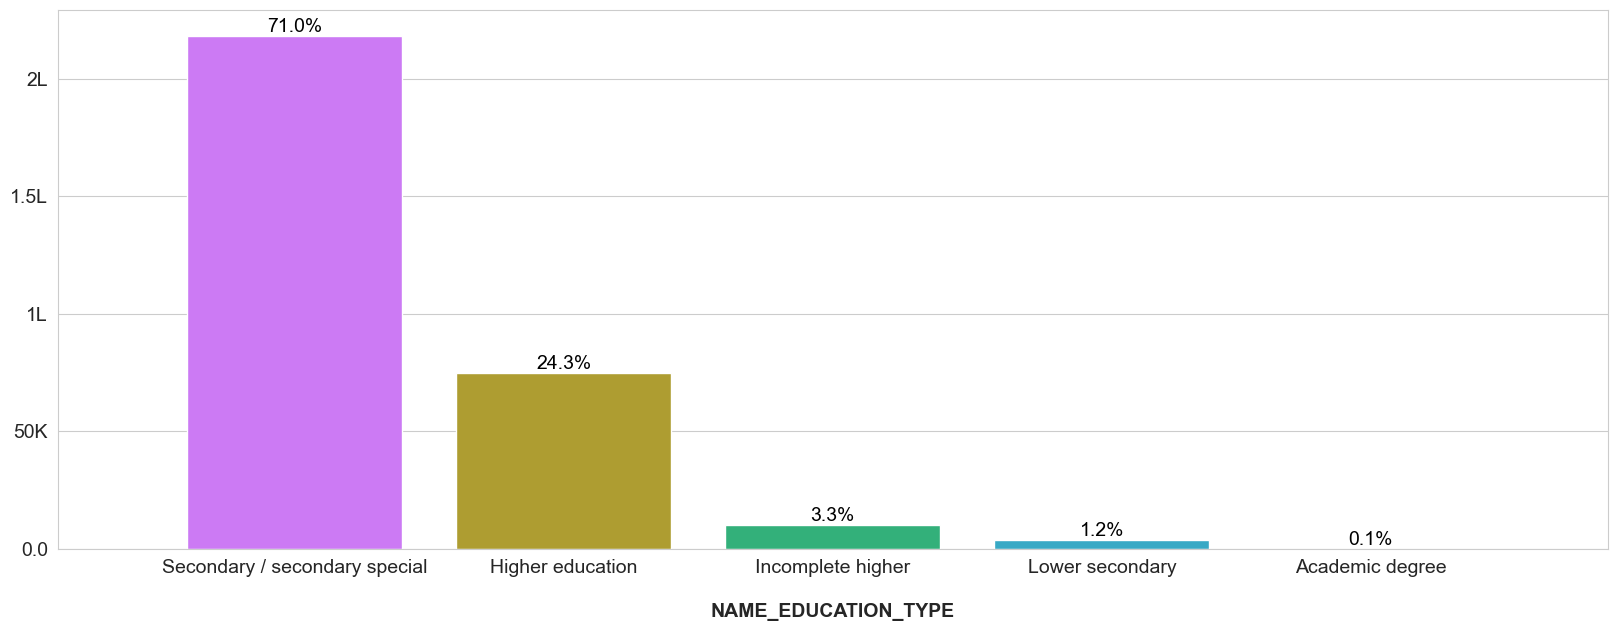

In [376]:
# Create count plot
prepare_count_plot(application_data, 'NAME_EDUCATION_TYPE')

Identifying relation between various Education degrees and loan repayment status

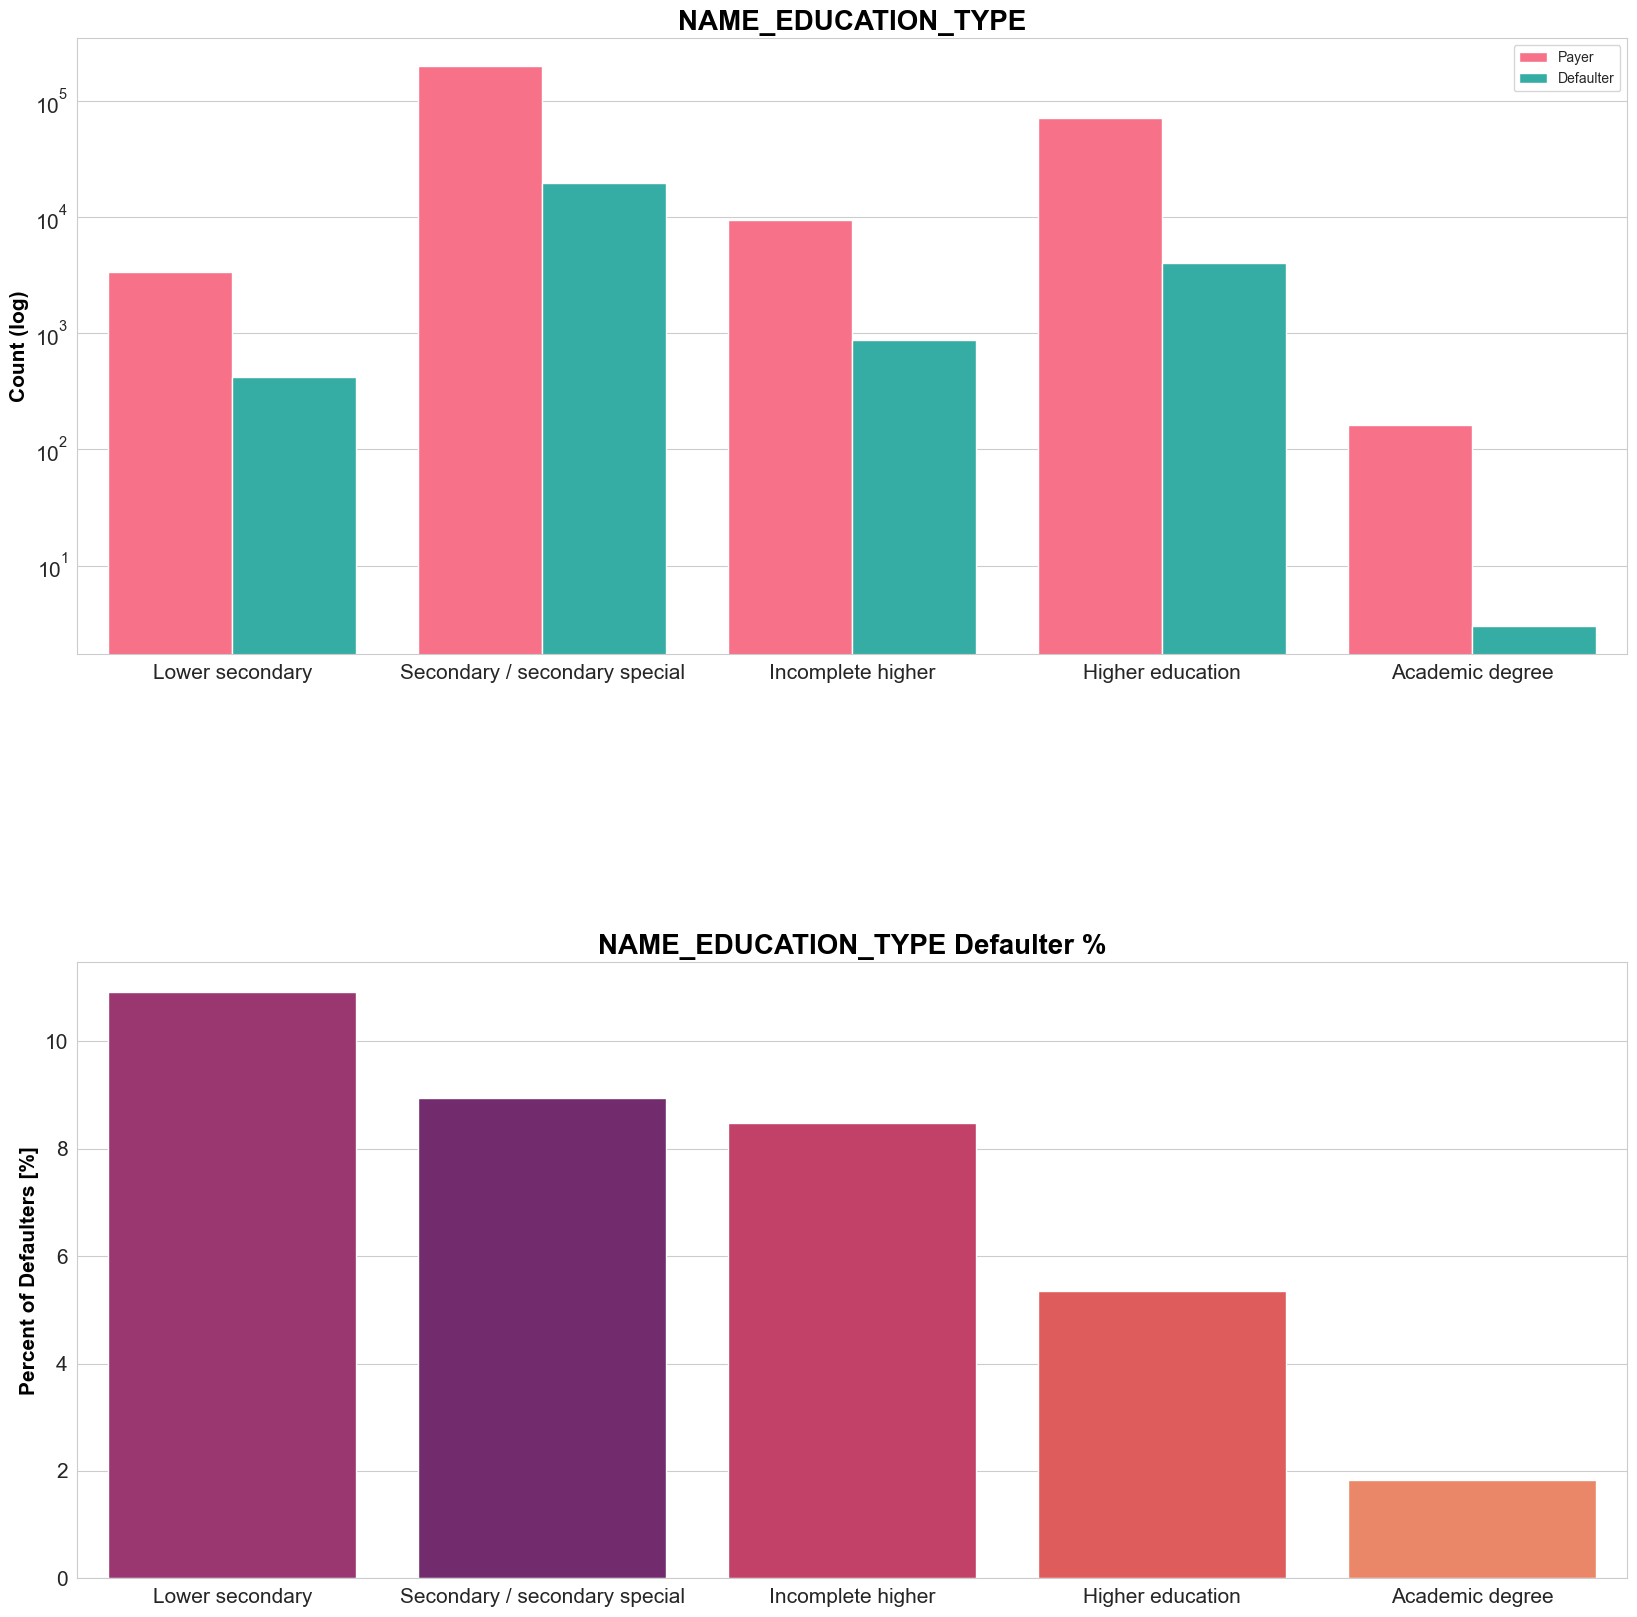

In [377]:
# Create count plots
univariate_categorical('NAME_EDUCATION_TYPE', ylog=True, label_rotation=False, horizontal_layout=False)

**<u>Observation #7</u>**

- Applicants with lower secondary or secondary education have the highest defaulting rate of approx. 11% and 9% respectively.
- Applicants with an academic degree have the lowest defaulting rate of less than 2% and the least loan amount of 0.1%.
- Applicants with higher education have a moderate defaulting rate of about 24.3% and a significant loan amount of 71%.

#### G. NAME_INCOME_TYPE

Distribution of Client's income types

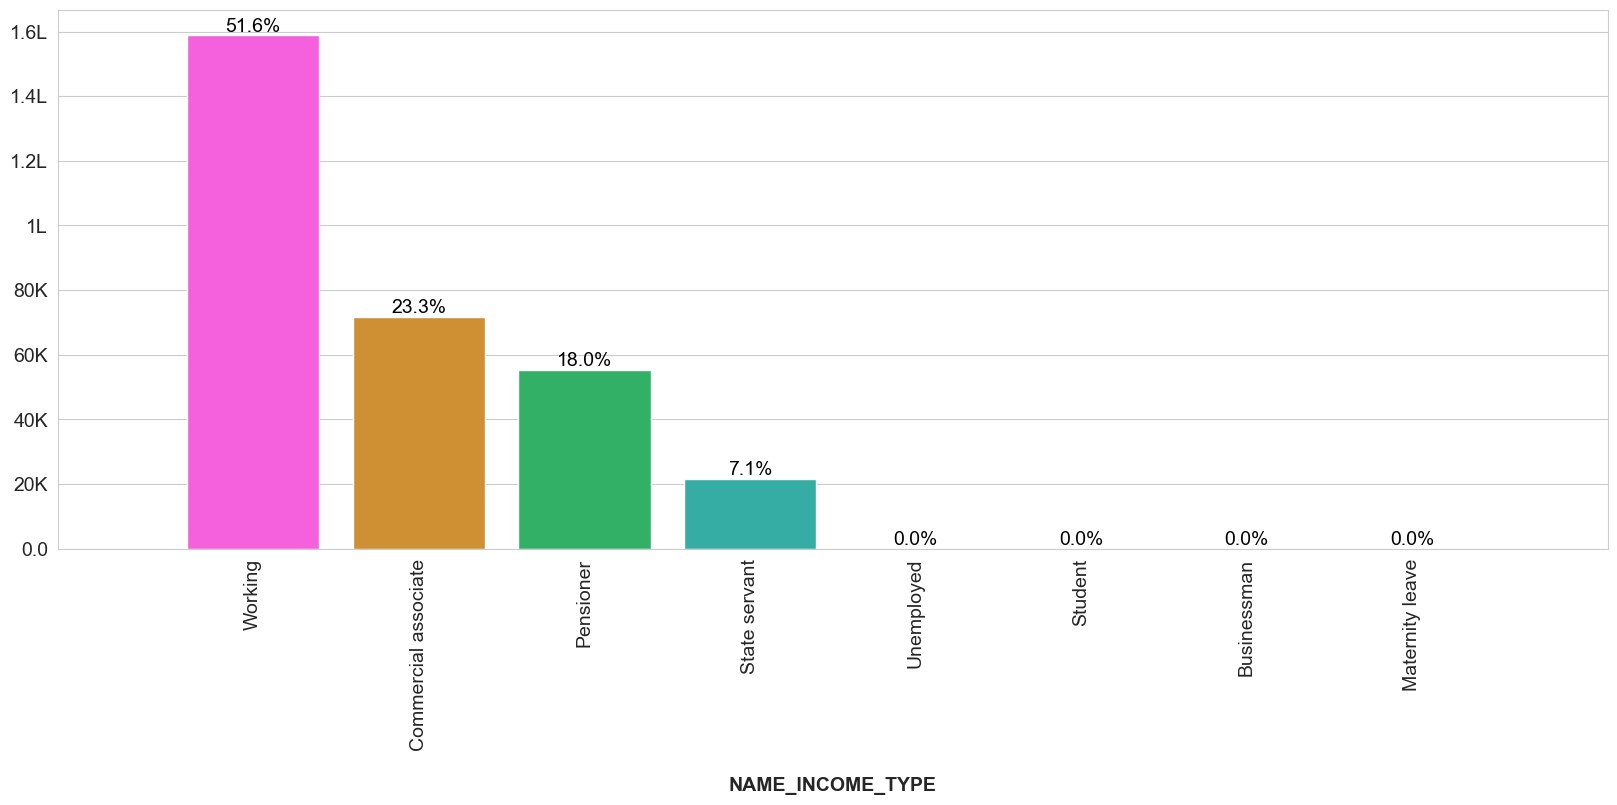

In [378]:
# Create count plot
prepare_count_plot(application_data, 'NAME_INCOME_TYPE', label_rotation=90)

Identifying relation between various Income statuses and loan repayment status

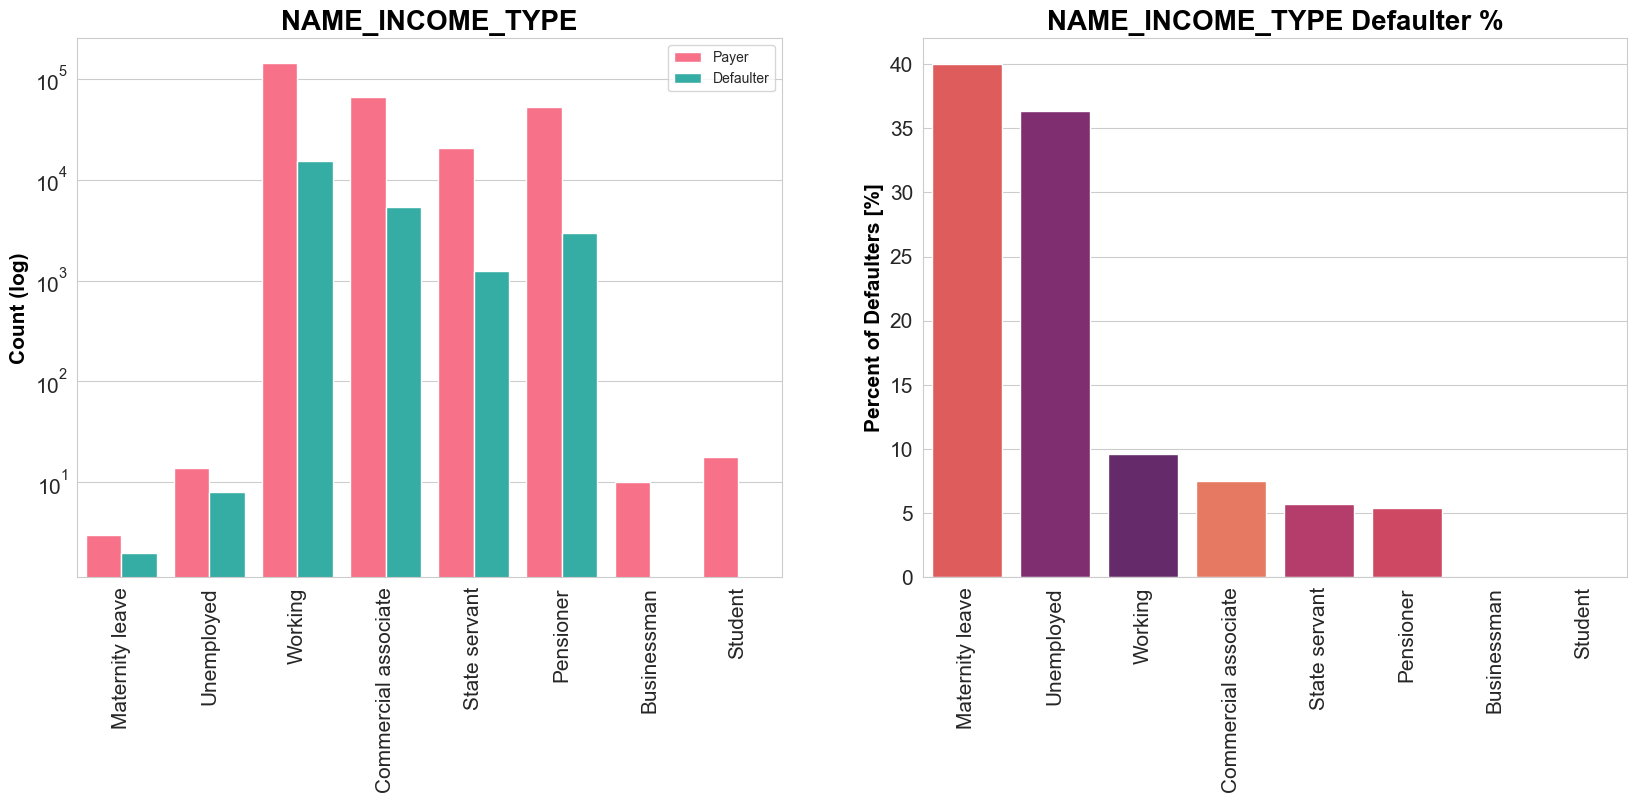

In [379]:
# Create count plots
univariate_categorical('NAME_INCOME_TYPE', ylog=True, label_rotation=True)

**<u>Observation #8</u>**

- Individuals who are working are the highest loan applicants by 52% followed by Commercial associates, Pensioner and State servants with application rates of 23%, 18% and 7% respectively.
- Individuals who are on maternity leaves are the highest defaulters by 40% followed by Unemployed with about 36%.
- The remaining types of incomes are under 10% in defaulters.
- Individuals who are Businessmen and Students have no records as a defaulter.

#### H. REGION_RATING_CLIENT

Distribution of the Rating given to the Client's Living location

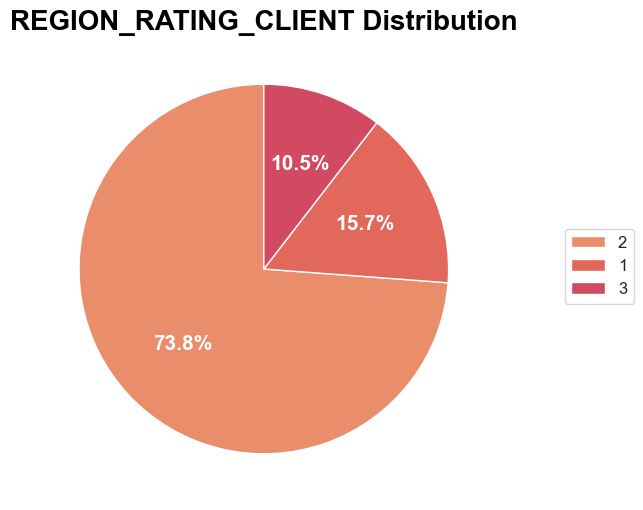

In [380]:
# Create pie plot
create_pie_plot(application_data, 'REGION_RATING_CLIENT')

Identifying relation between rating given to where applicant lives and loan repayment status

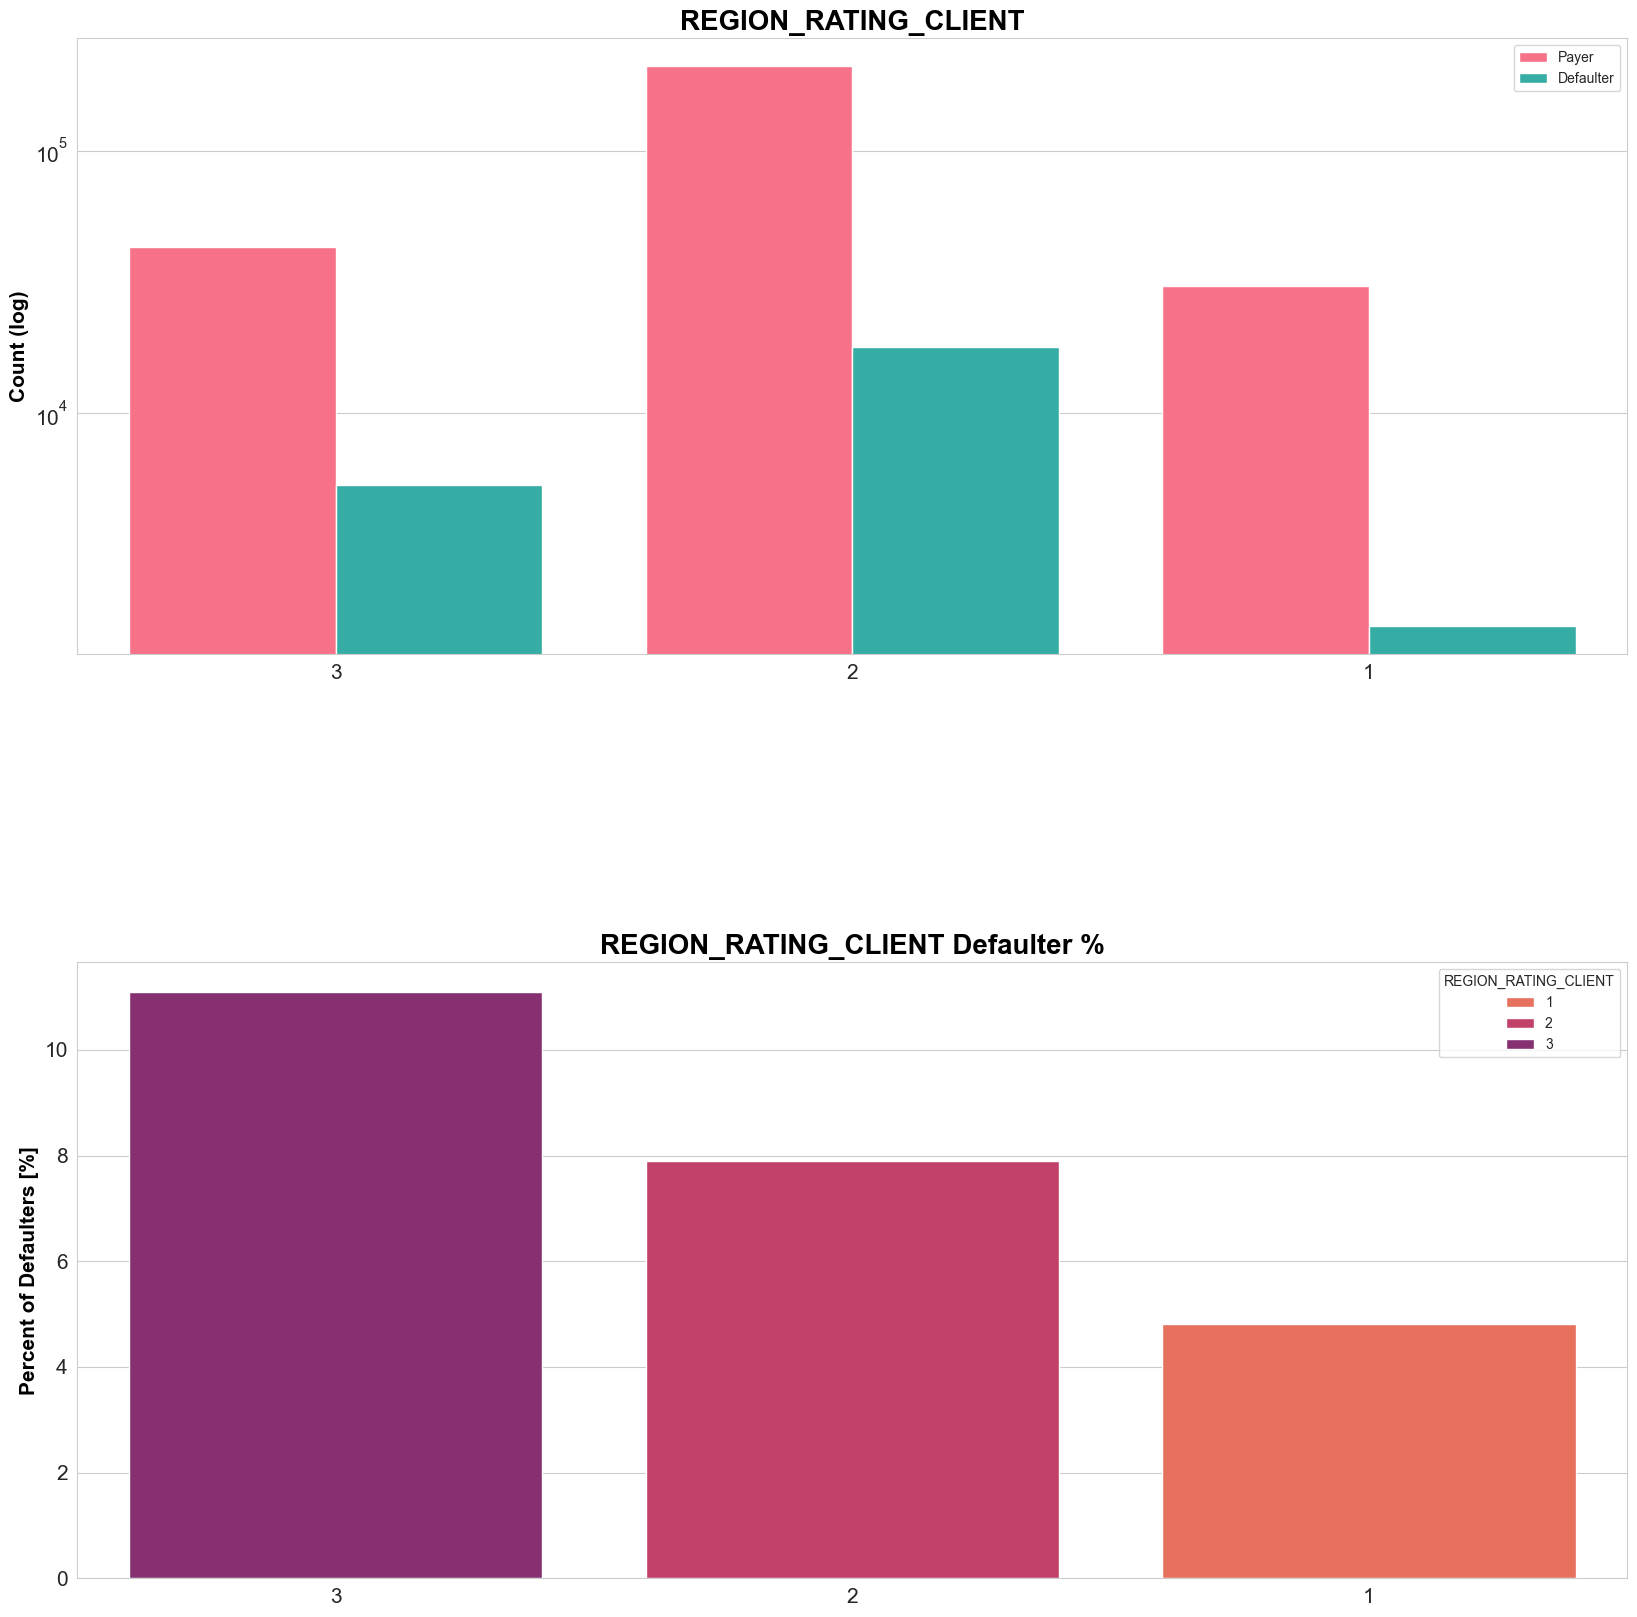

In [381]:
# Create count plots
univariate_categorical('REGION_RATING_CLIENT', ylog=True, horizontal_layout=False)

**<u>Observation #9</u>**

- Focus on applicants living in regions with Rating 1, as they have the lowest defaulting rate of less than 5%.
- Monitor applicants living in regions with Rating 2, as they constitute the majority of the applicants with about 74%.
- Avoid applicants living in regions with Rating 3, as they have the highest defaulting rate of about 11%.

#### I. OCCUPATION_TYPE

Distribution of the Occupation Types

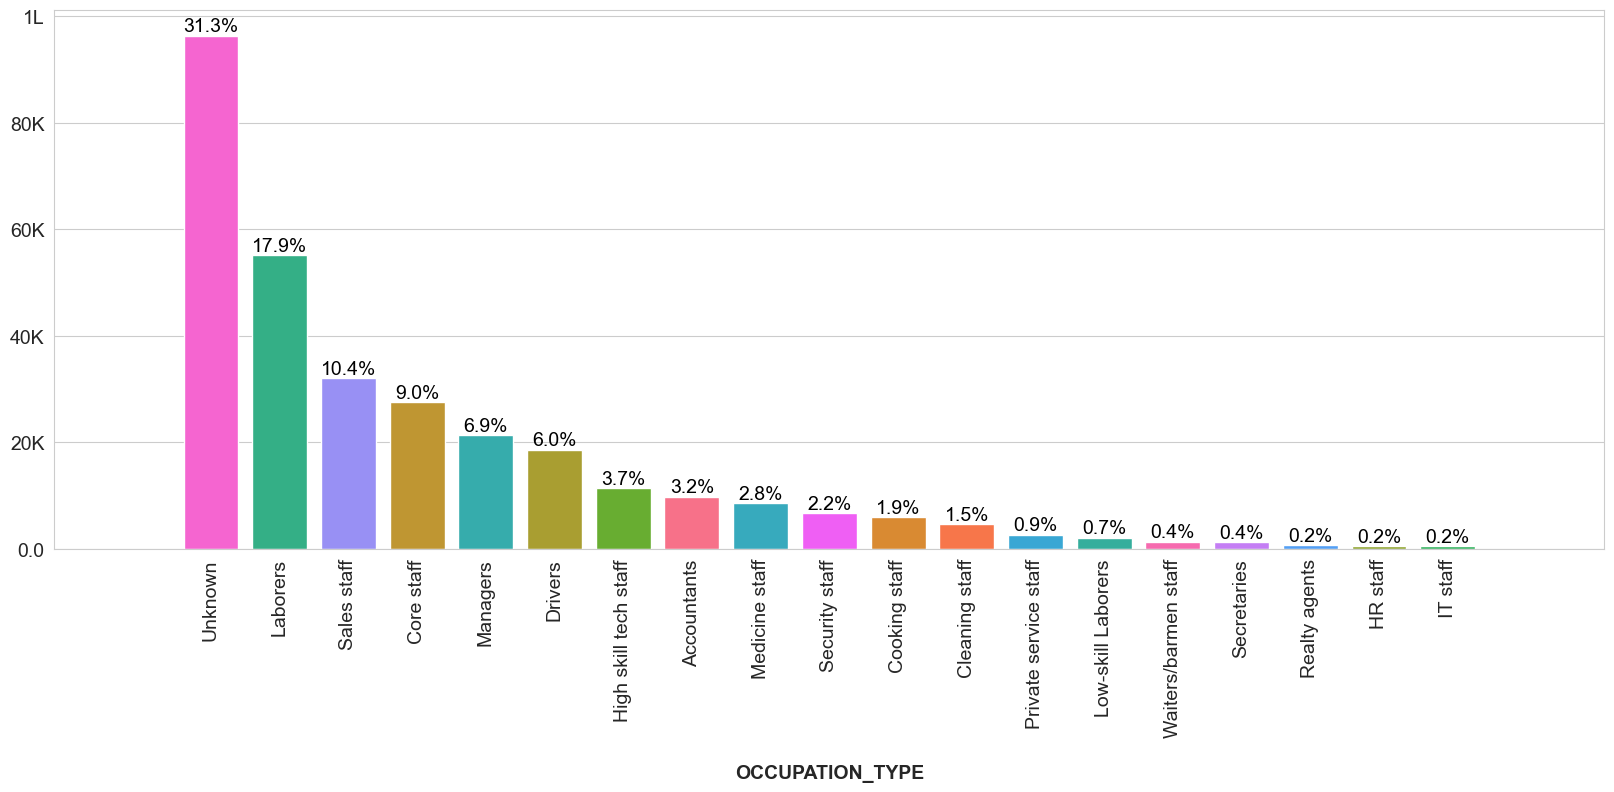

In [382]:
# Create count plot
prepare_count_plot(application_data, 'OCCUPATION_TYPE', label_rotation=90)

Identifying relation between occupation statues and loan repayment status

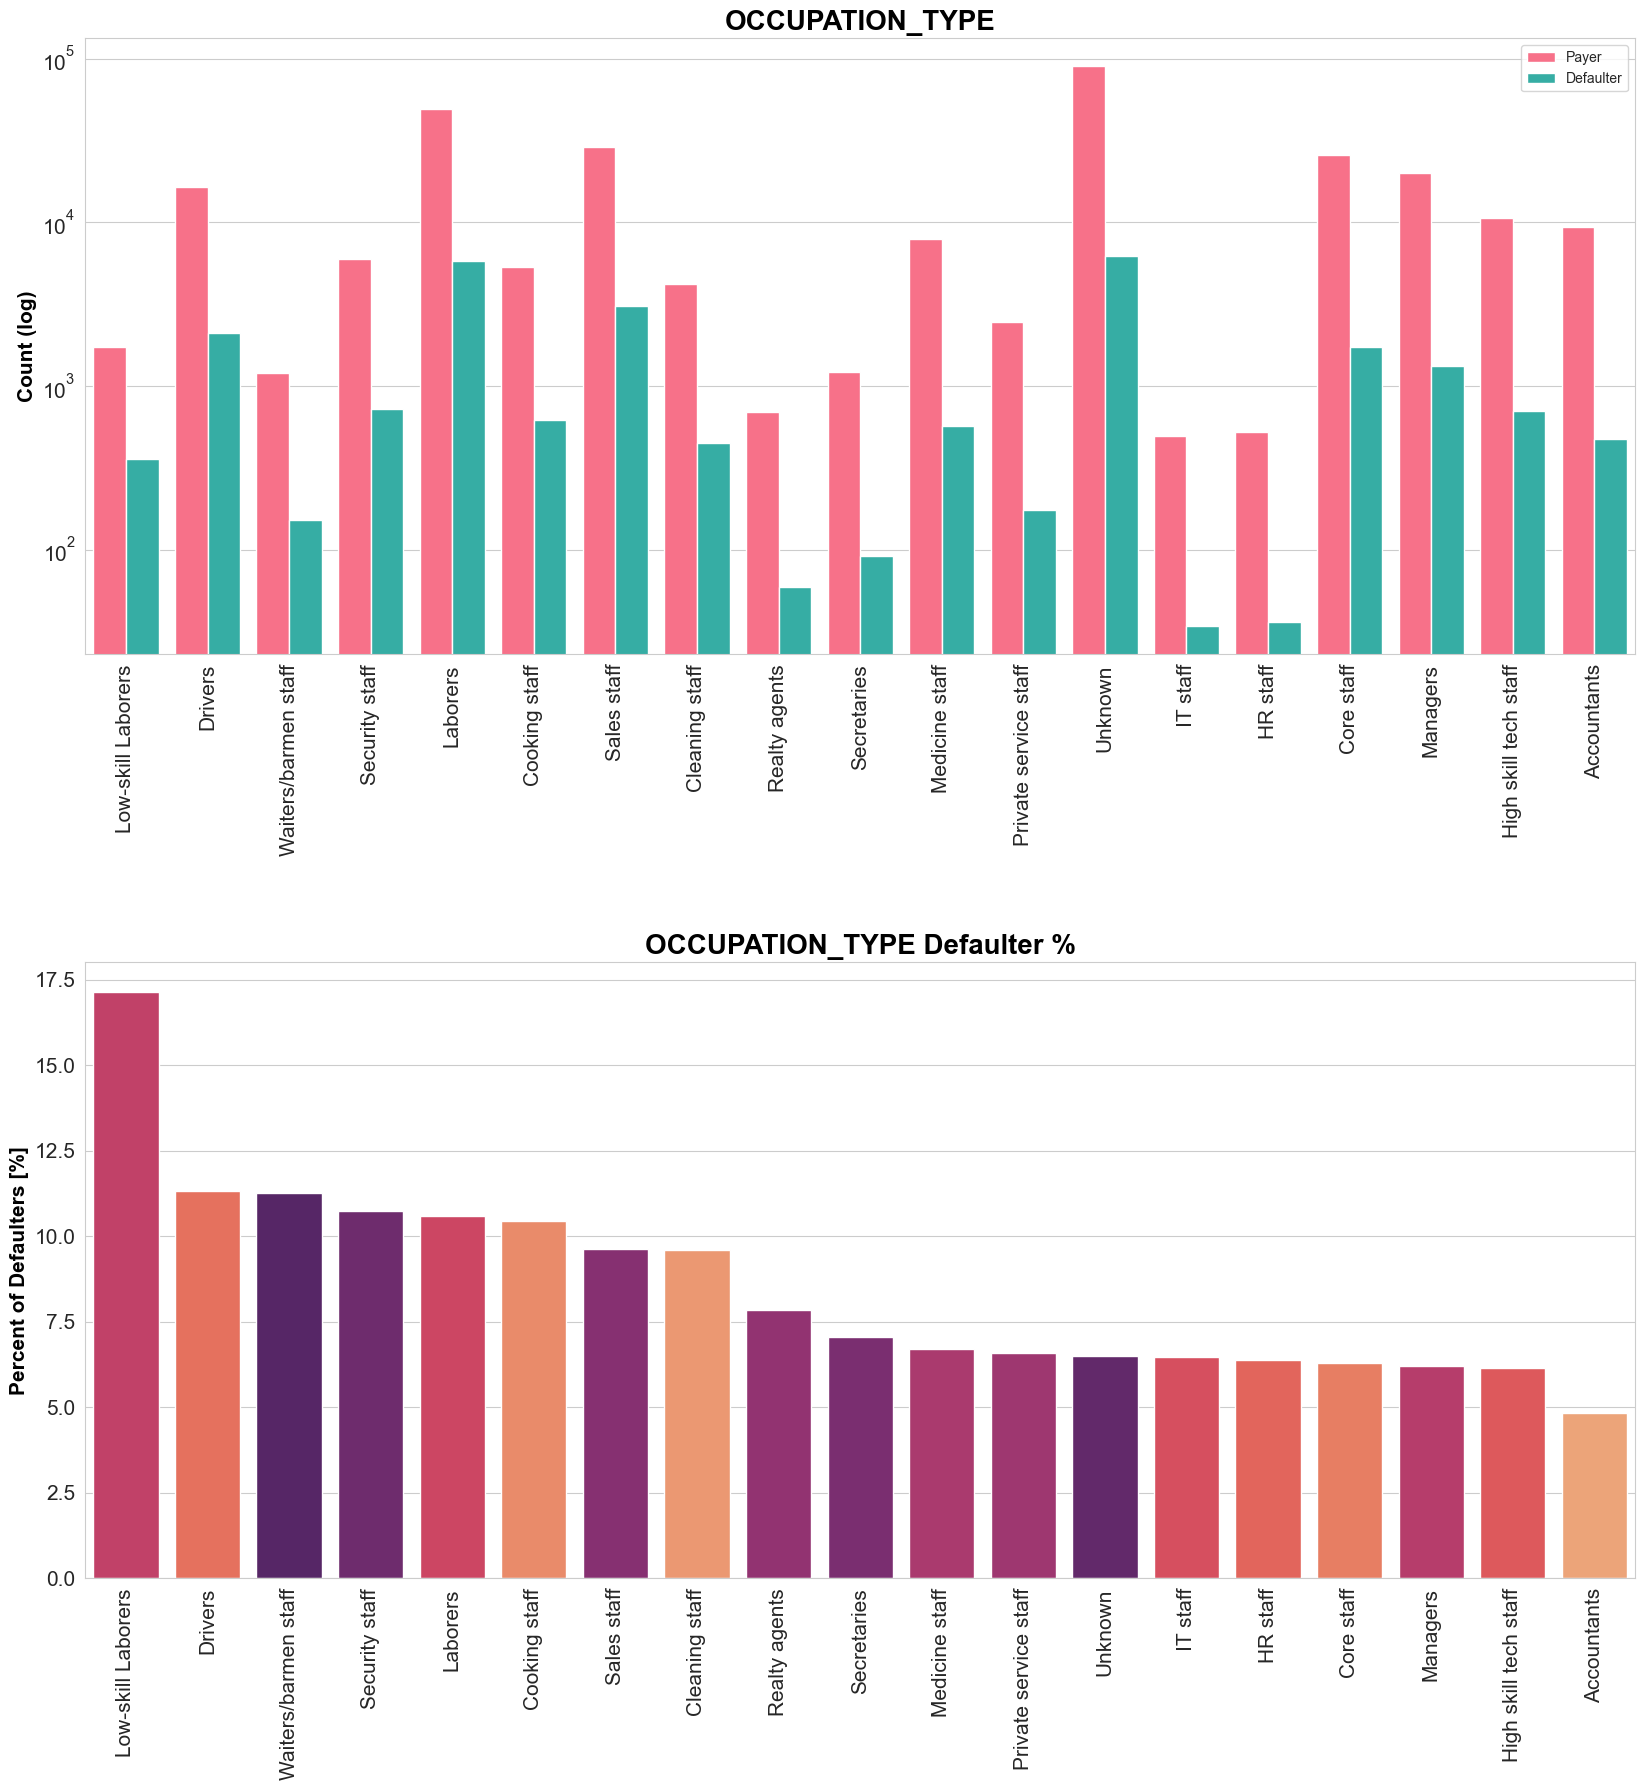

In [383]:
# Create count plots
univariate_categorical('OCCUPATION_TYPE', ylog=True, label_rotation=True, horizontal_layout=False)

**<u>Observation #10</u>**

- Unknown occupation types account for 31% of the loan applicants, followed by laborers, sales and core staff.
- Low skilled laborers, drivers, waiters/barmen, security staff and cooking staff have the highest loan default rates, ranging from 17% to 10%.

#### J. ORGANIZATION_TYPE

Distribution of the Organisation Types

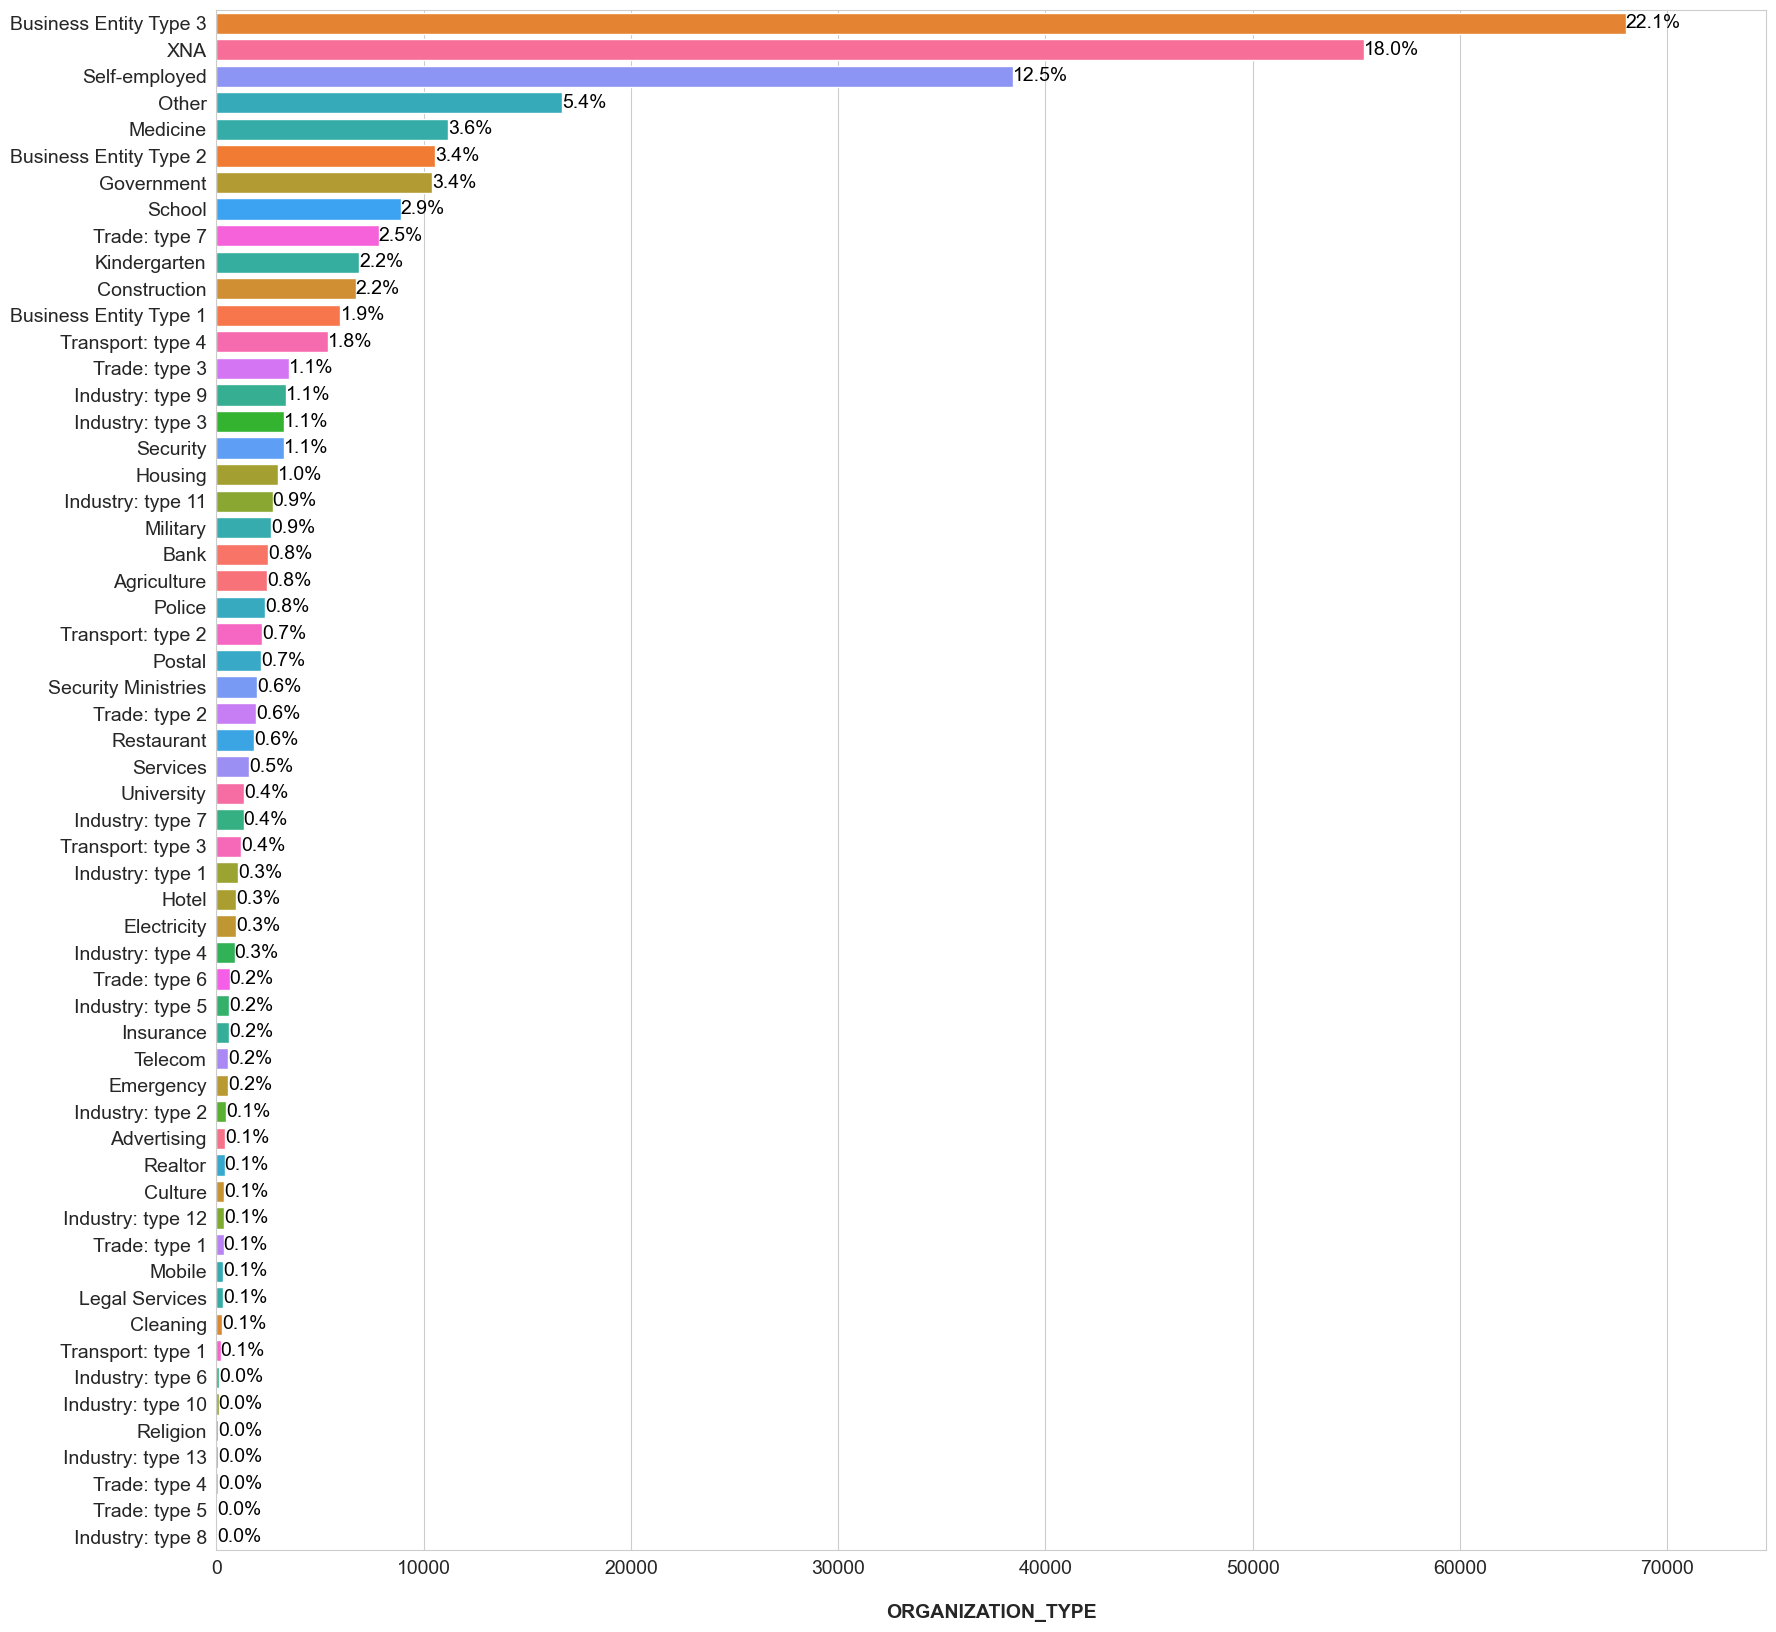

In [384]:
# Create count plot
prepare_count_plot(application_data, 'ORGANIZATION_TYPE', rotate_plot=True)

Identifying relation between organisatin types and loan repayment status

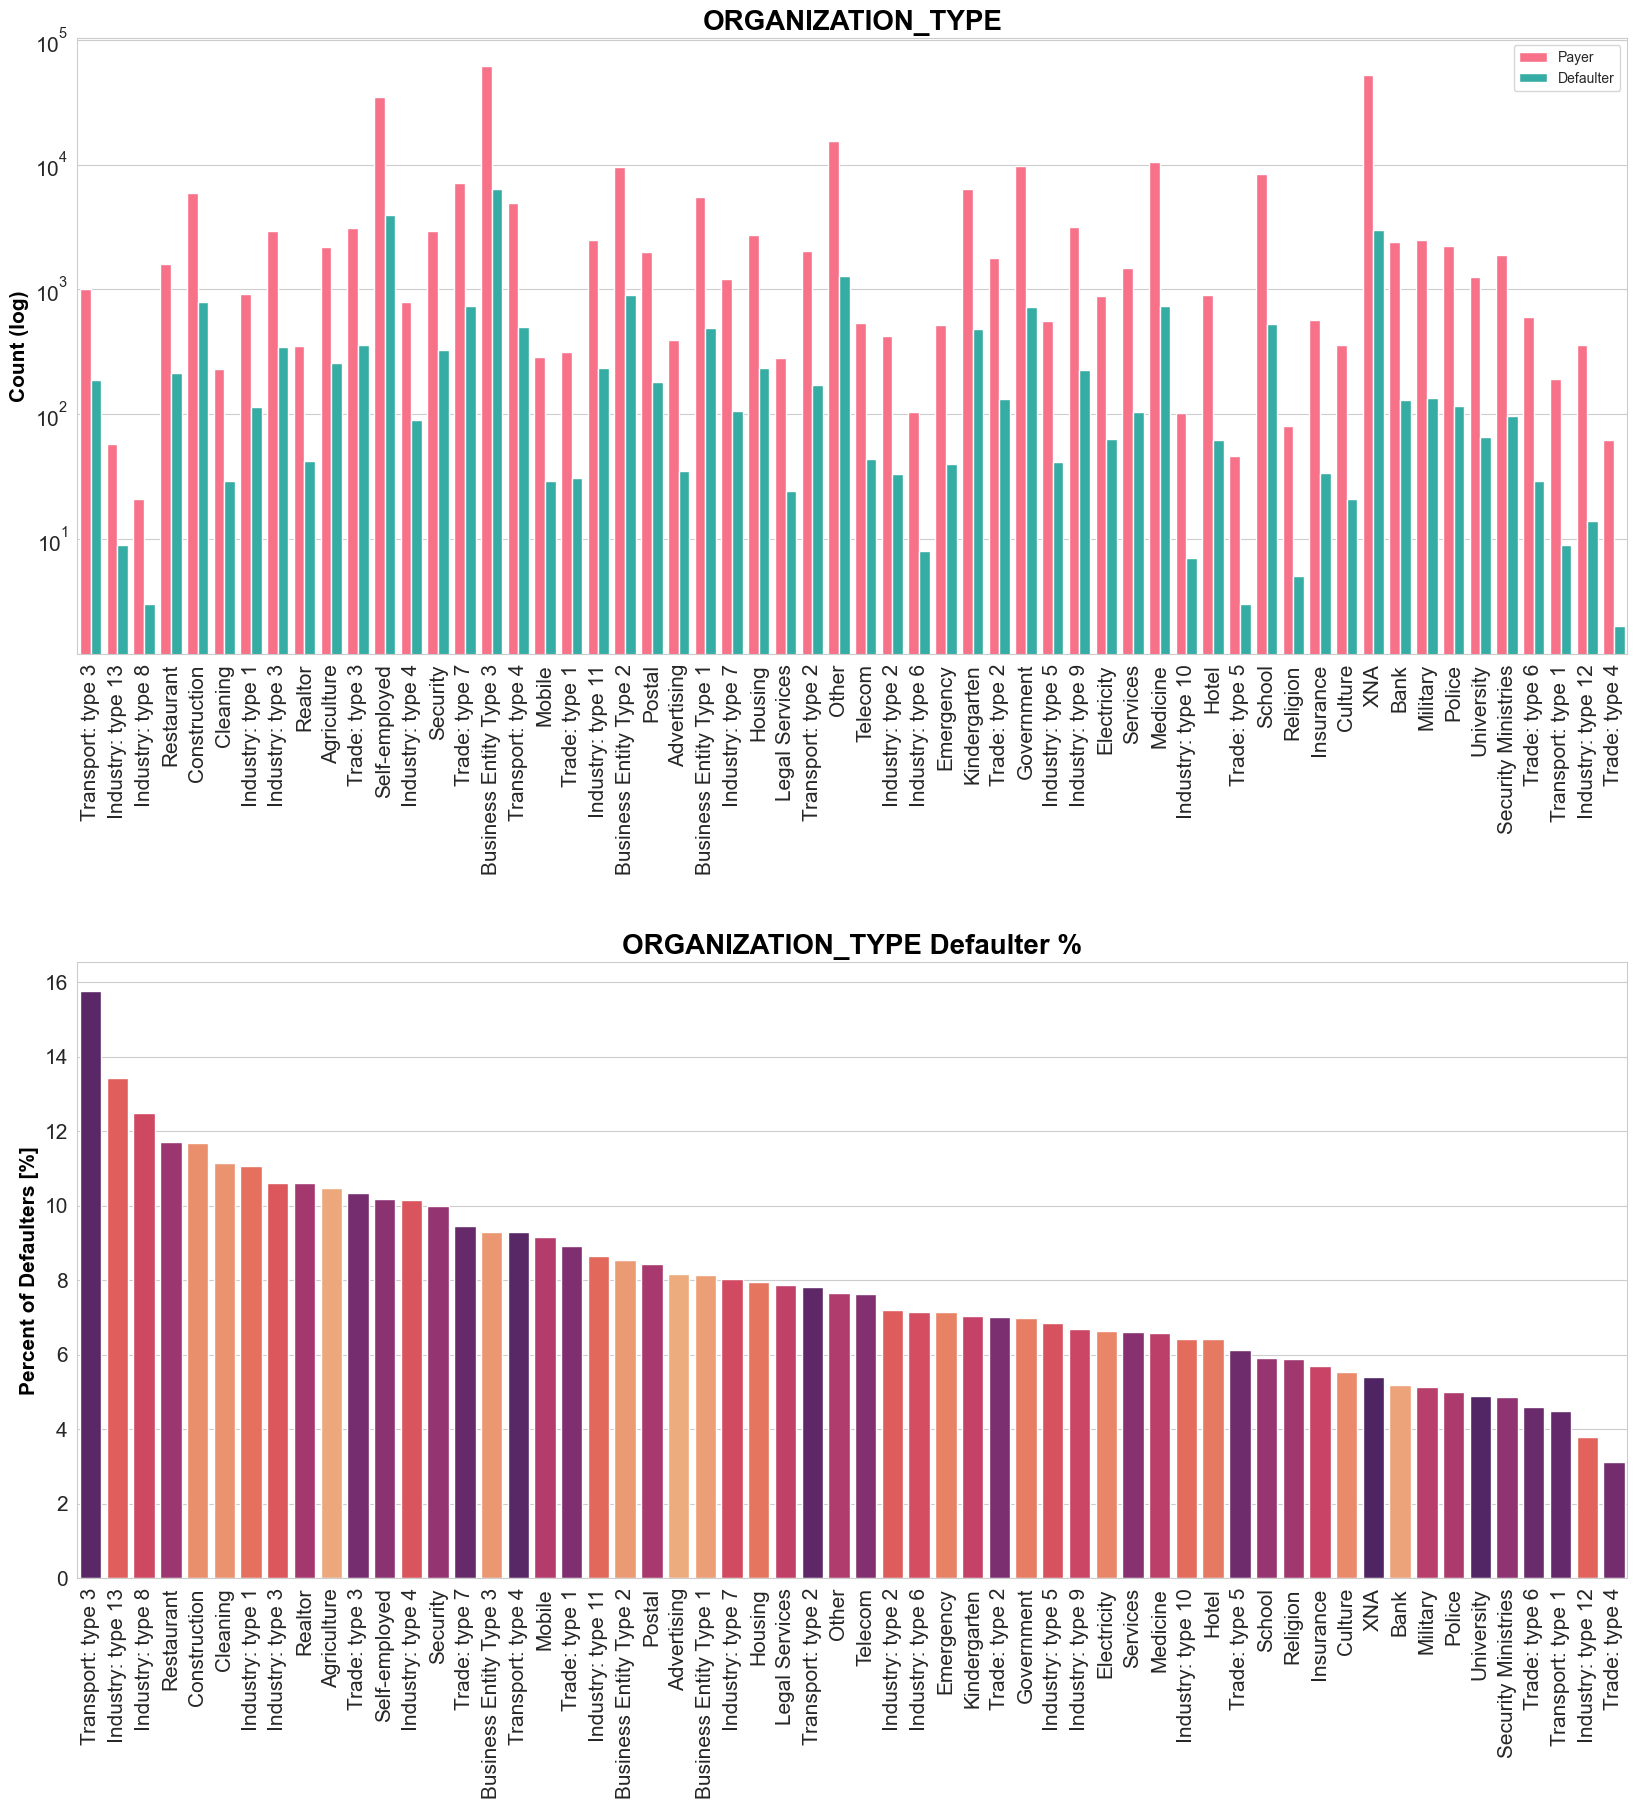

In [385]:
# Create count plots
univariate_categorical('ORGANIZATION_TYPE', True, True, False)

**<u>Observation #11</u>**

- 18% of the loan applications have missing information on the organization type (XNA).
- The most frequent organization type among the loan applicants is Business Entity Type 3.
- The organization types with the highest default rates are:
    - Transport Type 3 (16%)
    - Industry: Type 13 (13%)
    - Industry: Type 8 (12%)
    - Restaurant (<12%)
- The organization type with the lowest default rate is Trade: Type 4 (<4%), followed by Industry: Type 12 (<4%).
- The Self-employed borrowers have a relatively high default rate (>10%).

#### K. FLAG_DOCUMENT_3

Distribution of FLAG_DOCUMENT_3 of the Clients to signify if Document 3 has been provided while applying for loan or not

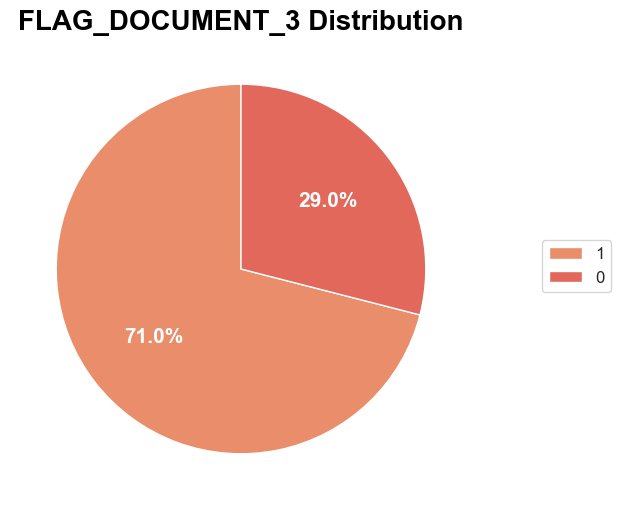

In [386]:
# Create pie plot
create_pie_plot(application_data, 'FLAG_DOCUMENT_3')

Identifying relation between FLAG_DOCUMENT_3 and loan repayment status

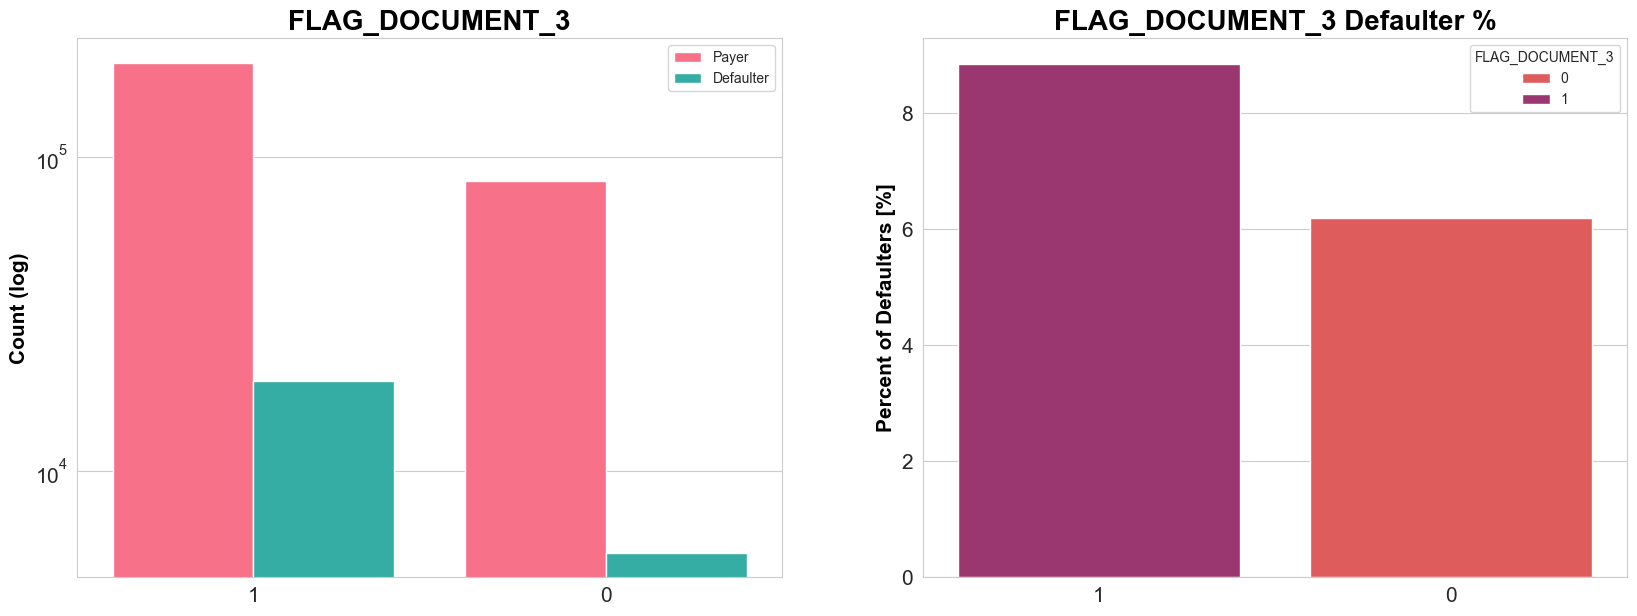

In [387]:
# Create count plots
univariate_categorical('FLAG_DOCUMENT_3', ylog=True)

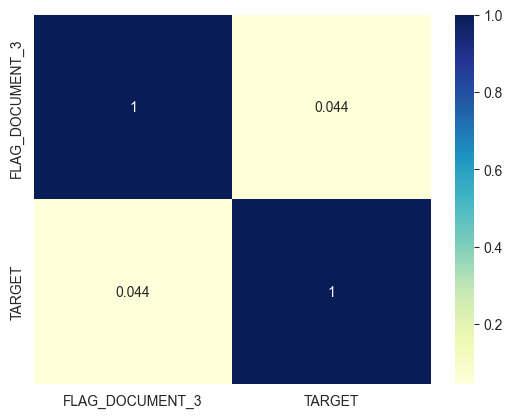

In [388]:
# Creating Heat map for FLAG_DOCUMENT_3 and TARGET
sns.heatmap(application_data[['FLAG_DOCUMENT_3', 'TARGET']].corr(), annot=True, cmap='YlGnBu')
plt.show()

**<u>Observation #12</u>**

There is no significant correlation between payers and defaulters in terms of submitting document 3. Even if applicants have submitted the document, they have defaulted a slightly more (~9%) than who have not submitted the document (6%).

#### K. AGE_GROUP

Distribution of AGE_GROUP of the Clients

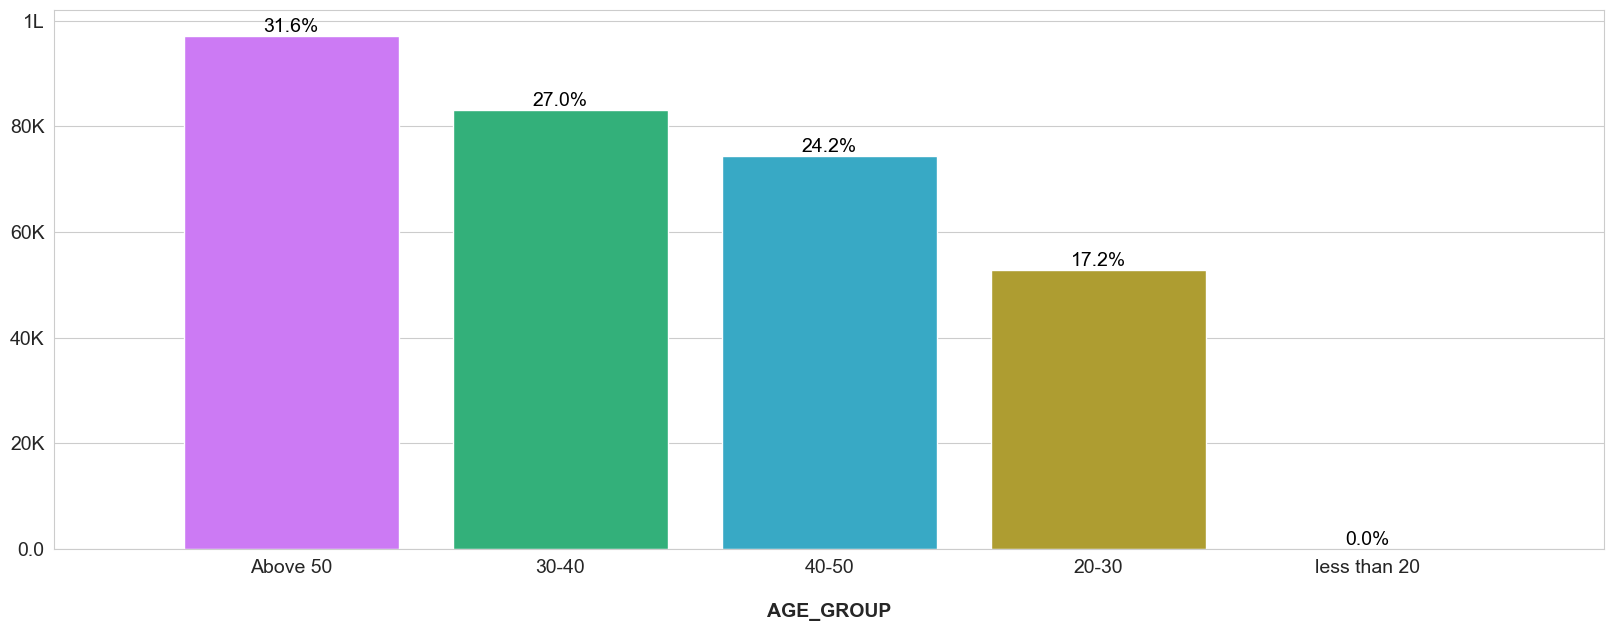

In [389]:
# Create count plot
prepare_count_plot(application_data, 'AGE_GROUP')

Identifying relation between Age and loan repayment status

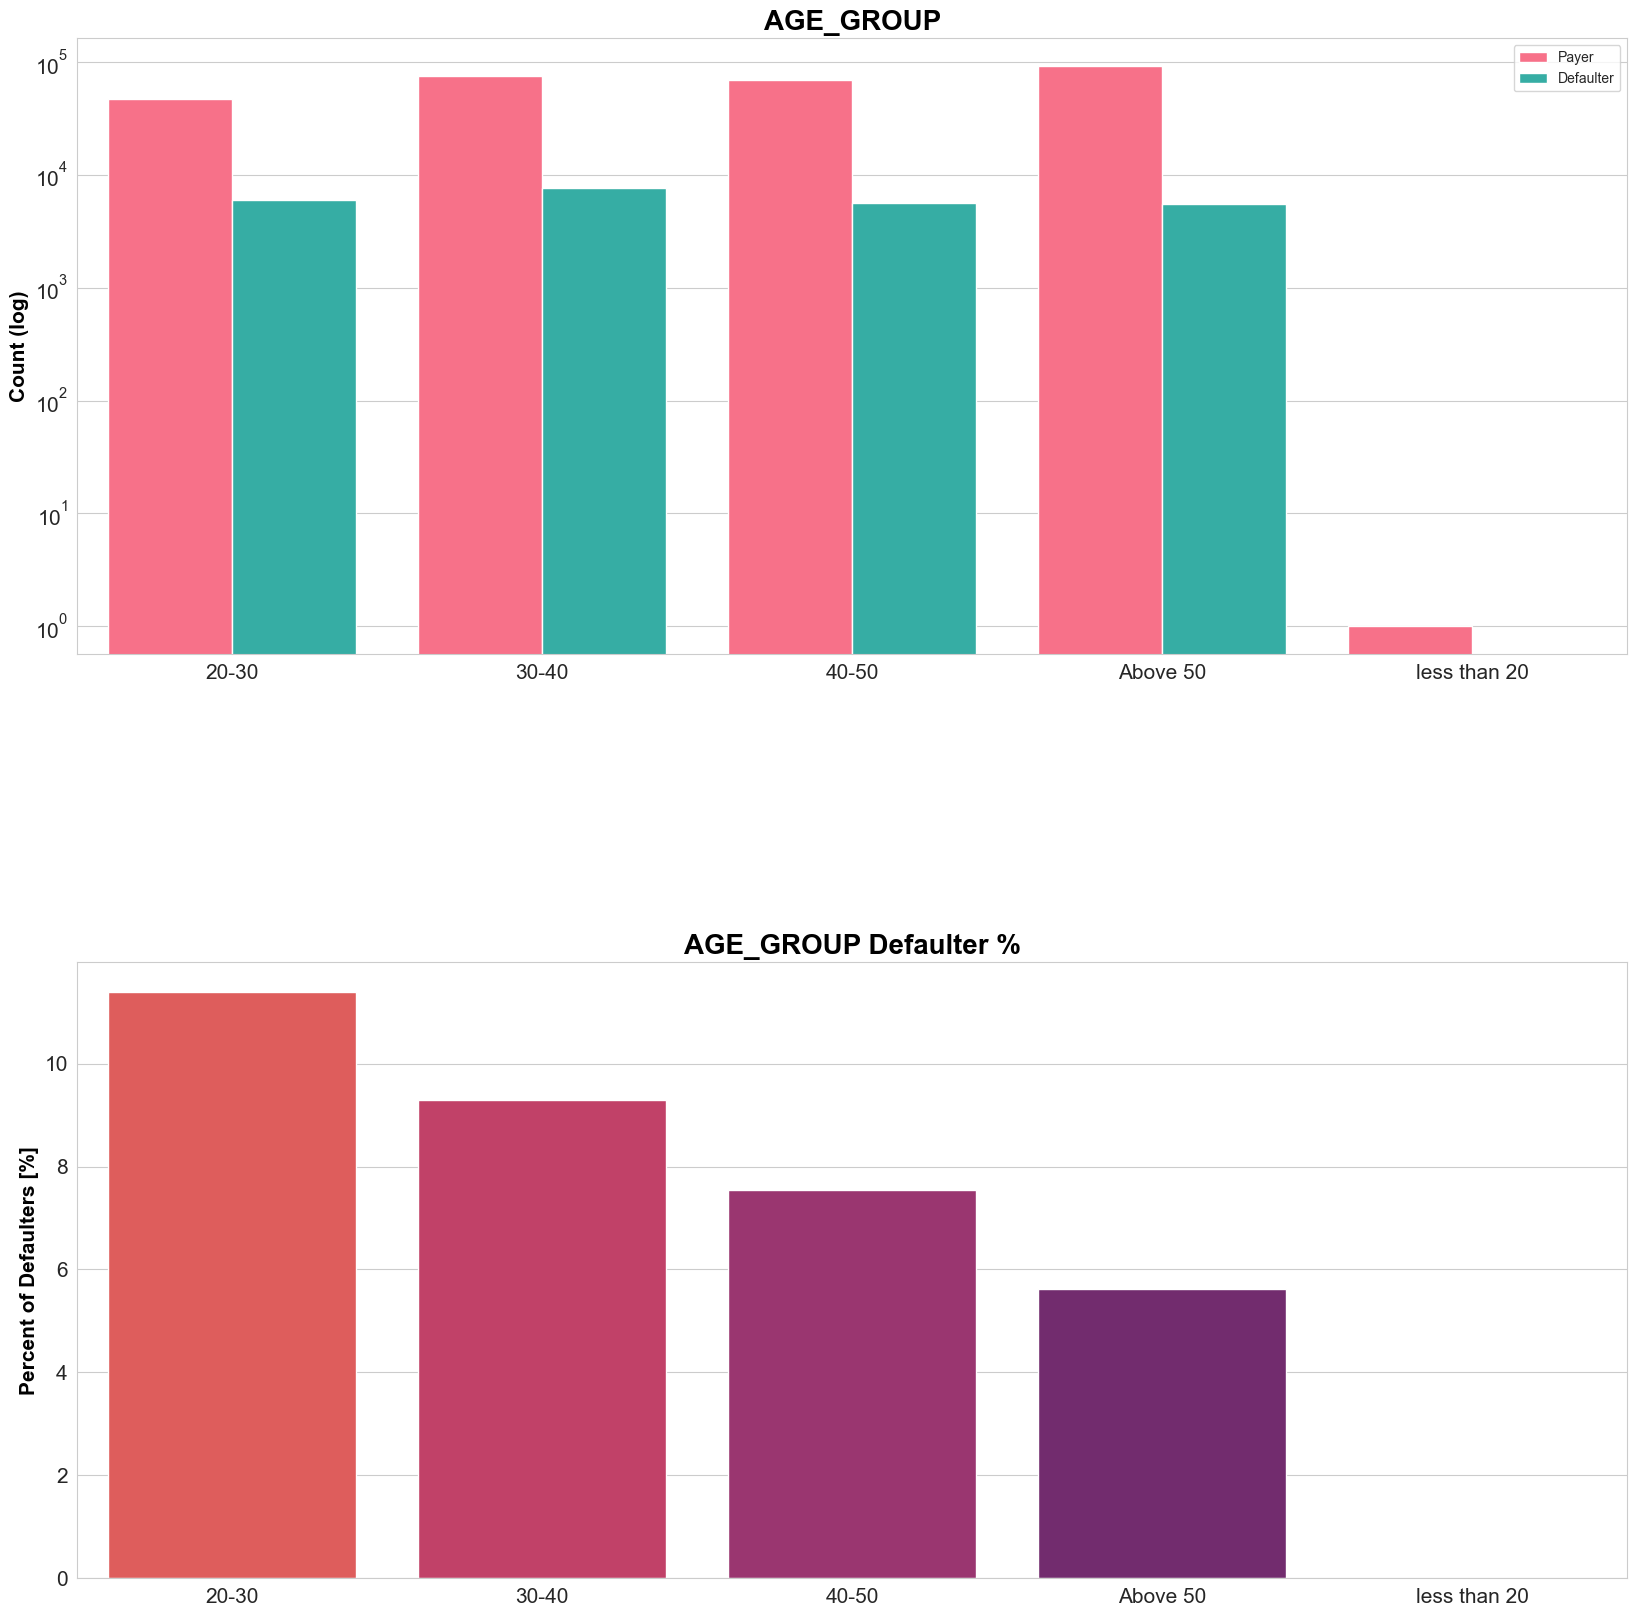

In [390]:
# Create count plots
univariate_categorical('AGE_GROUP', ylog=True, horizontal_layout=False)

**<u>Observation #13</u>**

- The loan applicants’ age affects their default rate.
- The highest default rate is among applicants aged 20 to 40.
- The lowest default rate is among applicants aged above 50, who are also the most frequent loan applicants.
- The majority of the loan applicants are aged above 30.

#### L. YEARS_EMPLOYED_RANGE

Distribution of Years Employed of the Clients

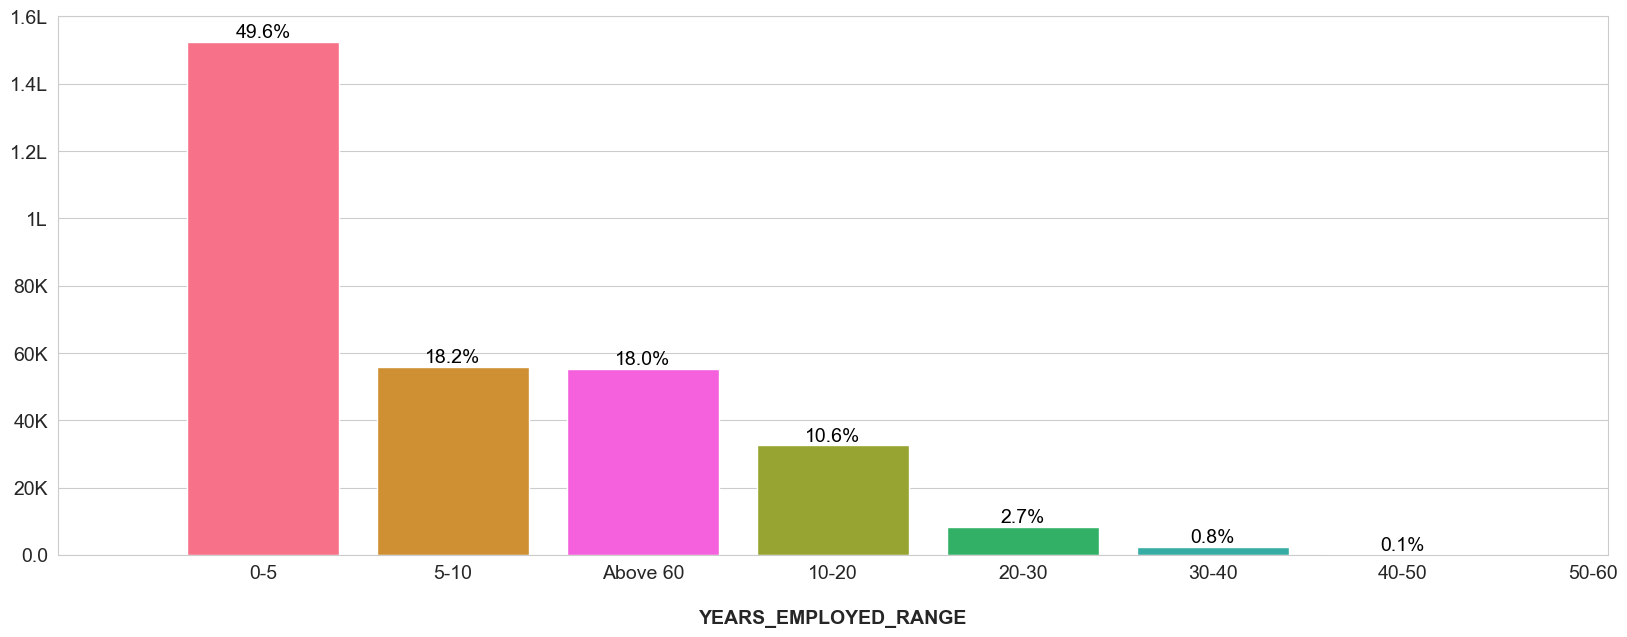

In [391]:
# Create count plots
prepare_count_plot(application_data, 'YEARS_EMPLOYED_RANGE')

Identifying relation between Years employed and loan repayment status

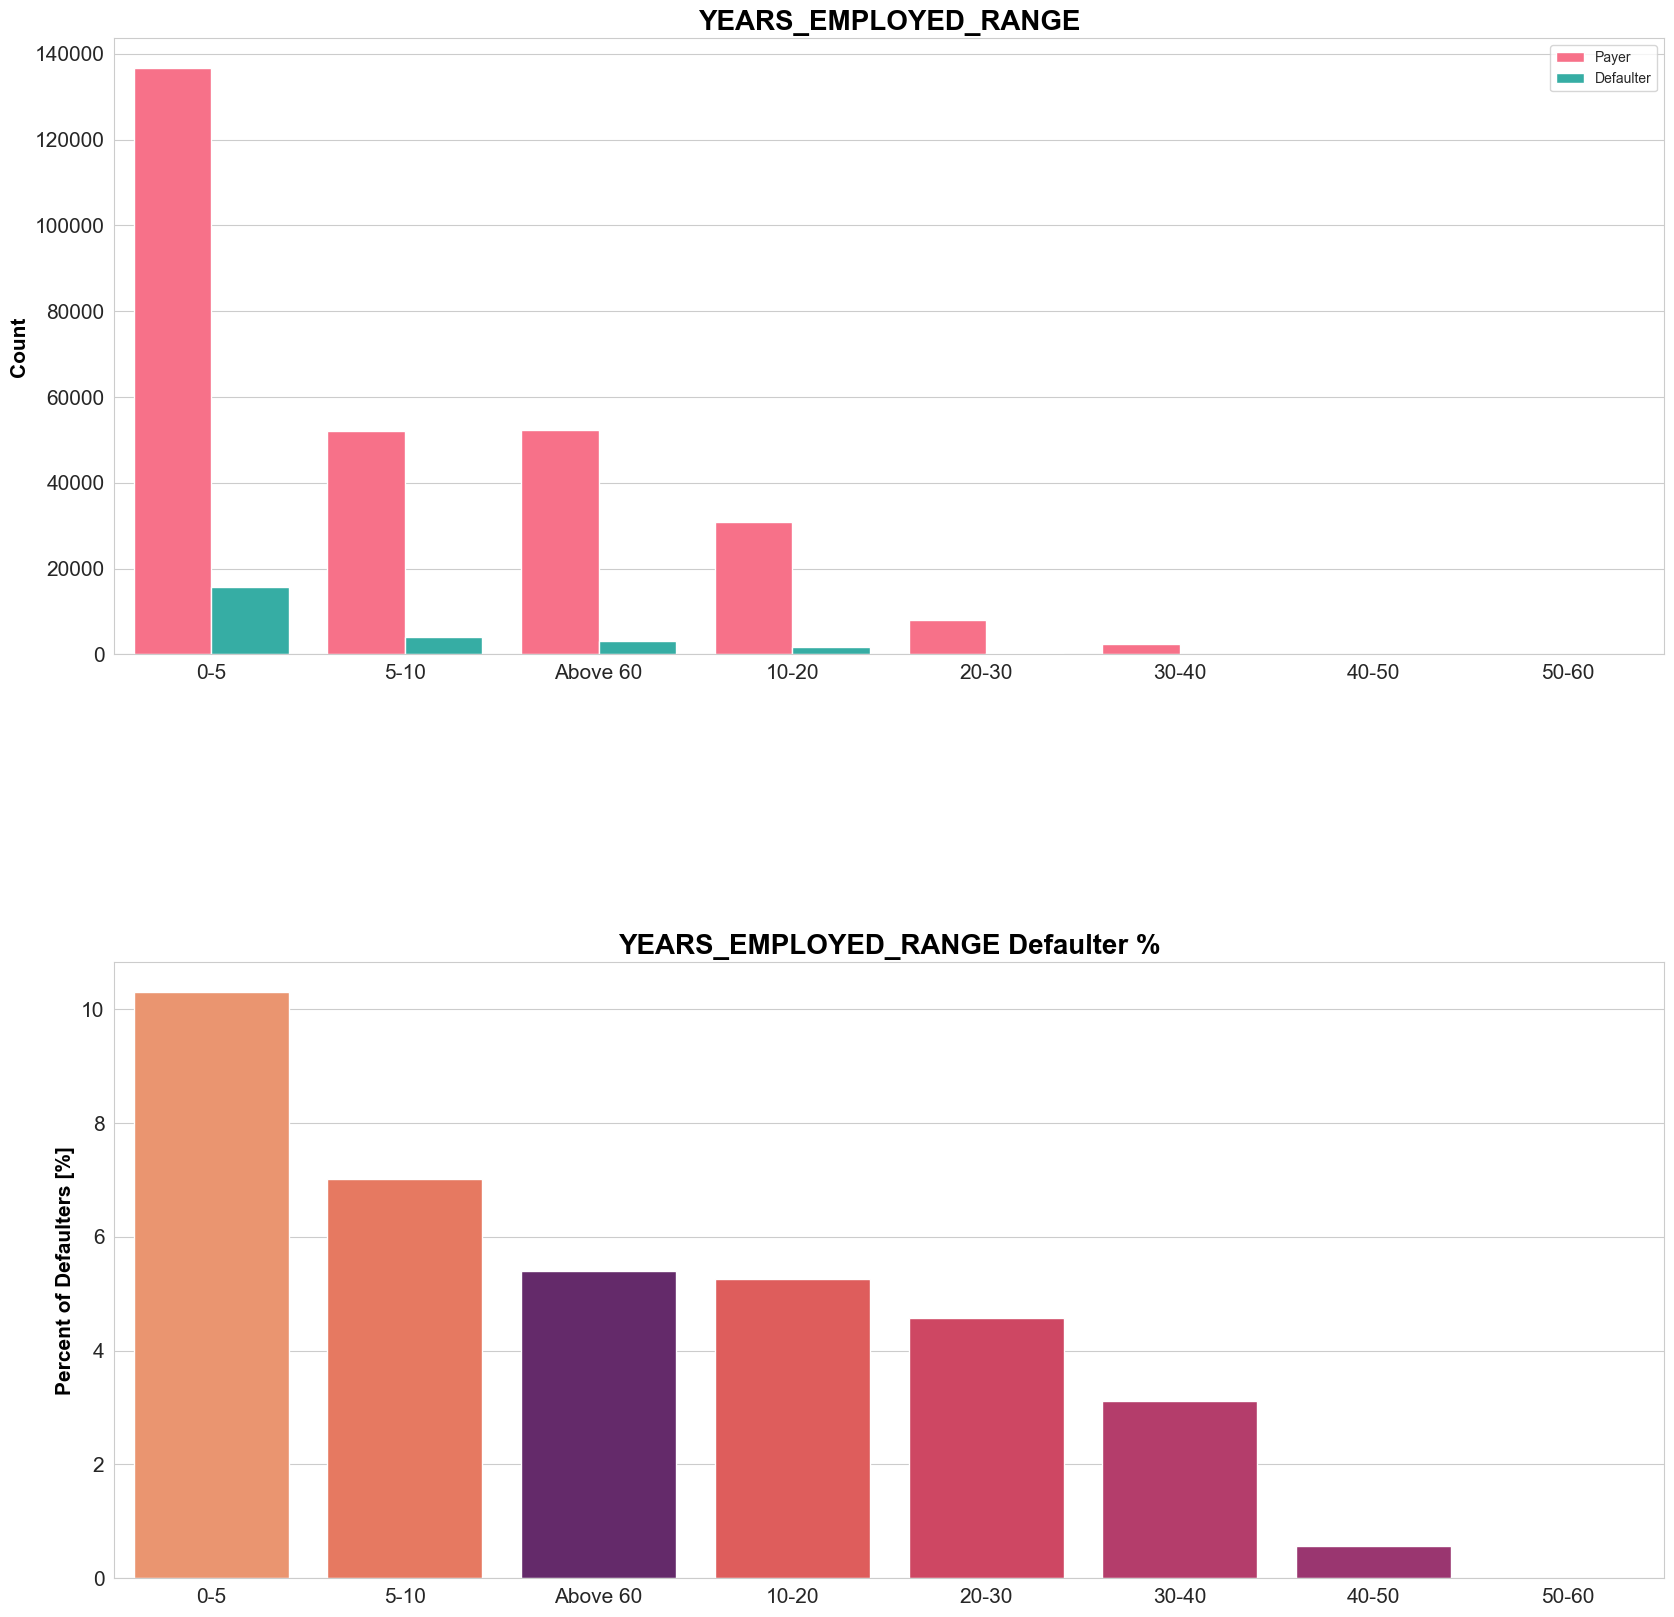

In [392]:
# Create count plots
univariate_categorical('YEARS_EMPLOYED_RANGE', horizontal_layout=False)

**<u>Observation #14</u>**

- Applicants with 0-5 years of experience have the highest defaulting rate of above 10%.
- Applicants with 40-50 years of experience have the lowest defaulting rate of less than 1%.
- Evaluate applicants with other levels of experience, as they have a decreasing defaulting rate with increase in experience.

#### M. AMT_CREDIT_RANGE

Distribution of the Credited Amount to the clients

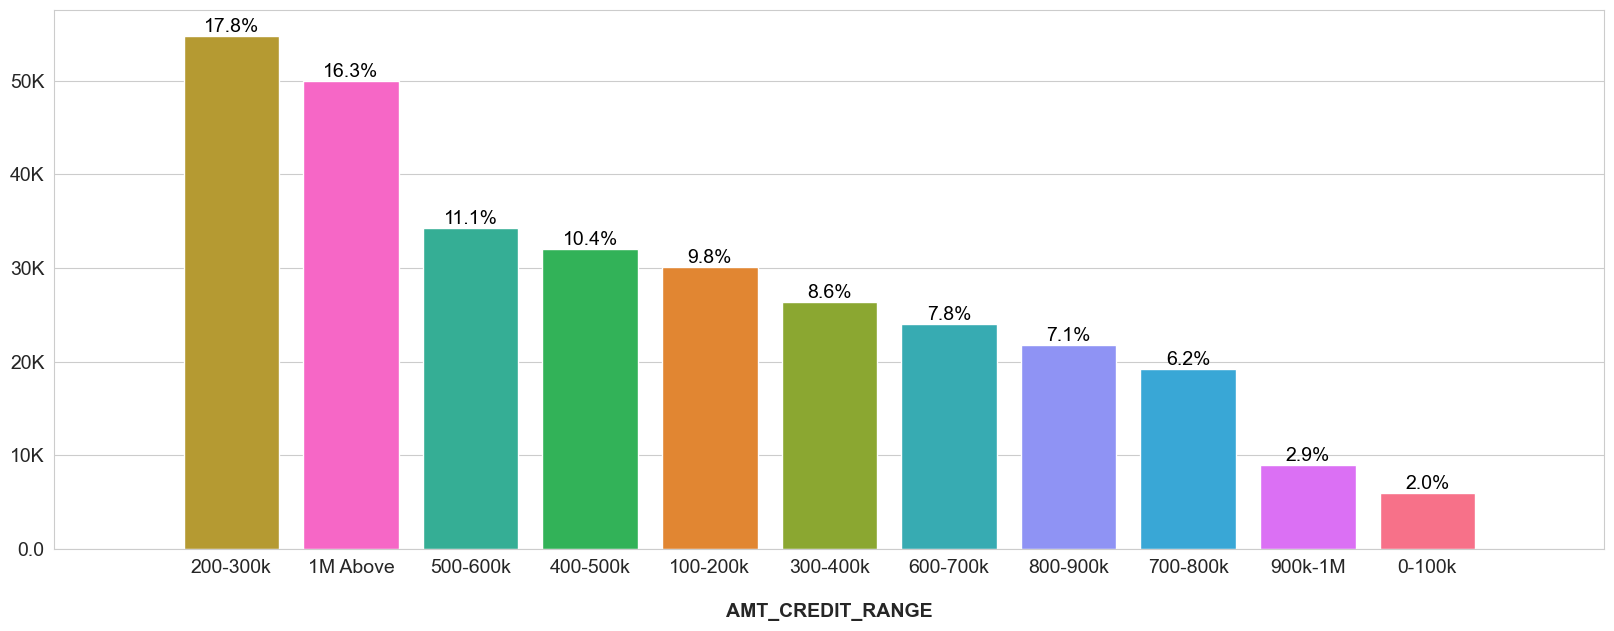

In [393]:
# Create count plot
prepare_count_plot(application_data, 'AMT_CREDIT_RANGE')

Identifying relation between the Amount credited and loan repayment status

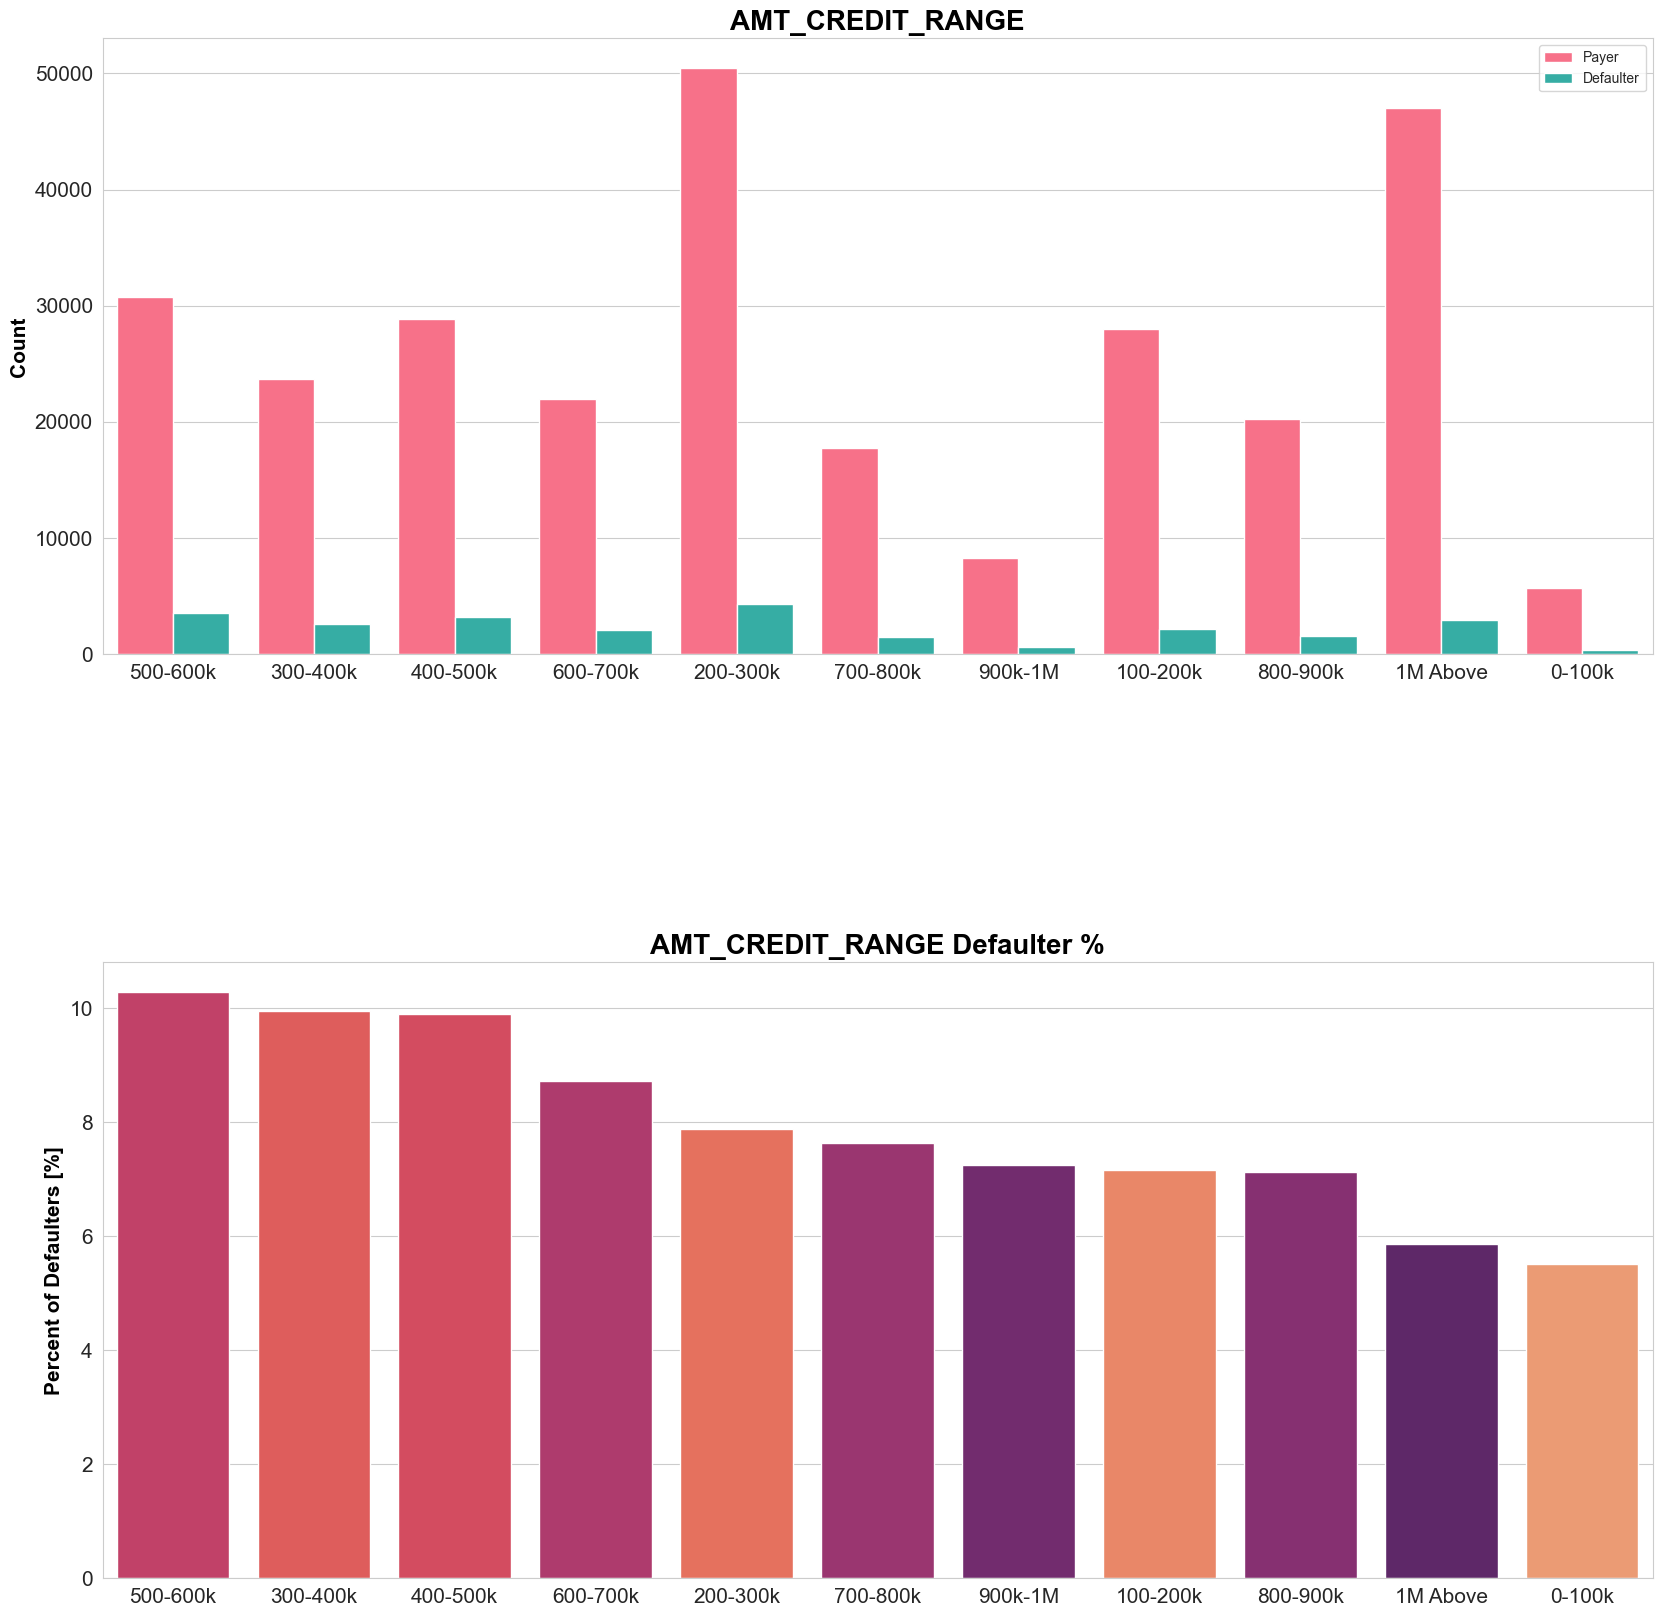

In [394]:
# Create count plots
univariate_categorical('AMT_CREDIT_RANGE', horizontal_layout=False)

**<u>Observation #15</u>**

- The most common loan amount range is 200K-300K, followed by 1M+.
- The loan amount range with the highest default rate is 300K-600K.

#### N. AMT_INCOME_RANGE

Distribution of the Income Amount amongst the clients

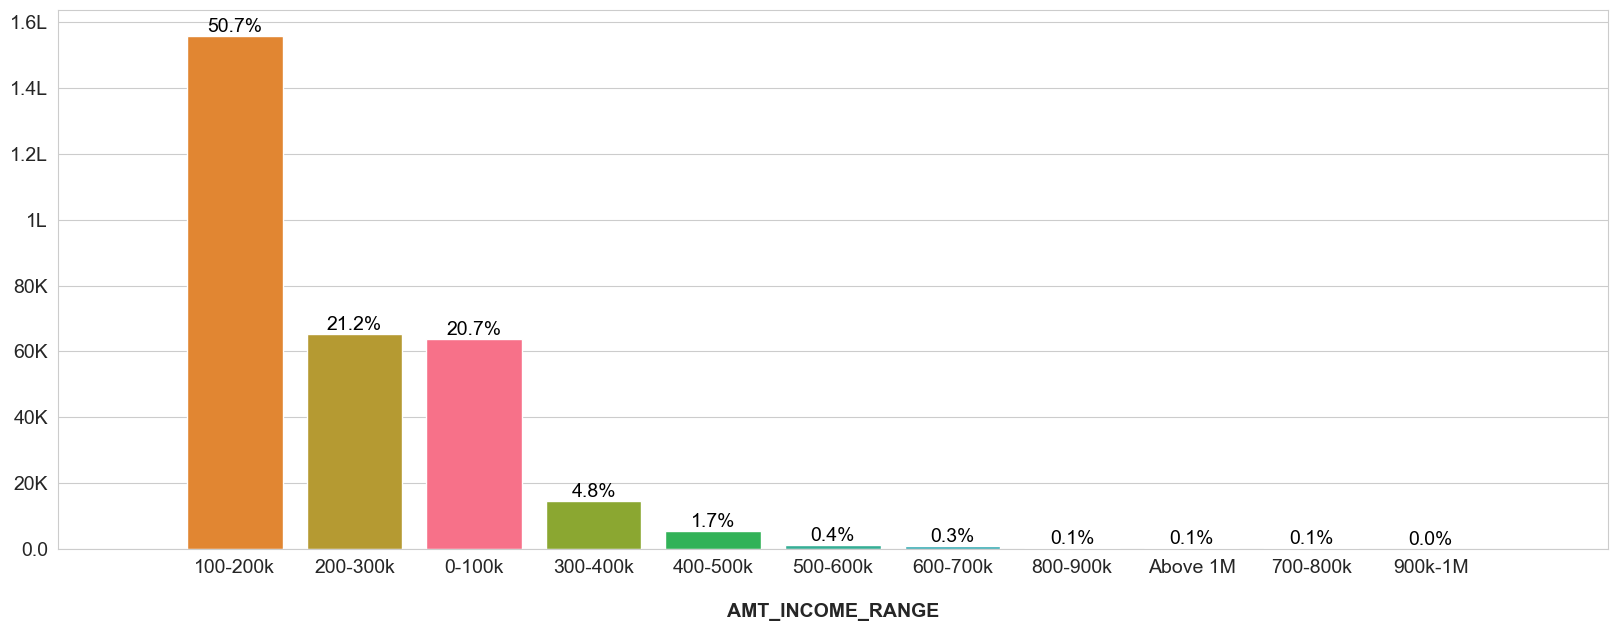

In [395]:
# Create count plot
prepare_count_plot(application_data, 'AMT_INCOME_RANGE')

Identifying relation between the Income and loan repayment status

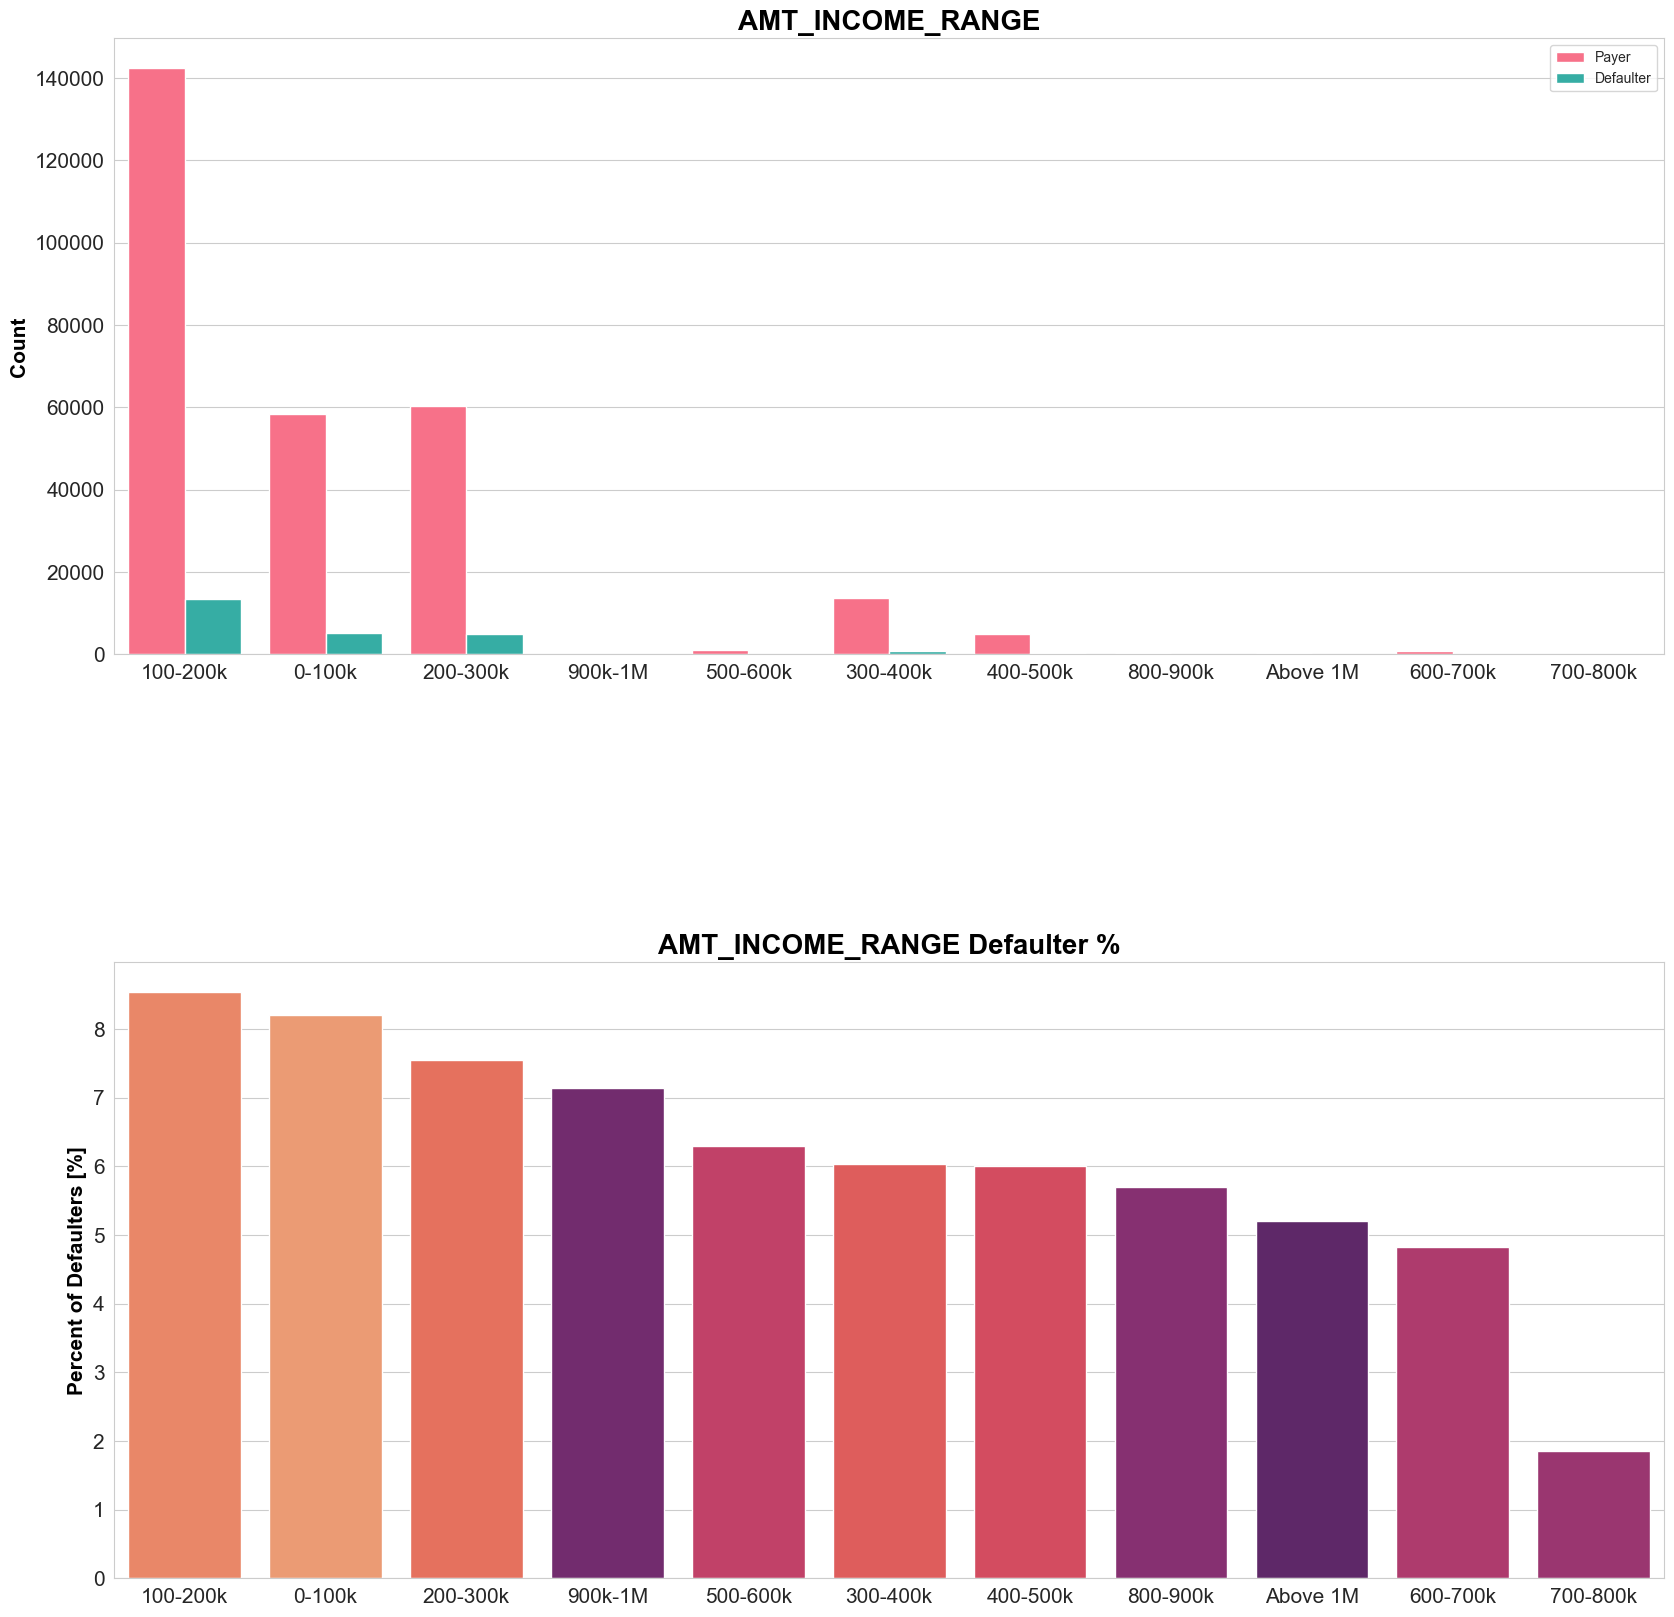

In [396]:
# Create count plots
univariate_categorical('AMT_INCOME_RANGE', horizontal_layout=False)

**<u>Observation #16</u>**

- About half of the applicants have salary between 100-200k
- Applicants with Income between 0 and 300 have the highest probability of defaulting
- Applicants with Income range between 700-800k are least likely to default

#### O. CNT_CHILDREN

Distribution of the children count amongst the clients

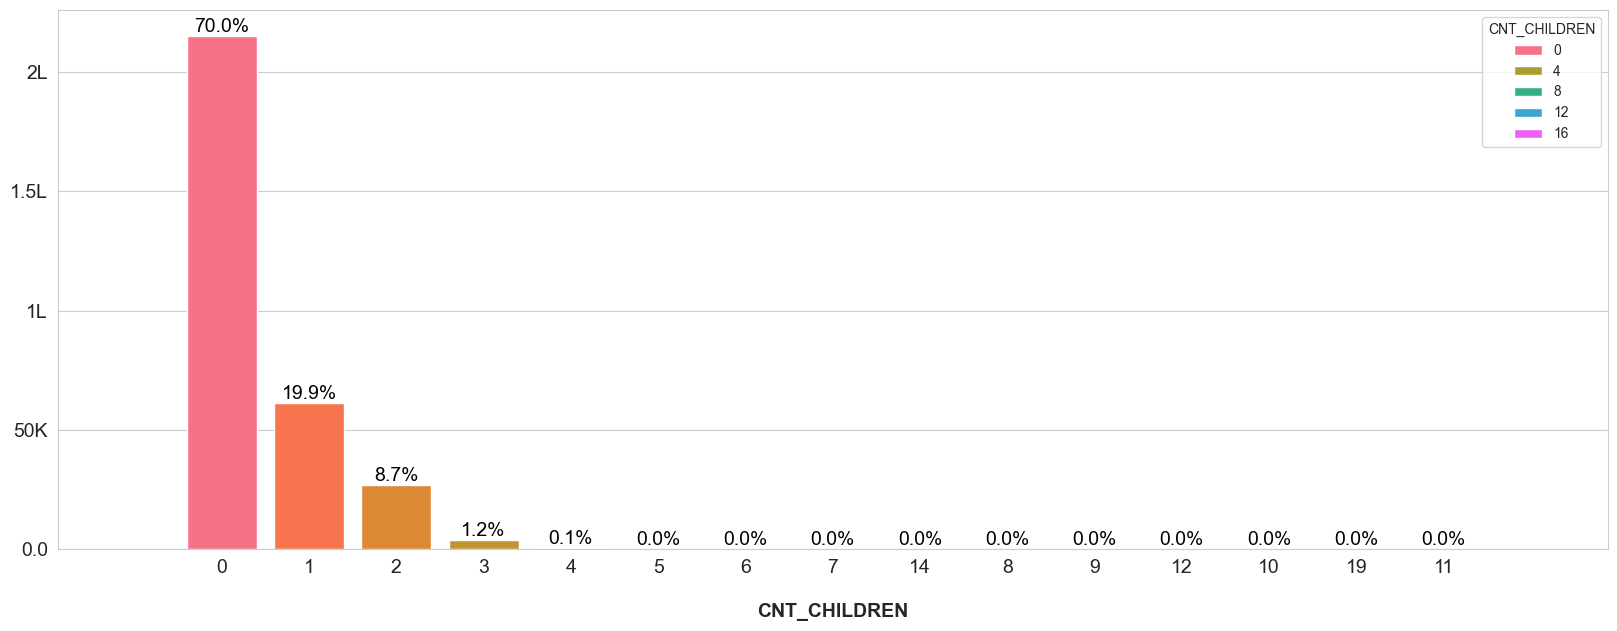

In [397]:
# Create count plot
prepare_count_plot(application_data, 'CNT_CHILDREN')

Identifying relation between the number of children and loan repayment status

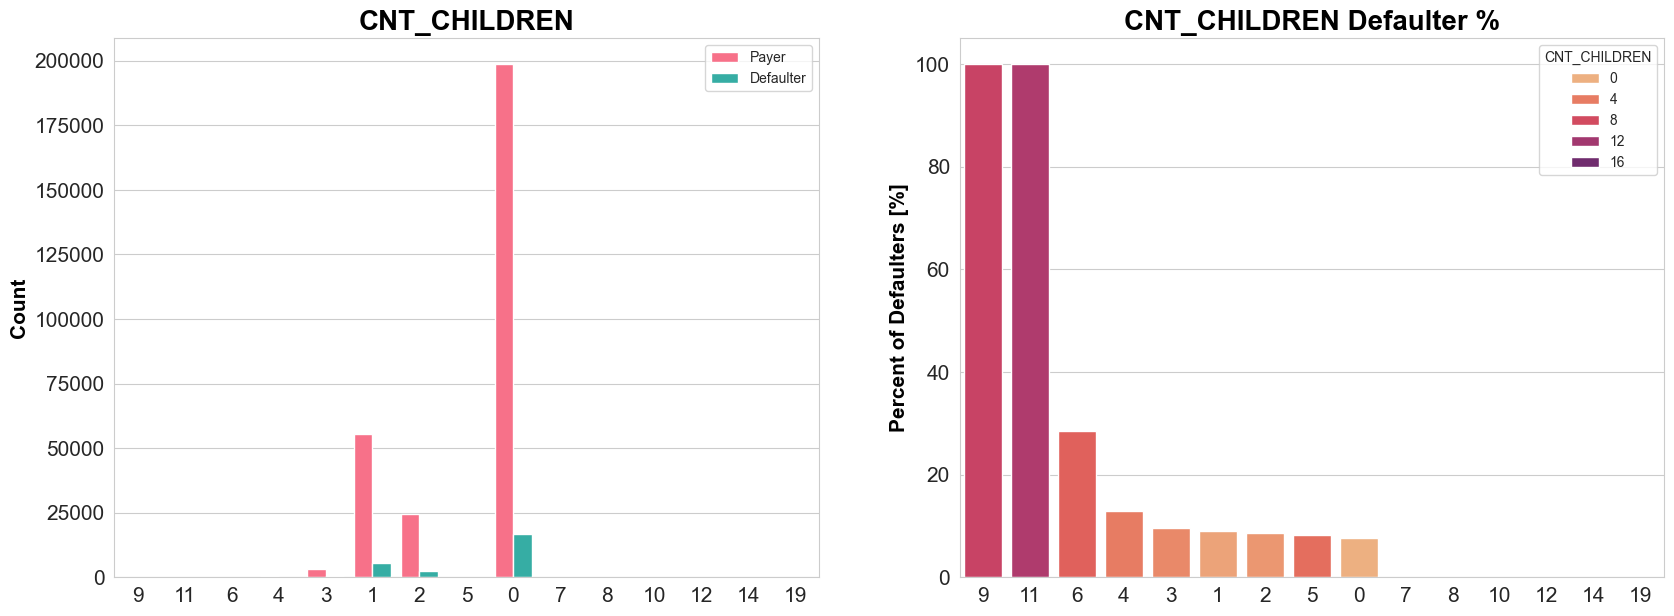

In [398]:
# Create count plots
univariate_categorical('CNT_CHILDREN')

**<u>Observation #17</u>**

- The default rate of loan applicants is influenced by their number of children.
- Applicants with more than 4 children have a very high default rate, especially those with 9 or 11 children who have a 100% default rate.
- Applicants with no children make up 70% of the total applicants.
- Applicants with more than 3 children are very rare.

#### P. CNT_FAM_MEMBERS

Distribution of the count of Family members amongst the clients

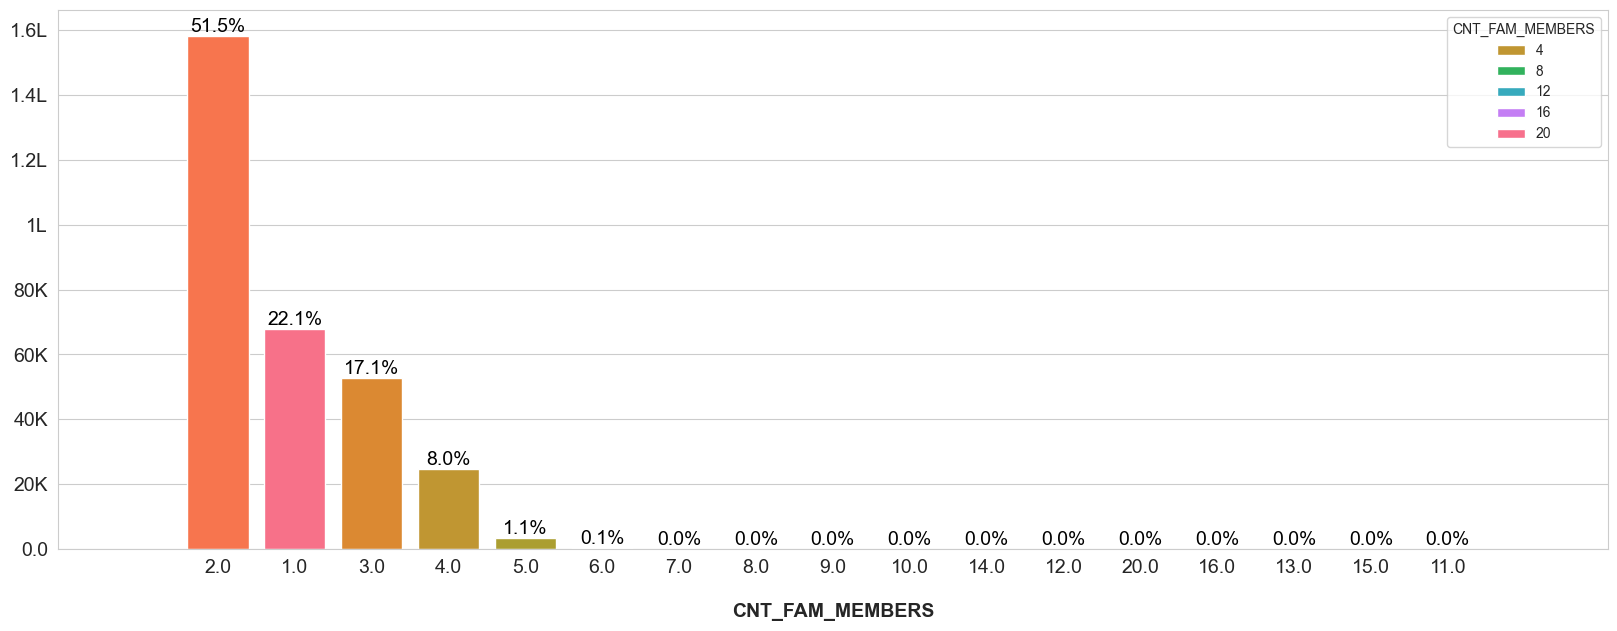

In [399]:
# Create count plot
prepare_count_plot(application_data, 'CNT_FAM_MEMBERS')

Identifying relation between the number of family member and loan repayment status

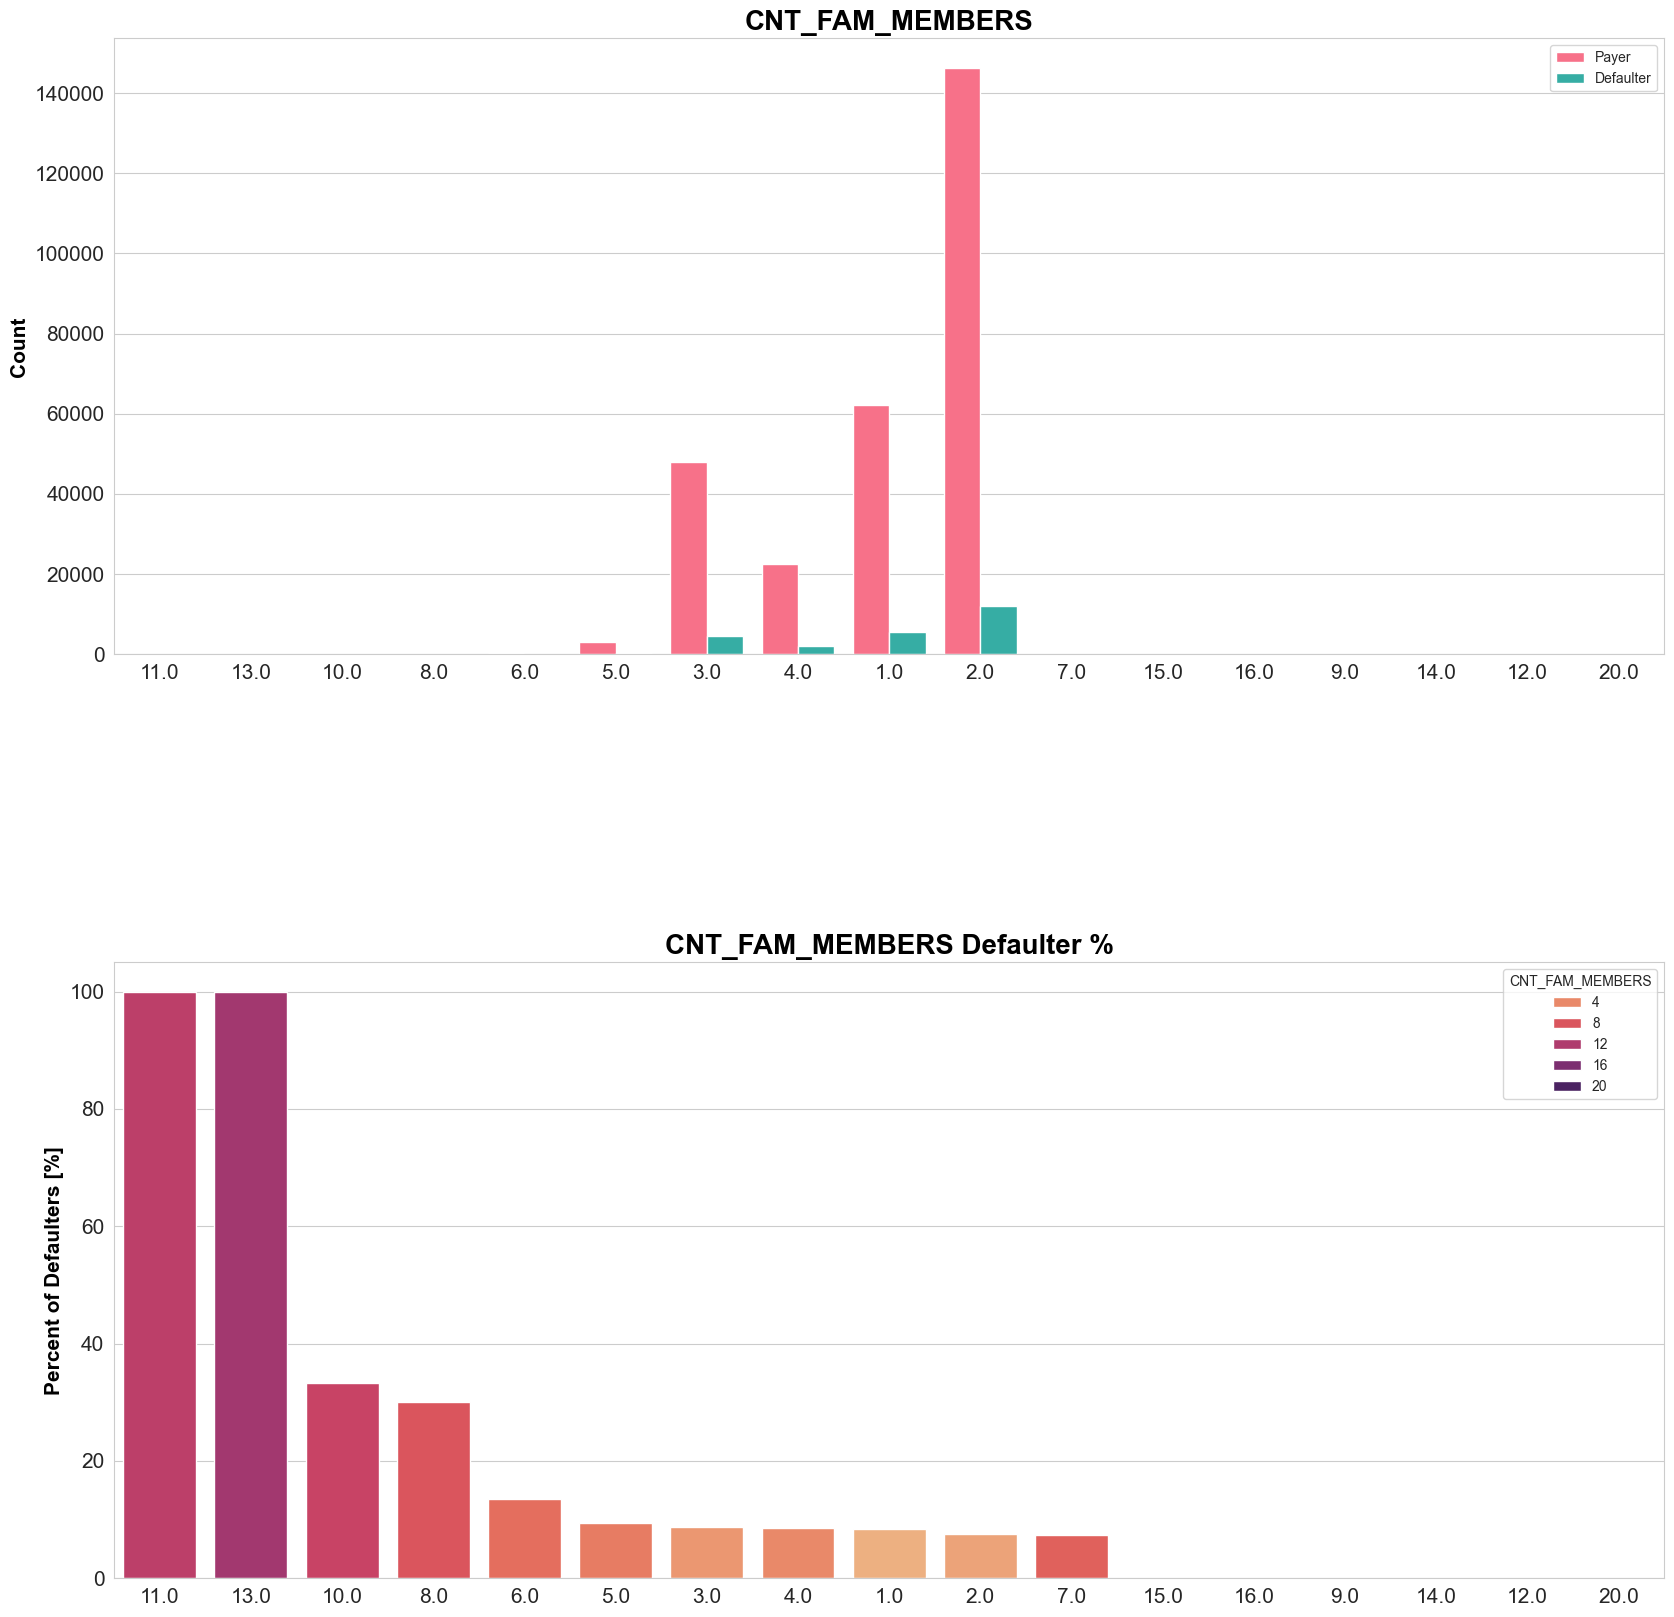

In [400]:
# Create count plots
univariate_categorical('CNT_FAM_MEMBERS', horizontal_layout=False)

**<u>Observation #18</u>**

- Similar to the one with children, the defaulter rate increases with the count of family members.

### 4.2.2. Categorical Multivariate Analysis
___

#### A. NAME_INCOME_TYPE and AMT_INCOME_TOTAL

In [401]:
# Creating a grouped datagrame of NAME_INCOME_TYPE and get is corresponding AMT_INCOME_TOTAL statistics
application_data.groupby(by=['NAME_INCOME_TYPE'], observed=True)['AMT_INCOME_TOTAL'].describe()

count      mean       std     min    25%     50%  \
NAME_INCOME_TYPE                                                            
Businessman               10.0  6.525000  6.272260  1.8000  2.250  4.9500   
Commercial associate   71617.0  2.029553  1.479742  0.2655  1.350  1.8000   
Maternity leave            5.0  1.404000  1.268569  0.4950  0.675  0.9000   
Pensioner              55362.0  1.364013  0.766503  0.2565  0.900  1.1700   
State servant          21703.0  1.797380  1.008806  0.2700  1.125  1.5750   
Student                   18.0  1.705000  1.066447  0.8100  1.125  1.5750   
Unemployed                22.0  1.105364  0.880551  0.2655  0.540  0.7875   
Working               158774.0  1.631699  3.075777  0.2565  1.125  1.3500   

                          75%        max  
NAME_INCOME_TYPE                          
Businessman           8.43750    22.5000  
Commercial associate  2.25000   180.0009  
Maternity leave       1.35000     3.6000  
Pensioner             1.66500    22.5000  
State servant         2.25000    31.5000  
Student               1.78875     5.6250  
Unemployed            1.35000     3.3750  
Working               2.02500  1170.0000

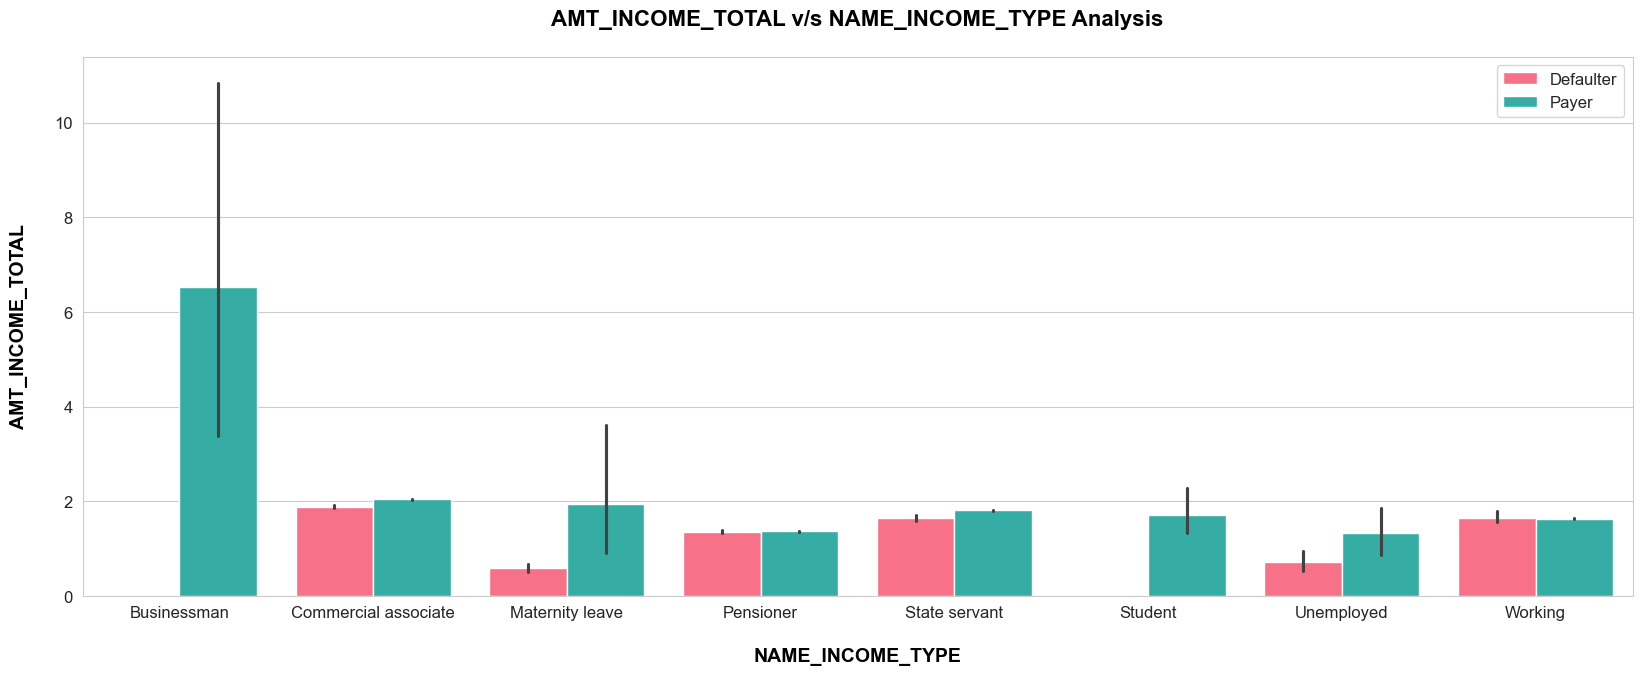

In [402]:
# Create a plot for NAME_INCOME_TYPE and AMT_INCOME_TOTAL
bivariate_bar('NAME_INCOME_TYPE', 'AMT_INCOME_TOTAL', application_data, 'TARGET', (20,7))

**<u>Observation #1</u>**

- Businessman's income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a businessman could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs.

#### B. CNT_FAM_MEMBERS and AMT_INCOME_TOTAL

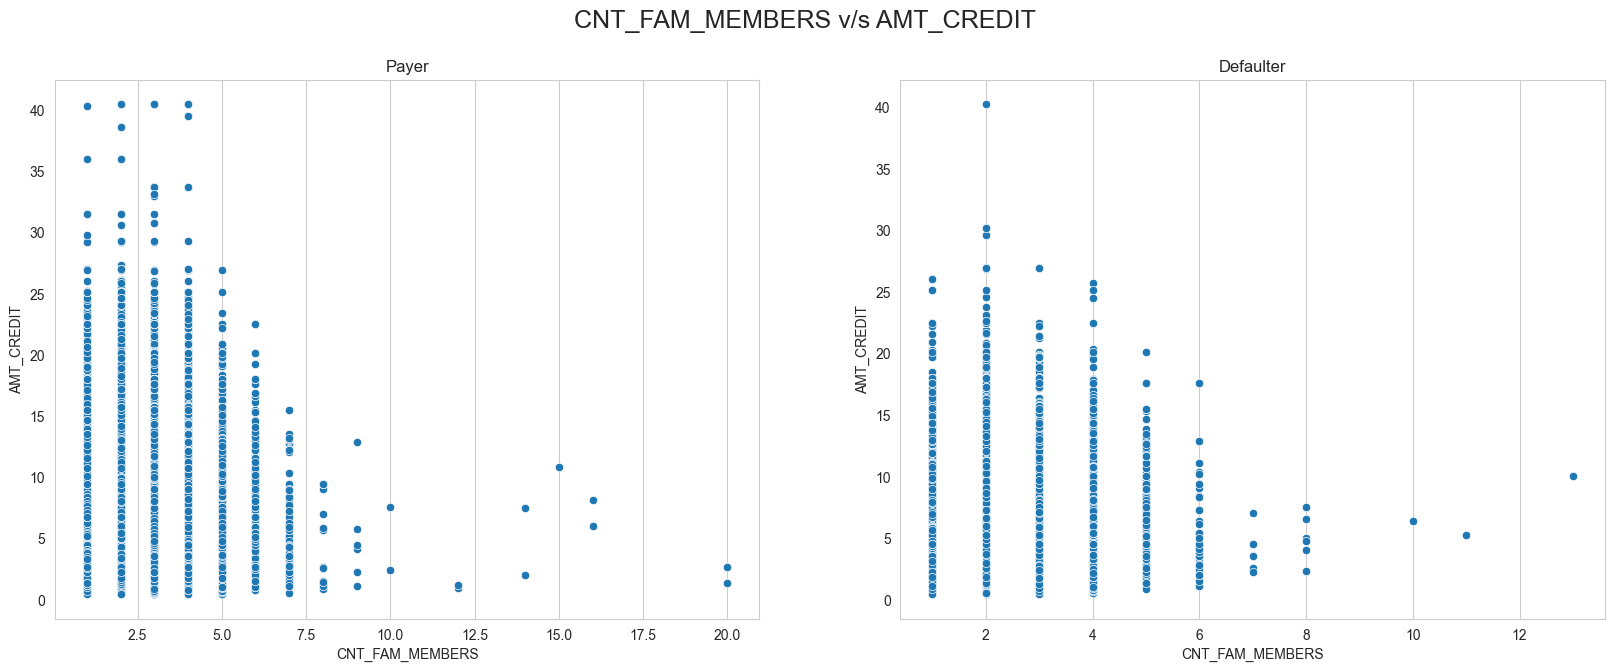

In [403]:
# Create a scatterplot for CNT_FAM_MEMBERS and AMT_CREDIT for Payers annd Defaulters
plt.figure(figsize=[20,7])

plt.suptitle("CNT_FAM_MEMBERS v/s AMT_CREDIT",fontsize=18)

plt.subplot(1,2,1)
sns.scatterplot(data=target_0, x='CNT_FAM_MEMBERS', y='AMT_CREDIT')
plt.title("Payer")
plt.grid(axis='y')

plt.subplot(1,2,2)
sns.scatterplot(data=target_1, x='CNT_FAM_MEMBERS', y='AMT_CREDIT')
plt.grid(axis='y')
plt.title("Defaulter")

plt.show()

**<u>Observation #1</u>**

- Applicants with larger family size but less Amount credit are less likely to default.
- Applicants with higher Amount credit but smaller family size are less likely to default.

#### C. AMT_ variables

In [404]:
# Amount related columns to check
get_similar_columns(application_data, col_name_to_filter='AMT_').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE'],
      dtype='object')

In [405]:
# Specific Amount related columns to check
columns_to_check = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE']

Plotting pairplot between amount variable

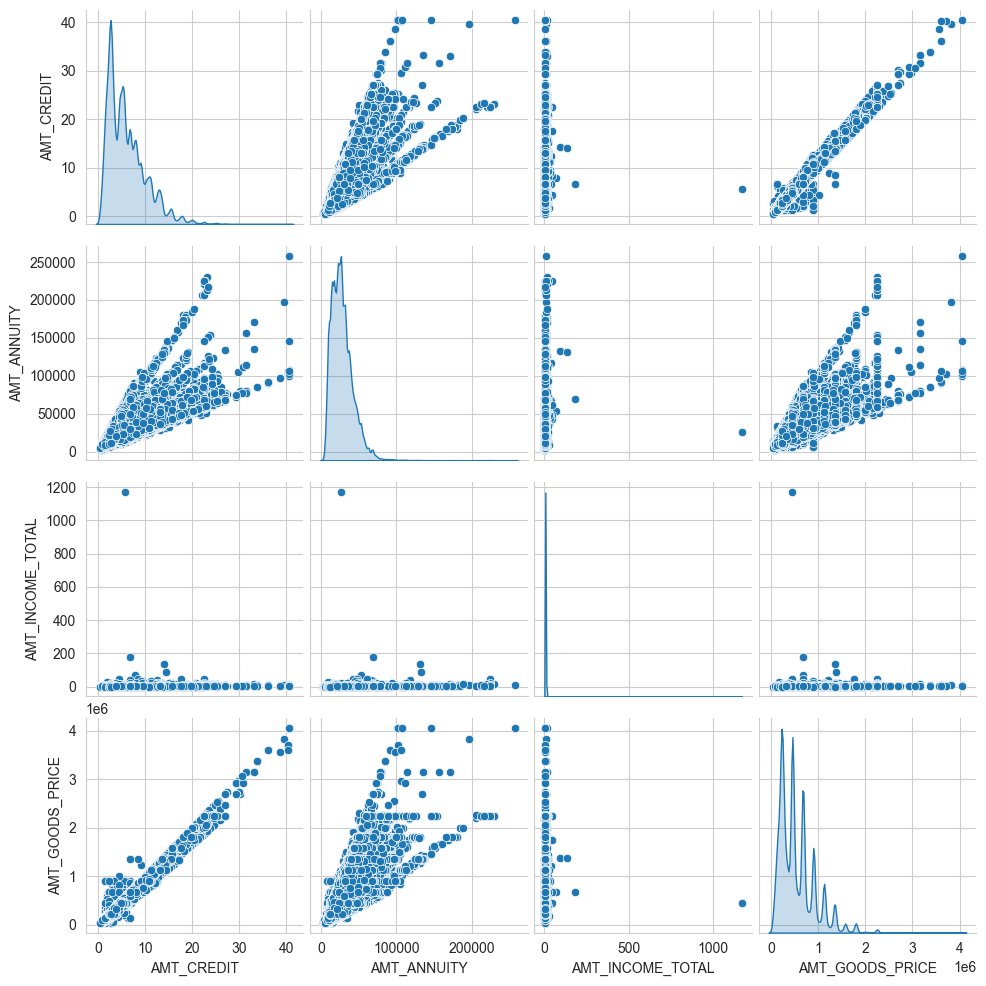

In [406]:
# Create a Pair plot for the specific Amount related columns
sns.pairplot(application_data[columns_to_check], diag_kind="kde")
plt.show()

Check correlation

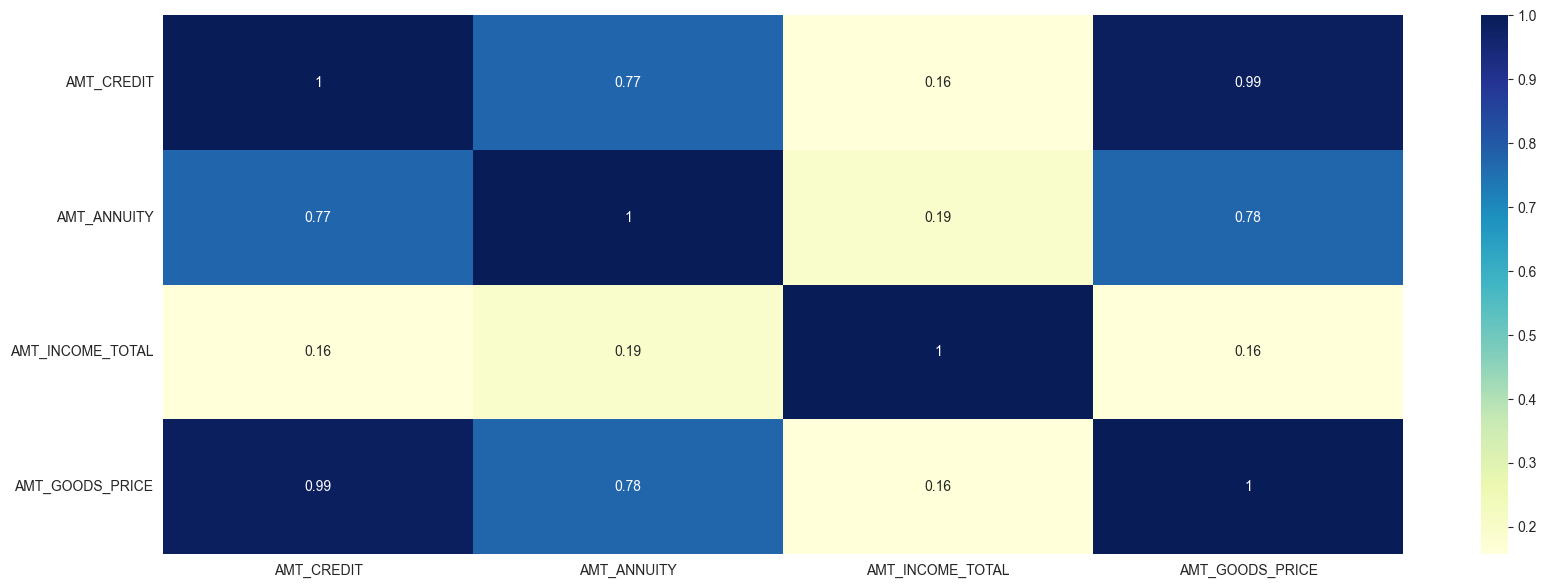

In [407]:
# Create a Heatmap for specific Amount related columns
plt.figure(figsize=[20,7])
sns.heatmap(application_data[columns_to_check].corr(), annot=True, cmap ="YlGnBu")
plt.show()

**<u>Observation #1</u>**

- There is a high linear co-relation between AMT_CREDIT and AMT_GOODS_PRICE.

## 4.3. Numerical Variable Analysis
___
___

### 4.3.1 Multivariate Analysis
___

Bifurcating the application_data dataframe based on Target value 0 and 1 for correlation and other analysis

In [408]:
# Get column list in Application Data
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

Bifurcating the application_data dataframe based on Target value 0 and 1 for correlation and other analysis

In [409]:
# Getting all numerical type columns in application_data
columns_to_check = application_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

#### A. Payers

In [410]:
# Payers
df_payer = application_data[application_data['TARGET'] == 0][columns_to_check]

Getting the Top 20 correlation in data amongst the Payers

In [411]:
df_payer.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1      100003       0             0             2.700   12.935025   
2      100004       0             0             0.675    1.350000   
3      100006       0             0             1.350    3.126825   
4      100007       0             0             1.215    5.130000   
5      100008       0             0             0.990    4.904955   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
1      35698.5        1129500.0                    0.003541       16765   
2       6750.0         135000.0                    0.010032       19046   
3      29686.5         297000.0                    0.008019       19005   
4      21865.5         513000.0                    0.028663       19932   
5      27517.5         454500.0                    0.035792       16941   

   DAYS_EMPLOYED  ...  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
1           1188  ...                 0                 0   
2            225  ...                 0                 0   
3           3039  ...                 0                 0   
4           3038  ...                 0                 0   
5           1588  ...                 0                 0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   
5                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   
5                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE  YEARS_EMPLOYED  
1                        0.0                         0.0   45               3  
2                        0.0                         0.0   52               0  
3                        0.0                         0.0   52               8  
4                        0.0                         0.0   54               8  
5                        1.0                         1.0   46               4  

[5 rows x 56 columns]

In [412]:
# Creating a dataframe to show correlation amongst each feature for df_payer
corr_payer = df_payer.corr()
corr_payer = corr_payer.where(np.triu(np.ones(corr_payer.shape), k=1).astype(bool))

corr_payer = corr_payer.unstack().reset_index()
corr_payer.columns =['VAR1','VAR2','correlation']
corr_payer.dropna(subset = ["correlation"], inplace = True)
corr_payer["correlation"] = corr_payer["correlation"].abs()
corr_payer.sort_values(by='correlation', ascending=False, inplace=True)
corr_payer.head(20)

VAR1                      VAR2  correlation
3089            YEARS_EMPLOYED             DAYS_EMPLOYED     1.000000
737             FLAG_EMP_PHONE             DAYS_EMPLOYED     0.999756
3093            YEARS_EMPLOYED            FLAG_EMP_PHONE     0.999756
3032                       AGE                DAYS_BIRTH     0.999711
1423  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998508
340            AMT_GOODS_PRICE                AMT_CREDIT     0.987250
1010           CNT_FAM_MEMBERS              CNT_CHILDREN     0.878571
1480  DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.859332
341            AMT_GOODS_PRICE               AMT_ANNUITY     0.776686
284                AMT_ANNUITY                AMT_CREDIT     0.771309
3088            YEARS_EMPLOYED                DAYS_BIRTH     0.626114
512              DAYS_EMPLOYED                DAYS_BIRTH     0.626114
3134            YEARS_EMPLOYED                       AGE     0.626028
3033                       AGE             DAYS_EMPLOYED     0.626028
736             FLAG_EMP_PHONE                DAYS_BIRTH     0.622073
3037                       AGE            FLAG_EMP_PHONE     0.621989
1801           FLAG_DOCUMENT_6             DAYS_EMPLOYED     0.596277
3112            YEARS_EMPLOYED           FLAG_DOCUMENT_6     0.596276
1805           FLAG_DOCUMENT_6            FLAG_EMP_PHONE     0.596060
1821           FLAG_DOCUMENT_6           FLAG_DOCUMENT_3     0.486422

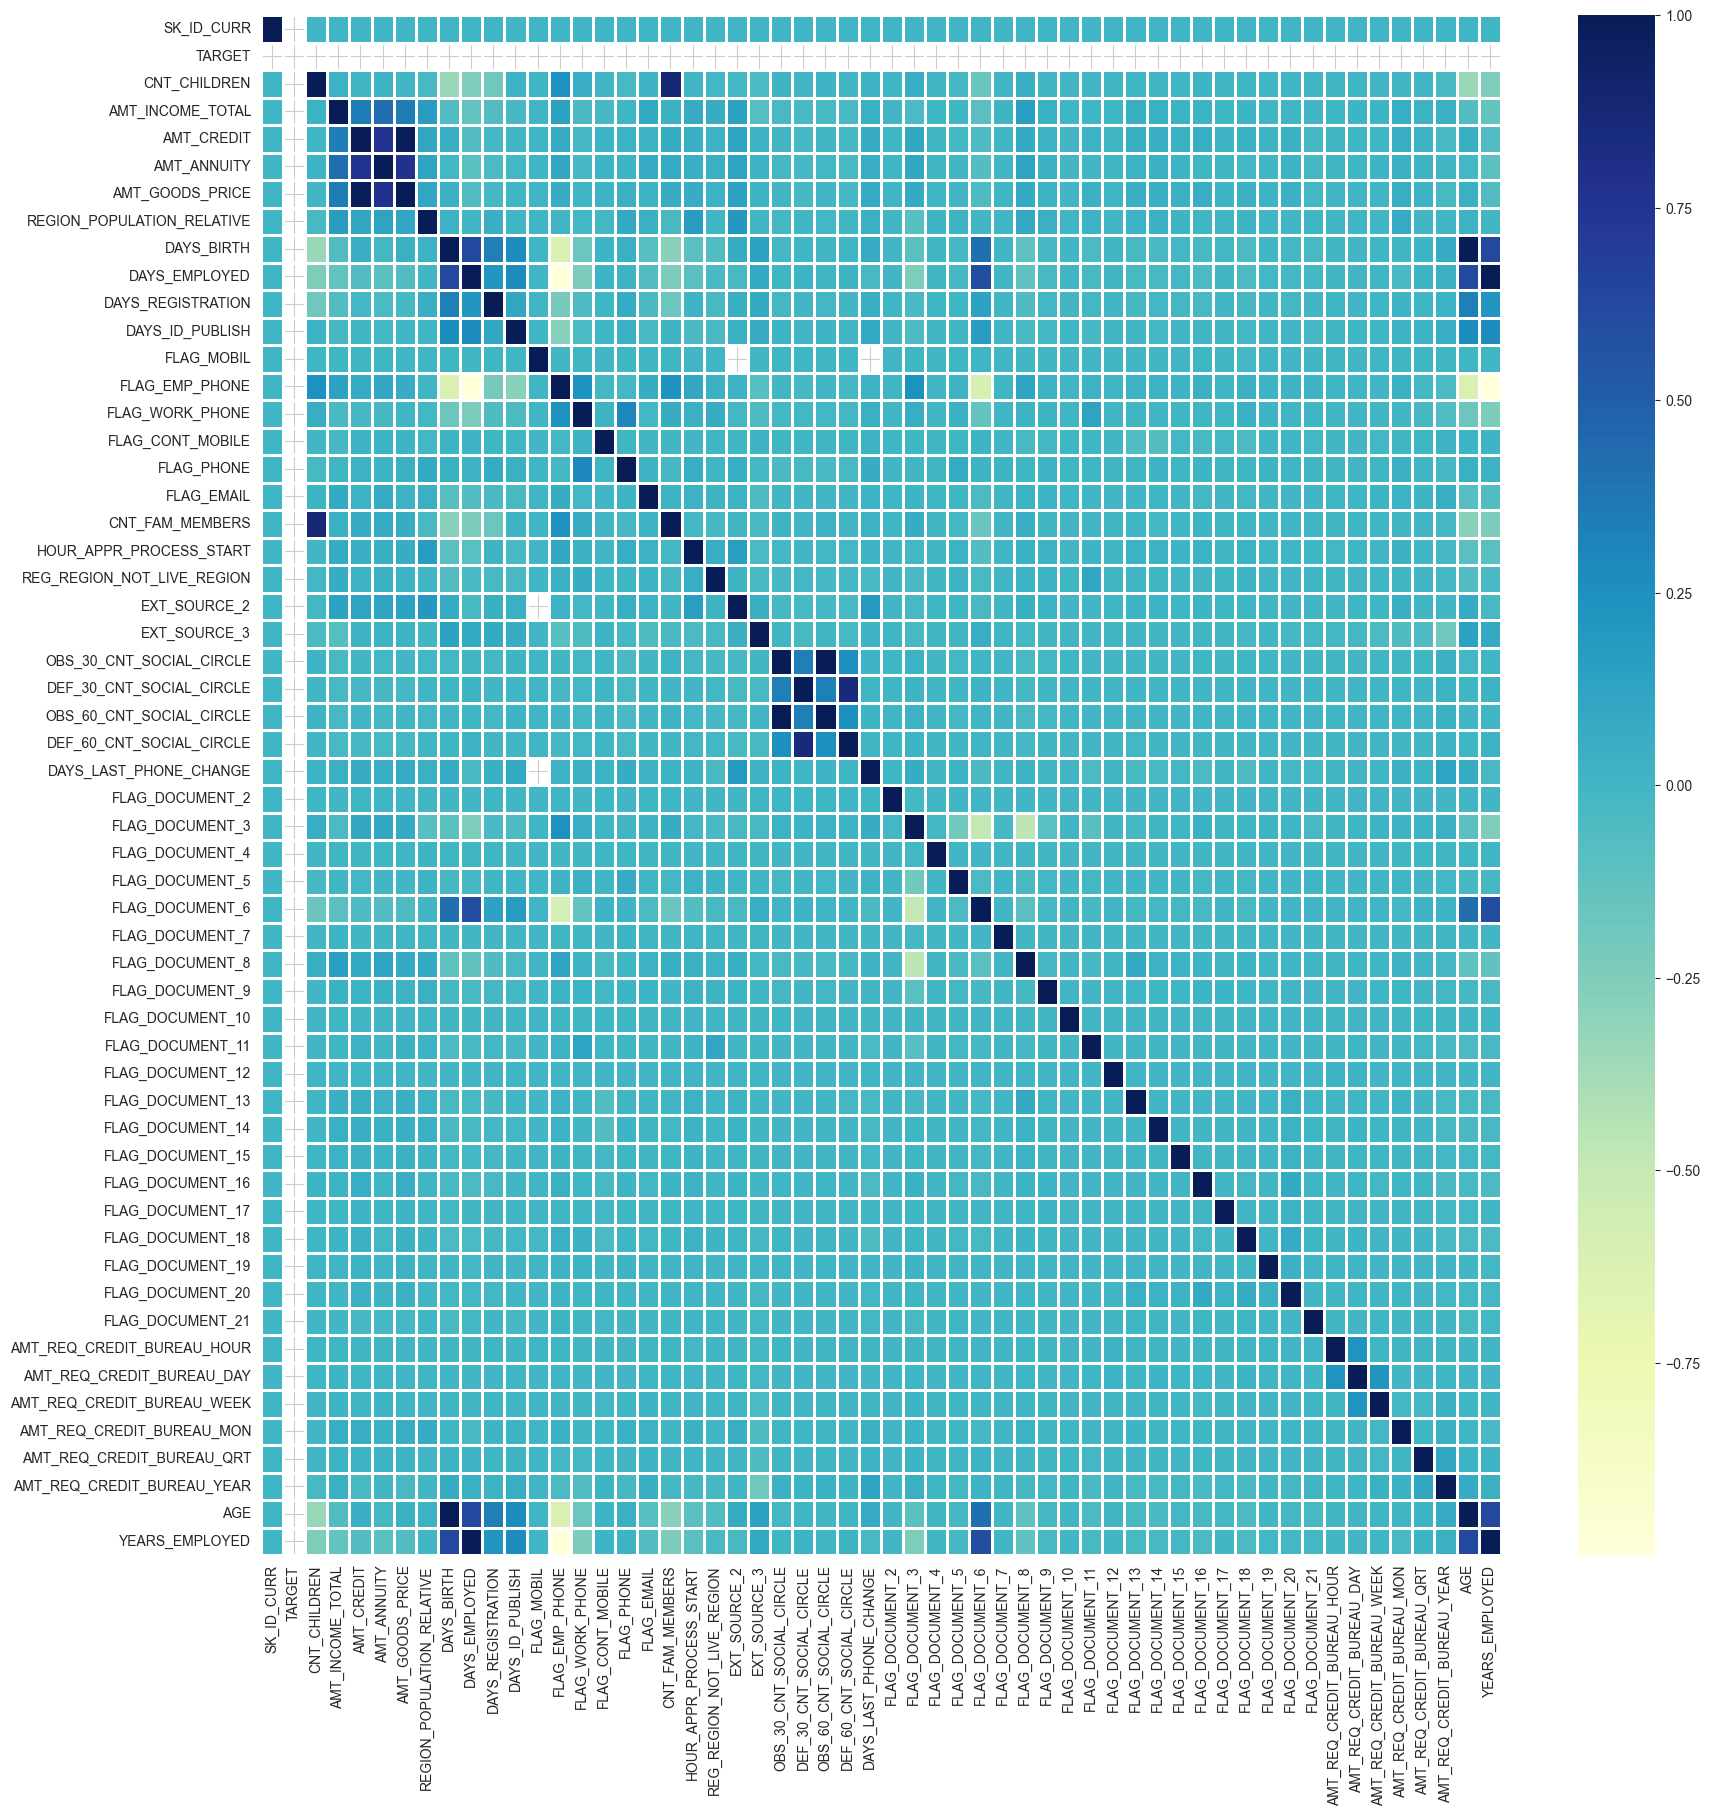

In [413]:
# Creating a Heat Map for each and every numerical column in the dataframe
plt.figure(figsize=(20,20))
sns.heatmap(df_payer.corr(), cmap="YlGnBu", annot=False, linewidth =1)
plt.show()

**<u>Observation #1</u>**

- Amongst the payers, there seems to be a high correlation of the Credit amount with the Loan Annuity, Total Income and Goods price.
- Also, we could see a high correlation with the number of Days/Years employed i.e. Experience and Days birth i.e. Age

#### B. Defaulters

In [414]:
# Defaulters
df_defaulter = application_data[application_data['TARGET'] == 1][columns_to_check]

Getting the Top 20 correlation in data amongst the Defaulters

In [415]:
df_defaulter.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0       100002       1             0             2.025    4.065975   
26      100031       1             0             1.125    9.799920   
40      100047       1             0             2.025   11.935800   
42      100049       1             0             1.350    2.888730   
81      100096       1             0             0.810    2.520000   

    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       24700.5         351000.0                    0.018801        9461   
26      27076.5         702000.0                    0.018029       18724   
40      35028.0         855000.0                    0.025164       17482   
42      16258.5         238500.0                    0.007305       13384   
81      14593.5         252000.0                    0.028663       24794   

    DAYS_EMPLOYED  ...  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0             637  ...                 0                 0   
26           2628  ...                 0                 0   
40           1262  ...                 0                 0   
42           3597  ...                 0                 0   
81         365243  ...                 0                 0   

    AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                          0.0                        0.0   
26                         0.0                        0.0   
40                         0.0                        0.0   
42                         0.0                        0.0   
81                         0.0                        0.0   

    AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                          0.0                        0.0   
26                         0.0                        0.0   
40                         0.0                        2.0   
42                         0.0                        0.0   
81                         0.0                        0.0   

    AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE  YEARS_EMPLOYED  
0                         0.0                         1.0   25               1  
26                        2.0                         2.0   51               7  
40                        0.0                         4.0   47               3  
42                        0.0                         2.0   36               9  
81                        0.0                         0.0   67            1000  

[5 rows x 56 columns]

In [416]:
# Creating a correlation table
corr_defaulter = df_defaulter.corr()
corr_defaulter = corr_defaulter.where(np.triu(np.ones(corr_defaulter.shape), k=1).astype(bool))

corr_defaulter = corr_defaulter.unstack().reset_index()
corr_defaulter.columns =['VAR1','VAR2','correlation']
corr_defaulter.dropna(subset = ["correlation"], inplace = True)
corr_defaulter["correlation"] = corr_defaulter["correlation"].abs()
corr_defaulter.sort_values(by='correlation', ascending=False, inplace=True)
corr_defaulter.head(20)

VAR1                      VAR2  correlation
3089            YEARS_EMPLOYED             DAYS_EMPLOYED     1.000000
737             FLAG_EMP_PHONE             DAYS_EMPLOYED     0.999705
3093            YEARS_EMPLOYED            FLAG_EMP_PHONE     0.999705
3032                       AGE                DAYS_BIRTH     0.999691
1423  OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE     0.998269
340            AMT_GOODS_PRICE                AMT_CREDIT     0.983103
1010           CNT_FAM_MEMBERS              CNT_CHILDREN     0.885484
1480  DEF_60_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE     0.868994
341            AMT_GOODS_PRICE               AMT_ANNUITY     0.752699
284                AMT_ANNUITY                AMT_CREDIT     0.752195
1801           FLAG_DOCUMENT_6             DAYS_EMPLOYED     0.617646
3112            YEARS_EMPLOYED           FLAG_DOCUMENT_6     0.617646
1805           FLAG_DOCUMENT_6            FLAG_EMP_PHONE     0.617421
3134            YEARS_EMPLOYED                       AGE     0.582443
3033                       AGE             DAYS_EMPLOYED     0.582441
3088            YEARS_EMPLOYED                DAYS_BIRTH     0.582187
512              DAYS_EMPLOYED                DAYS_BIRTH     0.582185
3037                       AGE            FLAG_EMP_PHONE     0.578783
736             FLAG_EMP_PHONE                DAYS_BIRTH     0.578519
1933           FLAG_DOCUMENT_8           FLAG_DOCUMENT_3     0.528927

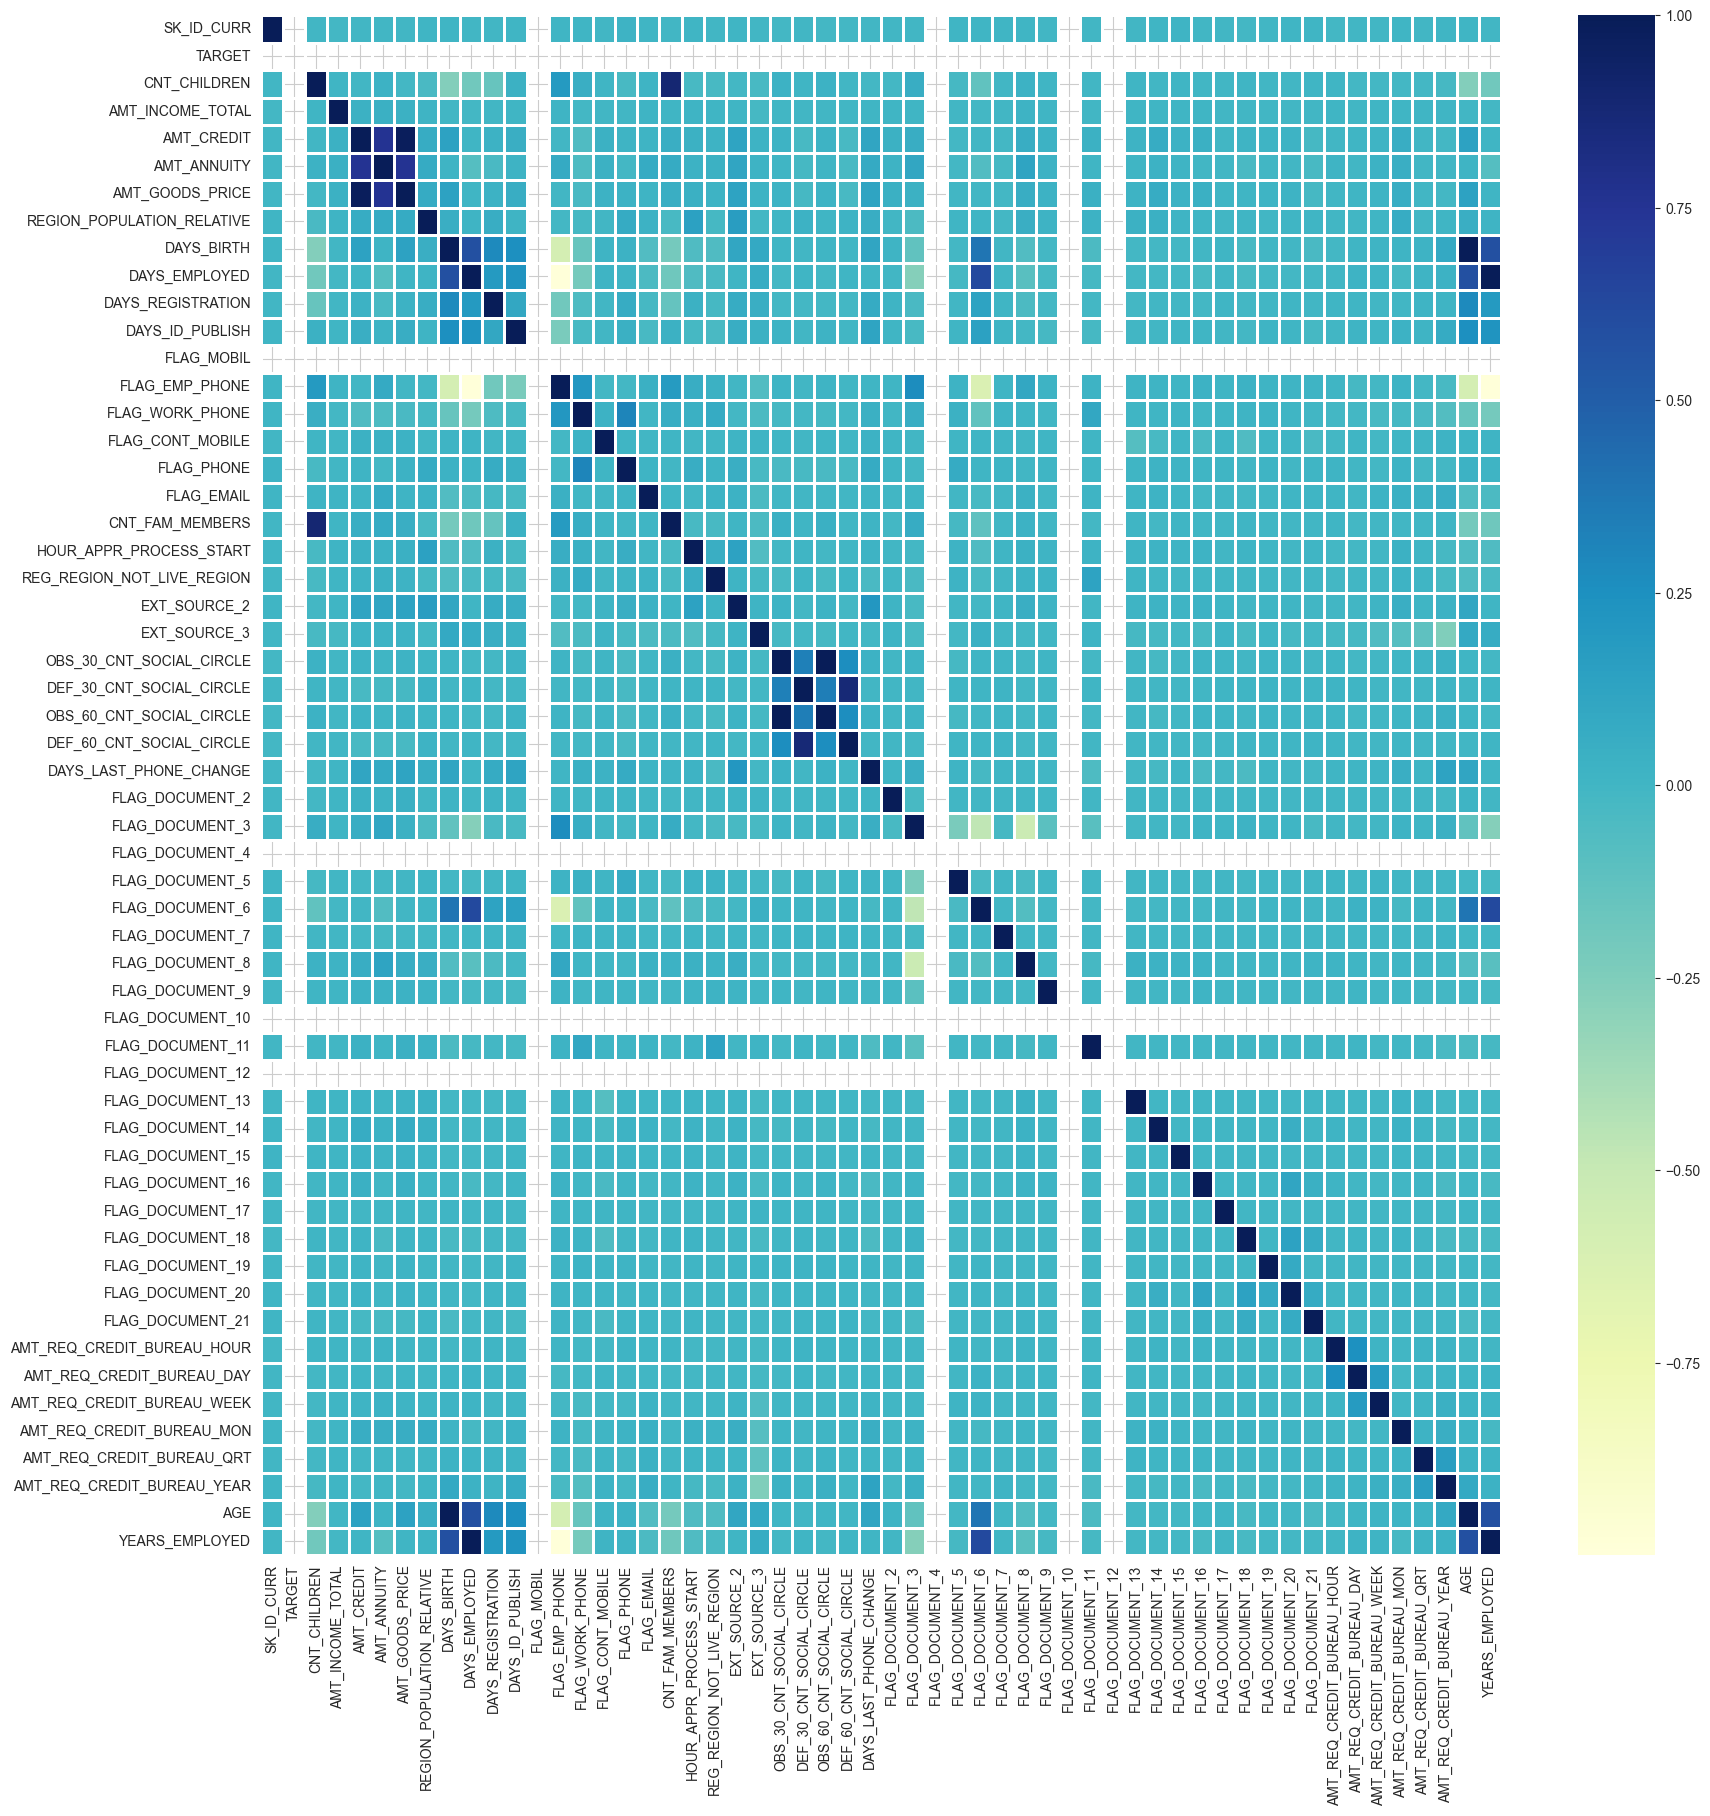

In [417]:
# Creating a Heat Map for each and every numerical column in the dataframe
plt.figure(figsize=(20,20))
sns.heatmap(df_defaulter.corr(), cmap="YlGnBu", annot=False, linewidth=1)
plt.show()

In [418]:
check_relation('AMT_CREDIT', 'AMT_GOODS_PRICE')

	Correlation between AMT_CREDIT and AMT_GOODS_PRICE for Payers 
							 0.987 
################################################################# 
Correlation between AMT_CREDIT and AMT_GOODS_PRICE for Defaulters 
							 0.983 


**<u>Observation #1</u>**

Even amongst the defaulters, there seems to be a high correlation of the Credit amount with the Goods price.

In [419]:
check_relation('AMT_ANNUITY', 'AMT_CREDIT')

	Correlation between AMT_ANNUITY and AMT_CREDIT for Payers 
							 0.771 
################################################################# 
Correlation between AMT_ANNUITY and AMT_CREDIT for Defaulters 
							 0.752 


**<u>Observation #2</u>**

However, the amount annuity correlation with the credit amount has slightly reduced for defaulters with 0.75 when compared to Payers with 0.77.

In [420]:
check_relation('AMT_CREDIT', 'AMT_INCOME_TOTAL')

	Correlation between AMT_CREDIT and AMT_INCOME_TOTAL for Payers 
							 0.343 
################################################################# 
Correlation between AMT_CREDIT and AMT_INCOME_TOTAL for Defaulters 
							 0.038 


**<u>Observation #3</u>**

For defaulters, the correlation between Credit Amount and Income has severely dropped to 0.0381 when compared with 0.3428 for Payers.

In [421]:
check_relation('DAYS_BIRTH', 'CNT_CHILDREN')

	Correlation between DAYS_BIRTH and CNT_CHILDREN for Payers 
							 0.337 
################################################################# 
Correlation between DAYS_BIRTH and CNT_CHILDREN for Defaulters 
							 0.259 


**<u>Observation #4</u>**

Correlation between Days since birth and count of children has reduced to 0.259 for defaulters when compared with 0.34 of Payers.

In [422]:
check_relation('OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE')

	Correlation between OBS_30_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE for Payers 
							 0.329 
################################################################# 
Correlation between OBS_30_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE for Defaulters 
							 0.334 


In [423]:
check_relation('OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE')

	Correlation between OBS_60_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE for Payers 
							 0.255 
################################################################# 
Correlation between OBS_60_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE for Defaulters 
							 0.264 


**<u>Observation #5</u>**

There is a slight increase in defaulted to observed count in social circle among defaulters (0.264) when compared to payers (0.255)

### 4.3.2. Univariate Analysis
___

Plotting a distribution plot of the numerical columns related to amount

In [424]:
# Speciic Amount related columns to check
columns_to_check = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

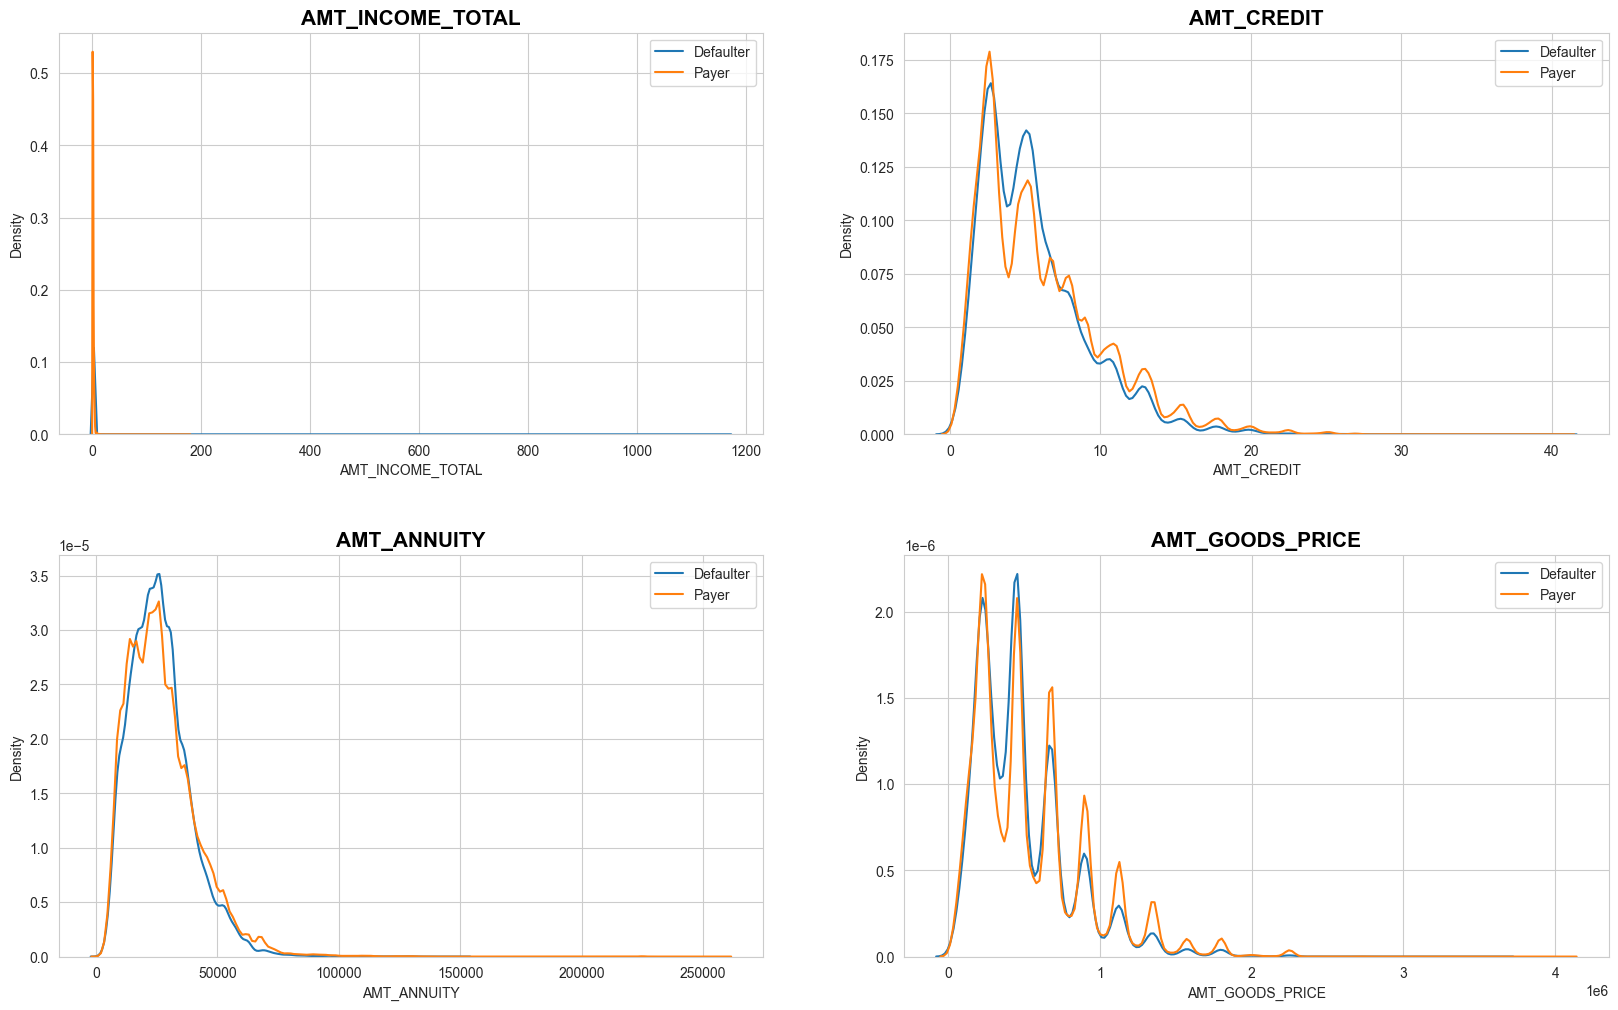

In [425]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = application_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

plt.figure(figsize=(20, 12))

for i in enumerate(amount):
    plt.subplot(2, 2, i[0]+1)
    sns.kdeplot(df_defaulter[i[1]], label='Defaulter')
    sns.kdeplot(df_payer[i[1]], label='Payer')
    
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight': 'bold', 'color': 'Black'})

    plt.legend()

# Adjust the space between the rows
plt.subplots_adjust(hspace = 0.3)

plt.show()

**<u>Observation #1</u>**

- The majority of loans are granted for things worth less than 10 lacs.
- The majority of customers pay an annuity of less than fifty thousand for loans.
- The re-payers and defaulters distributions overlap in all graphs, thus we cannot make a choice based on any of these variables alone.

### 4.3.3. Bivariate Analysis
___

Examining the relationship between the price of goods and credit and comparing it to loan repayment status

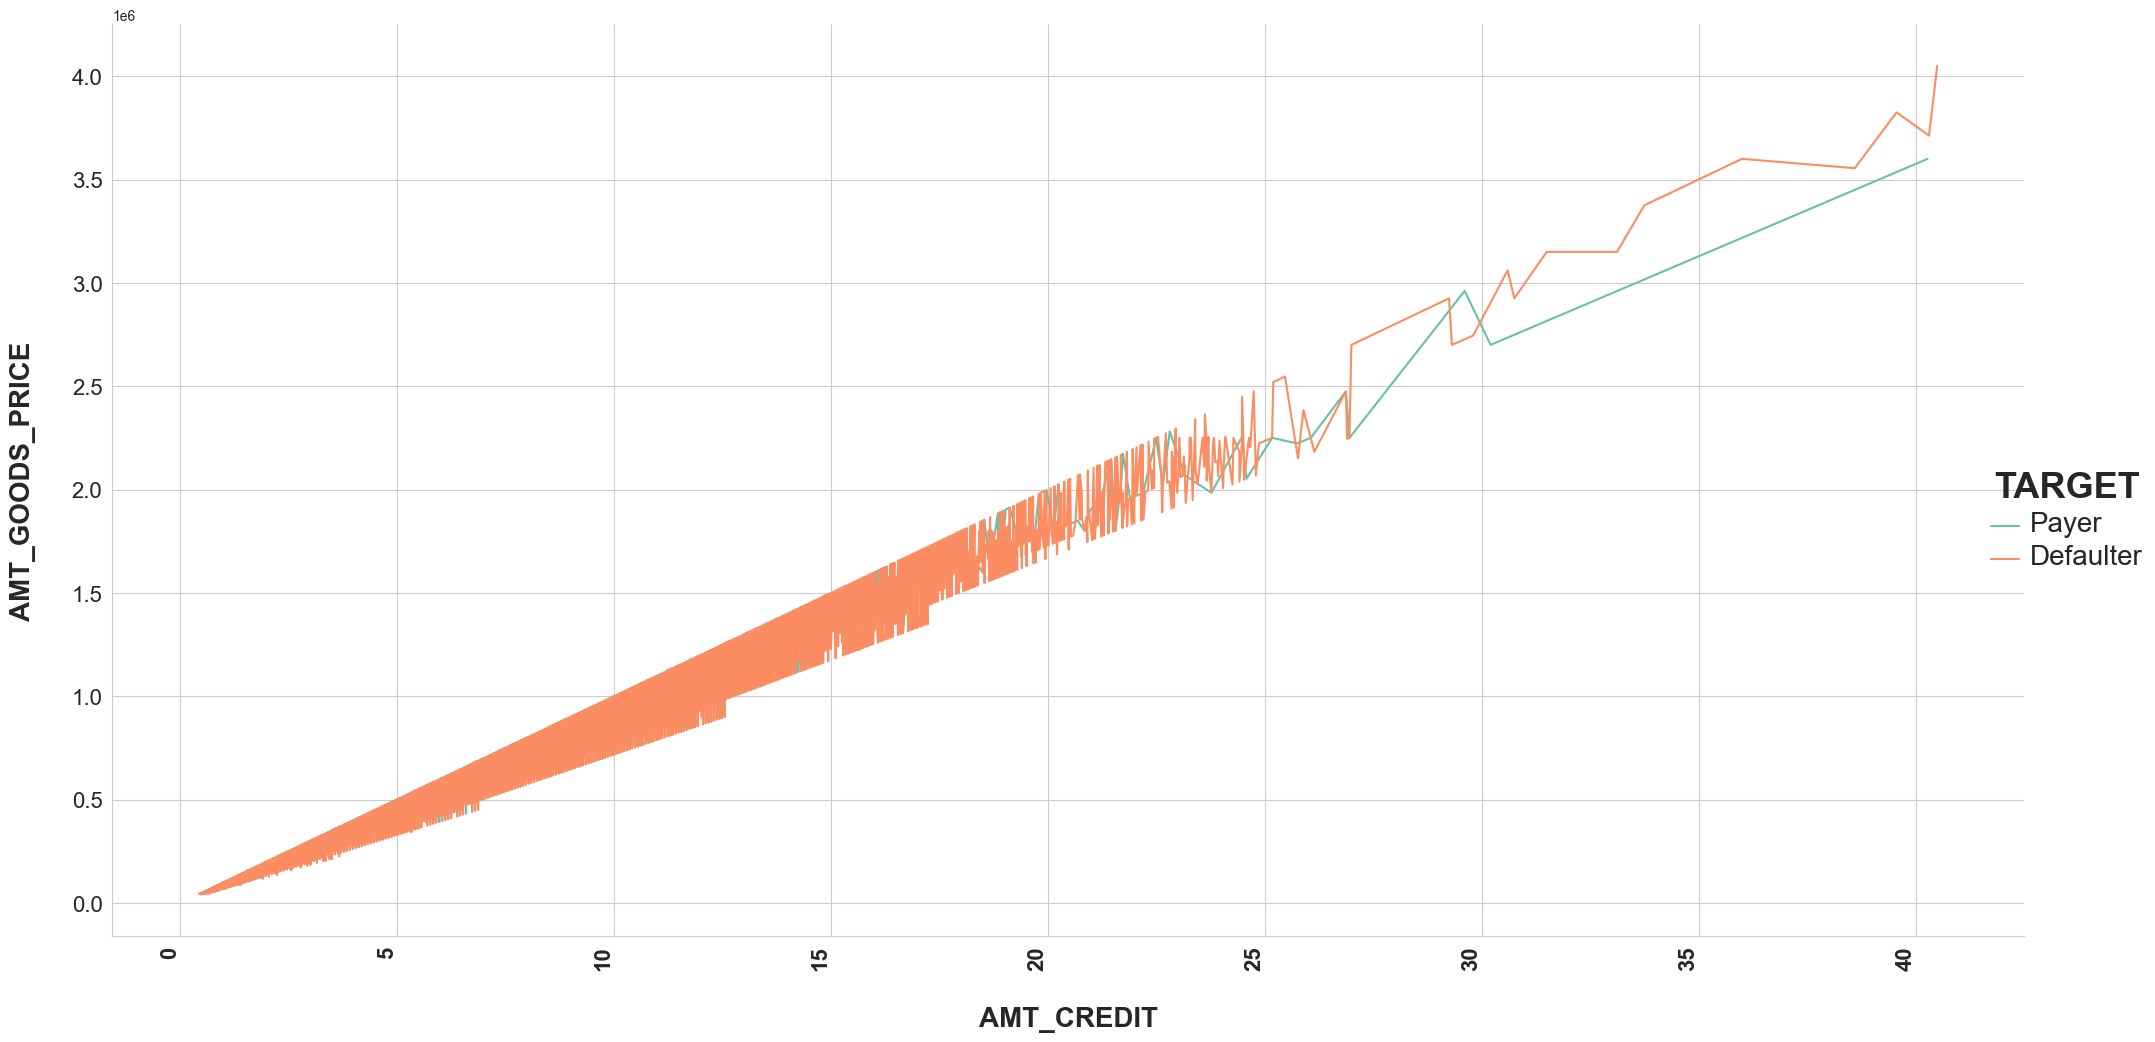

In [426]:
# Plot between AMT_CREDIT and AMT_GOODS_PRICE
bivariate_rel(x='AMT_CREDIT', y='AMT_GOODS_PRICE', data=application_data, hue='TARGET', kind='line', palette='Set2', figsize=(20, 10))

**<u>Observation #1</u>**

As per the chart, when the credit amount goes beyond 3M, there is an increase in the defaulters.

Plotting Pairplots between Amount variables and Target

In [427]:
# Checking the value
columns_to_check

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

In [428]:
# Appending TARGET
columns_to_check.append('TARGET')

Checking columns with null values

In [429]:
application_data[columns_to_check].isnull().sum()

AMT_INCOME_TOTAL      0
AMT_CREDIT            0
AMT_ANNUITY          12
AMT_GOODS_PRICE     278
TARGET                0
dtype: int64

In [430]:
# Dropping NaN rows and saving to amount_target
amount_target = application_data[columns_to_check].dropna().copy()

In [431]:
# Checking the revised null count
amount_target.isnull().sum()

AMT_INCOME_TOTAL    0
AMT_CREDIT          0
AMT_ANNUITY         0
AMT_GOODS_PRICE     0
TARGET              0
dtype: int64

<Figure size 2000x1200 with 0 Axes>

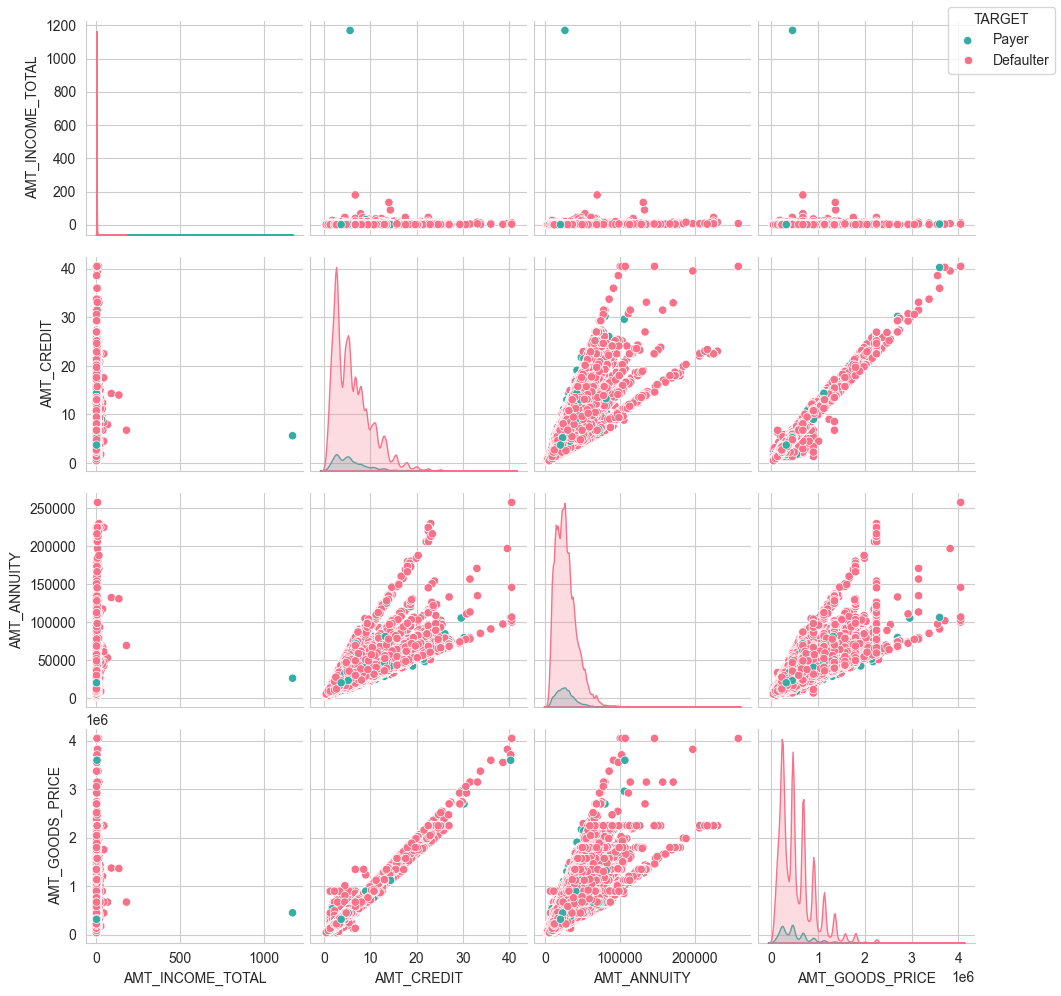

In [432]:
# Creating a Pair Plot for the specified columns w.r.t. Target
plt.figure(figsize=(20, 12))

ax=sns.pairplot(amount_target, hue='TARGET', palette='husl')

# Remove the autogenerated legend
ax._legend.remove()
ax.fig.legend(labels=['Payer', 'Defaulter'], title='TARGET', loc='upper right')

plt.show()

**<u>Observation #1</u>**

- There are fewer defaulters when amt_annuity > 15000 and amt_goods_price > 3M.
- AMT_CREDIT and AMT_GOODS_PRICE are significantly connected, as shown by the scatterplot, where most of the data is consolidated in the form of a line.

## 4.4. Merged Data Analysis
___
___

Merging Application and Previous application data on SK_ID_CURR

In [433]:
merged_df = pd.merge(application_data, previous_application, how='inner', on='SK_ID_CURR')
merged_df

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0            100002       1           Cash loans           M            N   
1            100003       0           Cash loans           F            N   
2            100003       0           Cash loans           F            N   
3            100003       0           Cash loans           F            N   
4            100004       0      Revolving loans           M            Y   
...             ...     ...                  ...         ...          ...   
1413696      456255       0           Cash loans           F            N   
1413697      456255       0           Cash loans           F            N   
1413698      456255       0           Cash loans           F            N   
1413699      456255       0           Cash loans           F            N   
1413700      456255       0           Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                     Y             0             2.025      4.065975   
1                     N             0             2.700     12.935025   
2                     N             0             2.700     12.935025   
3                     N             0             2.700     12.935025   
4                     Y             0             0.675      1.350000   
...                 ...           ...               ...           ...   
1413696               N             0             1.575      6.750000   
1413697               N             0             1.575      6.750000   
1413698               N             0             1.575      6.750000   
1413699               N             0             1.575      6.750000   
1413700               N             0             1.575      6.750000   

         AMT_ANNUITY_x  ...   NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0              24700.5  ...              Vehicles            POS   
1              35698.5  ...                   XNA           Cash   
2              35698.5  ...             Furniture            POS   
3              35698.5  ...  Consumer Electronics            POS   
4               6750.0  ...                Mobile            POS   
...                ...  ...                   ...            ...   
1413696        49117.5  ...                   XNA           Cash   
1413697        49117.5  ...                   XNA          Cards   
1413698        49117.5  ...                   XNA           Cash   
1413699        49117.5  ...                   XNA           Cash   
1413700        49117.5  ...             Computers            POS   

        NAME_PRODUCT_TYPE             CHANNEL_TYPE SELLERPLACE_AREA  \
0                     XNA                    Stone              500   
1                  x-sell  Credit and cash offices               -1   
2                     XNA                    Stone             1400   
3                     XNA             Country-wide              200   
4                     XNA         Regional / Local               30   
...                   ...                      ...              ...   
1413696            x-sell  Credit and cash offices               -1   
1413697           walk-in             Country-wide               20   
1413698           walk-in  Credit and cash offices               -1   
1413699            x-sell          AP+ (Cash loan)                6   
1413700               XNA             Country-wide               20   

         NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
0             Auto technology         24.0        low_normal   
1                         XNA         12.0        low_normal   
2                   Furniture          6.0            middle   
3        Consumer electronics         12.0            middle   
4                Connectivity          4.0            middle   
...                       ...          ...               ...   
1413696                   XNA         24.0            middle   
1413697          Connecti

Checking the shape of the merged dataframe

In [434]:
merged_df.shape

(1413701, 105)

Checking column info

In [435]:
merged_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 105 columns):
 #    Column                        Dtype   
---   ------                        -----   
 0    SK_ID_CURR                    int64   
 1    TARGET                        int64   
 2    NAME_CONTRACT_TYPE_x          category
 3    CODE_GENDER                   category
 4    FLAG_OWN_CAR                  category
 5    FLAG_OWN_REALTY               category
 6    CNT_CHILDREN                  int64   
 7    AMT_INCOME_TOTAL              float64 
 8    AMT_CREDIT_x                  float64 
 9    AMT_ANNUITY_x                 float64 
 10   AMT_GOODS_PRICE_x             float64 
 11   NAME_TYPE_SUITE               category
 12   NAME_INCOME_TYPE              category
 13   NAME_EDUCATION_TYPE           category
 14   NAME_FAMILY_STATUS            category
 15   NAME_HOUSING_TYPE             category
 16   REGION_POPULATION_RELATIVE    float64 
 17   DAYS_BIRTH               

Getting statistics for numerical columns

In [436]:
round(merged_df.describe(), 2)

SK_ID_CURR      TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
count  1413701.00  1413701.00    1413701.00        1413701.00    1413701.00   
mean    278481.29        0.09          0.40              1.73          5.88   
std     102811.79        0.28          0.72              1.99          3.85   
min     100002.00        0.00          0.00              0.26          0.45   
25%     189364.00        0.00          0.00              1.12          2.70   
50%     278992.00        0.00          0.00              1.58          5.08   
75%     367556.00        0.00          1.00              2.07          8.08   
max     456255.00        1.00         19.00           1170.00         40.50   

       AMT_ANNUITY_x  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  \
count     1413608.00         1412493.00                  1413701.00   
mean        27017.02          527718.59                        0.02   
std         13951.16          353246.49                        0.01   
min          1615.50           40500.00                        0.00   
25%         16821.00          238500.00                        0.01   
50%         24925.50          450000.00                        0.02   
75%         34542.00          679500.00                        0.03   
max        225000.00         4050000.00                        0.07   

       DAYS_BIRTH  DAYS_EMPLOYED  ...  SK_ID_PREV  AMT_ANNUITY_y  \
count  1413701.00     1413701.00  ...  1413701.00     1413701.00   
mean     16321.05       72663.47  ...  1922744.33       14840.32   
std       4344.56      143337.36  ...   532715.34       13163.70   
min       7489.00           0.00  ...  1000001.00           0.00   
25%      12739.00        1042.00  ...  1461346.00        7406.06   
50%      16044.00        2401.00  ...  1922698.00       11250.00   
75%      19980.00        6313.00  ...  2384012.00       16747.96   
max      25201.00      365243.00  ...  2845381.00      418058.14   

       AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y  \
count       1413701.00    1413700.00         1413701.00   
mean         175243.59     196354.09          185439.55   
std          293622.19     319481.25          288124.37   
min               0.00          0.00               0.00   
25%           19750.50      24880.50           45000.00   
50%           70870.50      80595.00           70875.00   
75%          180000.00     215640.00          180000.00   
max         5850000.00    4509688.50         5850000.00   

       HOUR_APPR_PROCESS_START_y  NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  \
count                 1413701.00              1413701.00     1413701.00   
mean                       12.48                    1.00         880.37   
std                         3.33                    0.06         783.54   
min                         0.00                    0.00           1.00   
25%                        10.00                    1.00         271.00   
50%                        12.00                    1.00         582.00   
75%                        15.00                    1.00        1313.00   
max                        23.00                    1.00        2922.00   

       SELLERPLACE_AREA  CNT_PAYMENT  
count        1413701.00   1413701.00  
mean             314.99        12.56  
std             7695.08        14.49  
min               -1.00         0.00  
25%               -1.00         0.00  
50%                4.00        10.00  
75%               85.00        18.00  
max          4000000.00        84.00  

[8 rows x 66 columns]

Bifurcating the merged dataset based on Target value 0 and 1 for correlation and other analysis

In [437]:
# Payers
payers_in_merged = merged_df[merged_df['TARGET'] == 0]

In [438]:
# Defaulters
defaulters_in_merged = merged_df[merged_df['TARGET'] == 1]

### A. Contract Status and Loan Purpose 

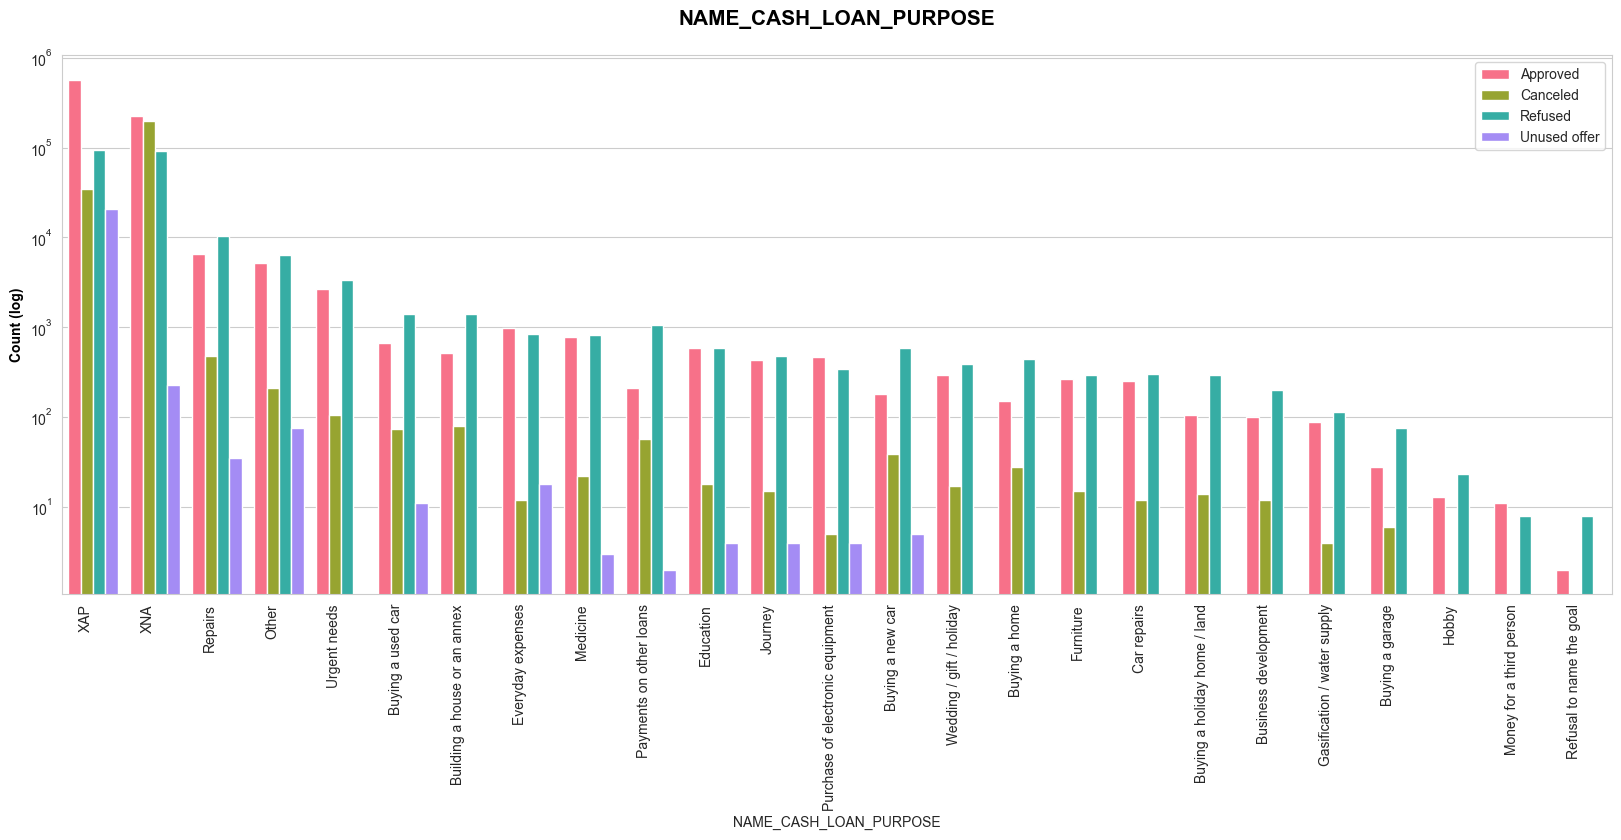

In [439]:
# Plotting count plot for payers in merged dataframe
univariate_merged(df=payers_in_merged, col="NAME_CASH_LOAN_PURPOSE", hue="NAME_CONTRACT_STATUS")

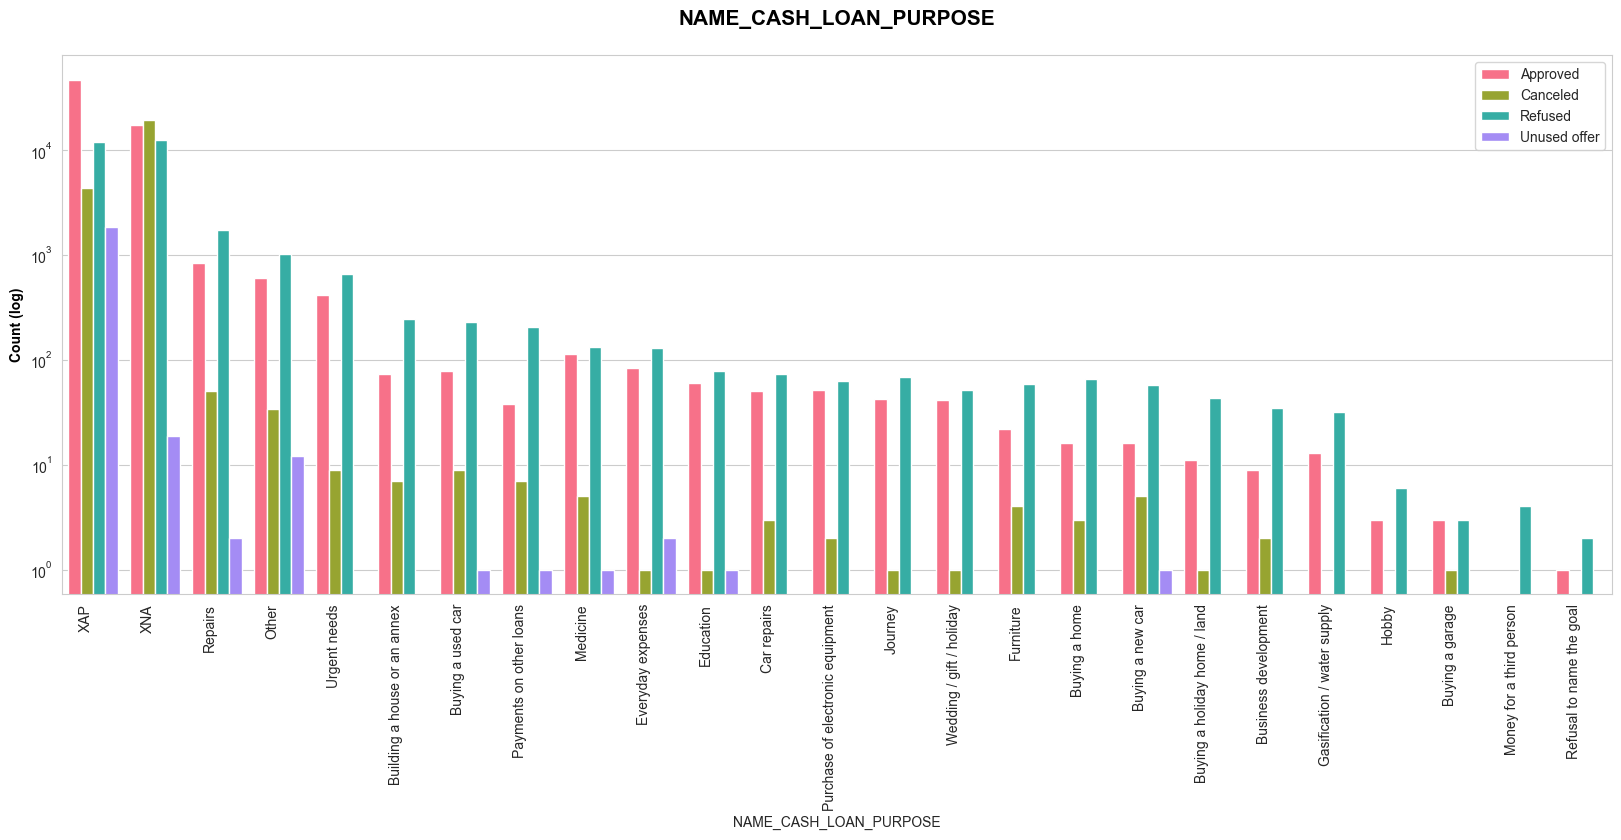

In [440]:
# Plotting count plot for defaulters in merged dataframe
univariate_merged(df=defaulters_in_merged, col="NAME_CASH_LOAN_PURPOSE", hue="NAME_CONTRACT_STATUS")

**<u>Observation #1</u>**

- Loan purpose has a high number of unknown values (XAP, XNA)
- Loan taken for repair appears to have the greatest default rate
 - A large number of applications with the intention of "repair or other" have been rejected by banks or declined by clients. This demonstrates that the bank considers the aim "repair" to be high risk, and they are either refused or provided very expensive loan interest rates, which the clients cannot afford, so they refuse the loan.

### B. Contract Status and Loan Status 

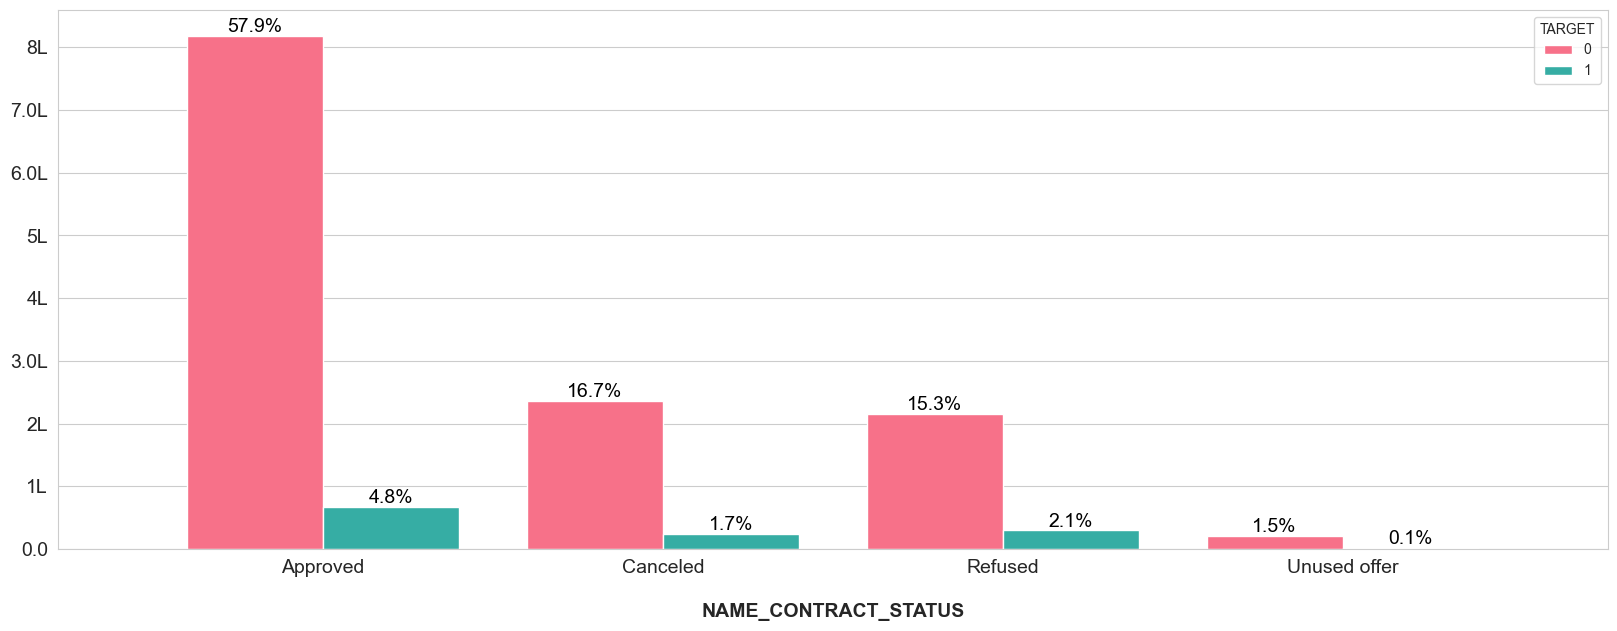

In [441]:
# Prepare a count plot
prepare_count_plot_dodged(df=merged_df, cols='NAME_CONTRACT_STATUS', hue='TARGET', dodge=True)

In [442]:
# Getting data by Contract Status
grouped_by_contract = merged_df.groupby(['NAME_CONTRACT_STATUS'], observed=True)['TARGET']

In [443]:
# Concatenating the value counts with percentage value counts in a single dataframe
grouped_by_contract = pd.concat([grouped_by_contract.value_counts(), grouped_by_contract.value_counts(normalize=True)*100], axis=1, keys=('Counts','Percentage'))

In [444]:
# Rounding the decimals to the last 2 digits in the Percentage column 
grouped_by_contract['Percentage'] = round(grouped_by_contract['Percentage'], 2)

In [445]:
# Display the dataframe
grouped_by_contract

Counts  Percentage
NAME_CONTRACT_STATUS TARGET                    
Approved             0       818856       92.41
                     1        67243        7.59
Canceled             0       235641       90.83
                     1        23800        9.17
Refused              0       215952       88.00
                     1        29438       12.00
Unused offer         0        20892       91.75
                     1         1879        8.25

**<u>Observation #1</u>**

- Interestingly 90% of clients, who had their loans cancelled previously, have actually repaid their loans. By reconsidering the interest rates, the bank could potentially create more business opportunities from these clients.
- 88% of the clients who were previously denied a loan have managed to repay their loans in recent cases.
- It would be beneficial to keep a record of the reasons for loan refusal. This data could be invaluable for future analysis, as these clients could potentially become reliable customers who regularly repay their loans.

### C. Contract Status and Income

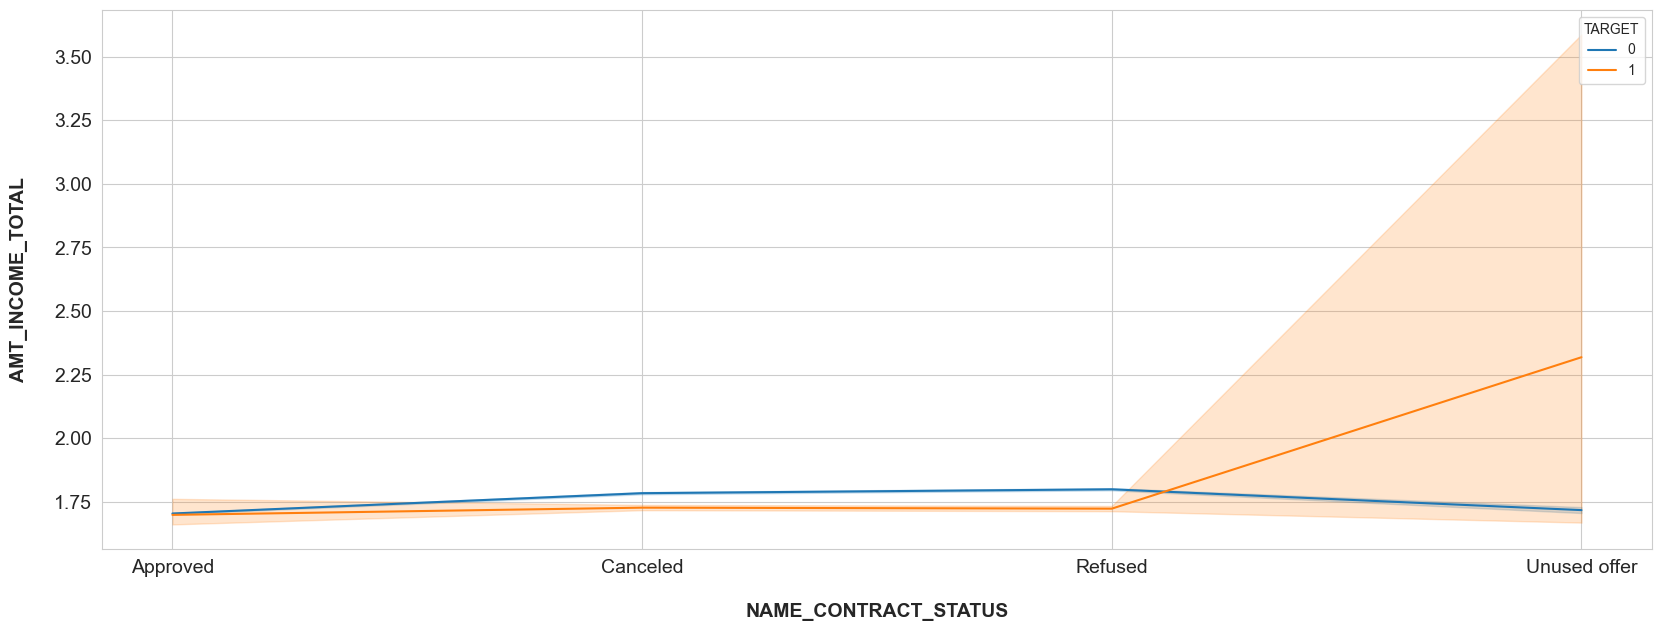

In [446]:
# Plotting line plot between NAME_CONTRACT_STATUS and AMT_INCOME_TOTAL
prepare_lineplot(df=merged_df, x='NAME_CONTRACT_STATUS', y='AMT_INCOME_TOTAL', hue='TARGET')

**<u>Observation #1</u>**

The point plot indicates that the previous offer usage is not related to the default rate, as the non-users have a higher average income but also a higher default rate.

### D. Contract Status and Social Circle (60 days)

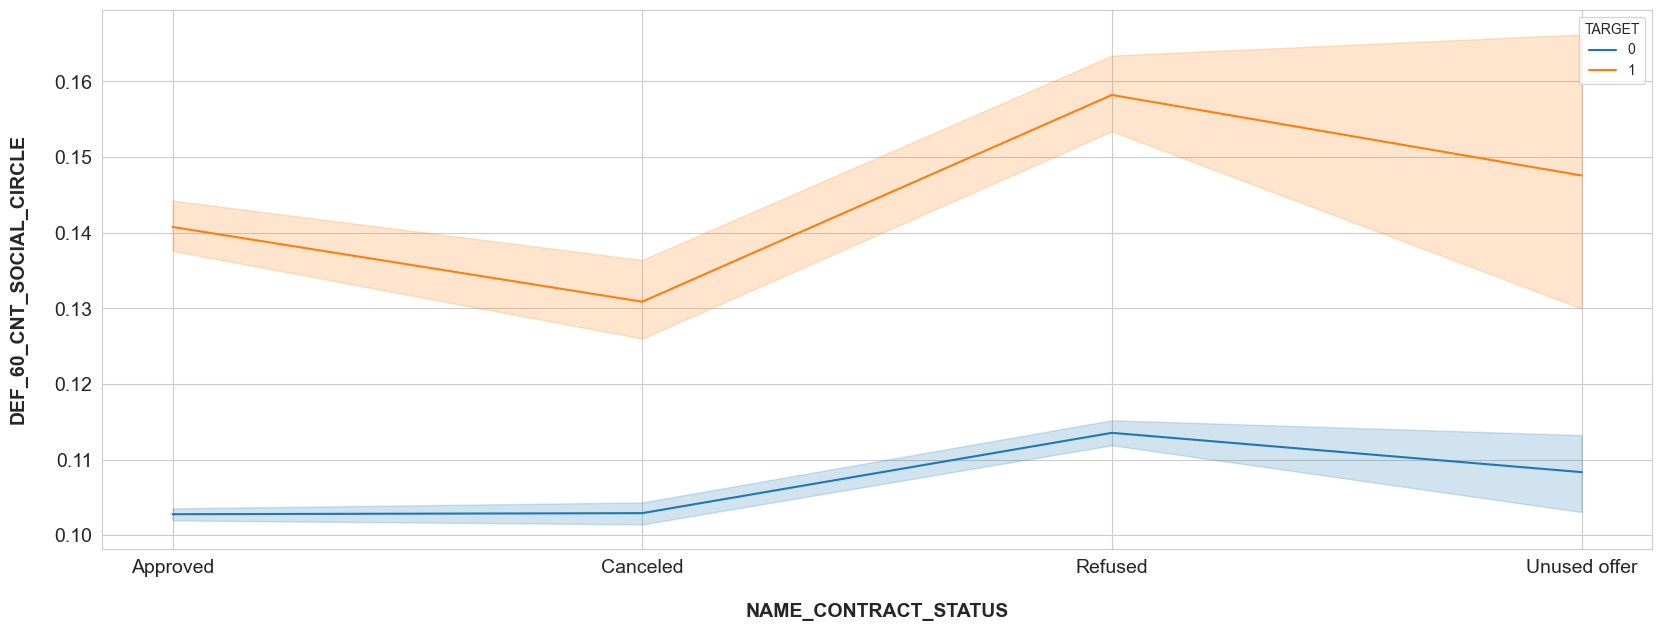

In [447]:
# Plotting line plot between NAME_CONTRACT_STATUS and DEF_60_CNT_SOCIAL_CIRCLE
prepare_lineplot(df=merged_df, x='NAME_CONTRACT_STATUS', y='DEF_60_CNT_SOCIAL_CIRCLE', hue='TARGET')

**<u>Observation #1</u>**

The default rate is higher for clients with a DEF_60_CNT_SOCIAL_CIRCLE score of 0.13 or more, so the loan provider should examine the client’s social circle before approving the loan.

# 5. Conclusions
___
___
___

The analysis of the datasets reveals some client attributes that can help the bank predict the loan repayment. The summary of the analysis is as follows, with the factors and categories that influence the repayment:

## 5.1. Payers
___
___

- **NAME_INCOME_TYPE**: Businessmen are good at repaying their loans.
- **DAYS_EMPLOYED**: Applicants with extensive work experience (40+ years) have an excellent default rate of less than 1%.
- **AMT_INCOME_TOTAL**: Higher income applicants (700,000+) have a strong repayment record.
- **REGION_RATING_CLIENT**: Applicants from regions with Rating 1 are the safest borrowers.
- **ORGANIZATION_TYPE**: Applicants from Trade Type 4 and 5 and Industry Type 8 are quite trustworthy borrowers, with a default rate of less than 3%.
- **NAME_EDUCATION_TYPE**: Academic degree holders have a low default rate.
- **DAYS_BIRTH**: Older applicants (50+) are very reliable in repaying their loans.
- **NAME_CASH_LOAN_PURPOSE**: Loans for personal interests or needs, such as hobbies or buying a garage, are mostly repaid on time.
- **CNT_CHILDREN**: Having up to two children does not affect loan repayment.
- **AGE_GROUP**: Prioritize applicants above age of 50, as they have a low probability of defaulting

## 5.2. Defaulters
___
___

- **CNT_CHILDREN**: Applicants with 9 or more children have a 100% default rate and should not be approved.
- **CNT_FAM_MEMBERS**: Applicants with large families (11 or more members) also have a high default rate and should not be approved.
- **NAME_INCOME_TYPE**: Applicants who are on maternity leave or unemployed have a high default rate and should be avoided.
- **OCCUPATION_TYPE**: Applicants who work in low-skill or service occupations have a huge default rate and should not be granted loans.
- **ORGANIZATION_TYPE**: Organizations with the highest percentage of non-repaid loans are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people also have a high default rate and should be either denied or charged higher interest rates.
- **REGION_RATING_CLIENT**: Applicants who live in regions with Rating 3 are the most risky borrowers and have the highest defaults.
- **AMT_GOODS_PRICE**: Credit amounts above 3M have a higher default risk.
- **CODE_GENDER**: Male applicants tend to default more than female applicants.
- **DAYS_BIRTH**: Young applicants (20-40 years old) have a higher probability of defaulting and should be screened carefully.
- **DAYS_EMPLOYED**: Applicants with less than 5 years of work experience have a high default rate and should be evaluated thoroughly.
- **NAME_EDUCATION_TYPE**: Applicants with low or incomplete education levels have a high default rate and should be given lower priority.
- **NAME_FAMILY_STATUS**: Applicants who are single or in civil marriage have a high default rate and should be assessed cautiously.
- **AGE_GROUP**: Screen young applicants in the age group of 20-40, as they have a high probability of defaulting.Screen young applicants in the age group of 20-40, as they have a high probability of defaulting.

## 5.3. Business Loss prevention
___
___

- **NAME_CASH_LOAN_PURPOSE**: Loans for repairs have the highest default rate and are often rejected or refused. This indicates a high risk for the bank and the clients. Maintain this strict policy for future loans.
- **AMT_CREDIT**: Loans for 300-600k have a higher default rate than other ranges. Charge higher interest rates for this credit range to reduce the risk.
- **AMT_INCOME**: 90% of the applicants have income total less than 300,000 and are more likely to default. Charge higher interest rates for this income category to compensate for the potential losses.
- **CNT_CHILDREN**: Applicants with 4 to 8 children have a very high default rate. Charge higher interest rates for their loans to discourage defaulting.
- **CNT_FAM_MEMBERS**: Applicants with 8 to 10 family members have a very high default rate. Charge higher interest rates for their loans to discourage defaulting.
- **NAME_HOUSING_TYPE**: A large number of loan applications are from people who live in rented apartments or with parents. Offer loans to these applicants to mitigate the loss from other defaulters.

## 5.4. Business Opportunities
___
___

- **Document the reason for rejection**: 88% of the clients who were rejected by the bank for loans earlier have repaid their loans. Contacting these clients for future loans could reduce the business loss.
- **Record the reason for cancellation**: 90% of the clients who cancelled their loans have repaid them. Understanding the reason for cancellation could help the bank negotiate better terms with these clients and increase the business opportunity.